# Importing the Necessary Libraries

In [212]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

import pandas as pd

import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt

from pandas.plotting import parallel_coordinates
from math import sqrt

%matplotlib inline

# Creating a Pandas DataFrame from a CSV file

In [213]:
#file_name = '../original/D31.csv'
#file_name = '../original/g2-2-50.csv'
file_name = '../original/g2-2-30.csv'

#file_name = '../noised/g2-2-30.csv'
#file_name = '../evaluation.csv'

#file_name = '../gaussian100.csv'
#file_name = '../CE3/iris.csv'
#file_name = '../CE3/wine.csv'
#file_name = '../CE3/wdbc.csv'
#file_name = '../CE3/glass.csv'

# To get file in "result" folder use "HDBSCAN.py" 
#file_name = '../result/t4.8k.csv'
#file_name = '../result/t5.8k.csv'
#file_name = '../result/t8.8k.csv'
#file_name = '../result/t7.10k.csv'

#file_name = '../result/g2-2-30.csv'
#file_name = '../result/varying_densities.csv'

# Synthetic Datasets
file_name = '../BS3WC-Datasets/Synthetic/a3.txt'

data = pd.read_csv(file_name)

In [214]:
folder_name = '../images-visual'
#folder_name = 'images-visual'
split_arr = file_name.split('/')
identity_name = split_arr[len(split_arr)-1].replace('.csv','').lower()
new_file_name = identity_name
identity_name = identity_name.replace('.','-')
identity_name = identity_name.replace('_','-')
identity_name = identity_name.replace(' ','-')
print(identity_name)

file_measures = "../Measurements/" + identity_name + "-measures.txt"
open(file_measures,"w+")

a3-txt


<_io.TextIOWrapper name='Measurements/a3-txt_measures.txt' mode='w+' encoding='UTF-8'>

In [215]:
def calculate_db_index(inside_points, labels, file_name, caption):
    from sklearn.metrics import davies_bouldin_score 
    import sklearn
    file = open(file_name, "a+")
    
    print(inside_points)
    print(labels)

    X = []
    Y = []
    for f in inside_points:
        X.append(f)
        Y.append(labels[f])
    
    db_index = davies_bouldin_score(X, Y)
    print("DB Index Score (" + caption + "): %0.4f\n"% db_index)
    file.write("DB Index Score (" + caption + "): %0.4f\n"% db_index)

In [216]:
#calculate_db_index(final_inside, clusters_labels, file_measures)

In [217]:
def calculate_silhouette_score(inside_points, labels, file_name, caption):
    file = open(file_name, "a+")

    X = []
    Y = []
    for f in inside_points:
        X.append(f)
        Y.append(labels[f])
    
    #X = np.array(X)
    #Y = np.array(Y)
    
    silhouette_coef = metrics.silhouette_score(X, Y)
    print("Silhouette Coefficient (" + caption + "): %0.4f"% silhouette_coef)
    file.write("Silhouette Coefficient (" + caption + "): %0.4f\n"% silhouette_coef)


In [218]:
def calculate_accuracy(inside_points, labels, dataset, file_name, caption, no_outliers=False):
    file = open(file_name, "a+")

    X = []
    Y = []
    
    correct = 0
    total = len(dataset)
    for index, o_c in dataset.iterrows():
        key = tuple(o_c[features])
        if key in labels:
            if labels[key] == o_c['L']:
                correct += 1

    if total == 0:
        accuracy = 0
    else:
        accuracy = (correct/total)*100
        
    print("Accuracy Score (" + caption + "): %0.4f"% accuracy)
    file.write("Accuracy Score (" + caption + "): %0.4f\n"% accuracy)

#calculate_accuracy(final_inside, clusters_labels, sampled_df, file_measures)

In [219]:
def calculate_confusion_matrix(inside_points, labels, dataset, file_name, caption, no_outliers=False):
    file = open(file_name, "a+")
    
    unique_labels = np.unique(dataset['L'])
    confusion_matrices = {}
    
    print("length: ", len(inside_points))
    X = []
    Y = []
    
    for lab in unique_labels:
        confusion_matrices[lab] = [0,0,0,0]

    correct = 0
    total = len(dataset)
    for index, o_c in dataset.iterrows():
        key = tuple(o_c[features])
        if key in labels:
            if labels[key] == o_c['L']:
                confusion_matrices[o_c['L']][0] += 1
            
                for lab in unique_labels:
                    if lab != o_c['L']:
                        confusion_matrices[lab][3] += 1
            else:
                if labels[key] == -1:
                    #continue # To check confusion matrix for other than outliers                    
                    for lab in unique_labels:
                        confusion_matrices[lab][2] += 1
                else:
                    confusion_matrices[labels[key]][1] += 1
            
                    for lab in unique_labels:
                        if lab != labels[key]:
                            confusion_matrices[lab][2] += 1

    if total == 0:
        accuracy = 0
    else:
        accuracy = (correct/total)*100

    print("Confusion Matrices (" + caption + "): " + str(confusion_matrices) )
    file.write("Confusion Matrices (" + caption + "): " + str(confusion_matrices) + "\n")

#calculate_confusion_matrix(final_inside, clusters_labels, sampled_df, file_measures)

# Data Description


In [220]:
def write_outliers_detected(final_inside,final_partial,final_outside,file_name, caption):
    file = open(file_name, "a+")
    file.write("Total Objects (" + caption + "): %0.4f\n"% (len(final_inside)+len(final_partial)+len(final_outside)))
    file.write("Outliers Detected By RE3 (" + caption + "): %0.4f\n"% (len(final_outside)+len(final_partial)))

In [221]:
data.head()

Col1   Col2
0  53920  42968
1  52019  42206
2  52570  42476
3  54220  42081
4  54268  43420

In [222]:
data.shape

(7500, 2)

# Data Sampling

In [226]:
sampled_df = data[(data['Col1']/data['Col1']) == 1]
sampled_df.shape

(7500, 2)

In [227]:
sampled_df.head()

Col1   Col2
0  53920  42968
1  52019  42206
2  52570  42476
3  54220  42081
4  54268  43420

In [228]:
import csv

def write_to_file(file_name, values, header_names=False):
    with open(file_name, 'w') as writeFile:
        writer = csv.writer(writeFile)
        if header_names:
            writer.writerow(header_names)
        writer.writerows(values)
        

# Statistics


In [229]:
sampled_df.describe().transpose()


count          mean           std    min       25%      50%      75%  \
Col1  7500.0  32561.752667  17733.445199    0.0  16393.25  32966.0  46946.0   
Col2  7500.0  34150.540267  17699.375394  976.0  17734.50  36044.5  49592.5   

          max  
Col1  65535.0  
Col2  64142.0

# Select Features of Interest for Clustering


In [230]:
print(file_name)

#IRIS Dataset -OR- Four Featured datasets
if 'iris' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4']

#WINE Dataset -OR- Thirteen Featured datasets
elif 'wine' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10', 
                'Col11', 'Col12', 'Col13']

#WDBC Dataset -OR- Thirty Featured datasets
elif 'wdbc' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10',
                'Col11', 'Col12', 'Col13', 'Col14','Col15', 'Col16', 'Col17', 'Col18', 'Col19', 'Col20',
                'Col21', 'Col22', 'Col23', 'Col24','Col25', 'Col26', 'Col27', 'Col28', 'Col29', 'Col30']

#GLASS Dataset -OR- Nine Featured datasets
elif 'glass' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9']

#Other Dataset -OR- Two Featured datasets
else:
    features = ['Col1', 'Col2']

select_df_test_flag = False
if 'Out' in sampled_df:
    select_df = sampled_df[sampled_df['Out'] == 1][features]
    select_df_test = sampled_df[sampled_df['Out'] != 1][features]
    select_df_test_out = sampled_df[sampled_df['Out'] == 3][features]
    select_df_test_flag = True
else:
    select_df = sampled_df[features]

#X = StandardScaler().fit_transform(select_df)
print(features)

BS3WC-Datasets/Synthetic/a3.txt
['Col1', 'Col2']


In [231]:
print(select_df.shape)
if select_df_test_flag:
    print(select_df_test.shape)

(7500, 2)


In [232]:
select_df.head()

Col1   Col2
0  53920  42968
1  52019  42206
2  52570  42476
3  54220  42081
4  54268  43420

In [233]:
num_of_clusters = 0

In [234]:
label_col_name = 'L'
#sampled_df.drop('L', axis=1, inplace=True)
sampled_df

Col1   Col2
0     53920  42968
1     52019  42206
2     52570  42476
3     54220  42081
4     54268  43420
...     ...    ...
7495  39595  18953
7496  38483  16275
7497  41140  18409
7498  37752  19891
7499  40164  17389

[7500 rows x 2 columns]

Centroids:  [ 4099.93377483  4454.70469799  4639.56953642  4725.37162162
  5162.75838926  7088.34666667  7731.80263158  8492.88
  8824.42281879  8980.42666667  9628.26490066  9635.12080537
 10099.84563758 10207.33552632 10289.22       10474.01333333
 11170.17333333 13268.85234899 13702.72297297 13900.66891892
 14150.15540541 15512.88666667 15844.83660131 16705.62666667
 16828.62837838 17023.30405405 17530.36       17976.52631579
 17997.78       19630.58552632 19947.48026316 21236.95364238
 23203.99324324 23385.34459459 23940.06622517 25319.5
 25553.4        26049.41059603 26469.56521739 27143.02666667
 27570.37333333 28055.64666667 29101.125      29483.69127517
 29681.0738255  30135.60264901 30465.11564626 30475.54929577
 34812.31543624 35245.77852349 35475.47333333 35633.13157895
 35988.91156463 36211.37333333 36601.11333333 37537.76666667
 37885.49019608 38305.32450331 39304.82666667 40405.21710526
 42276.2027027  42433.63758389 43207.48275862 43257.42384106
 43399.12162162 43683.644

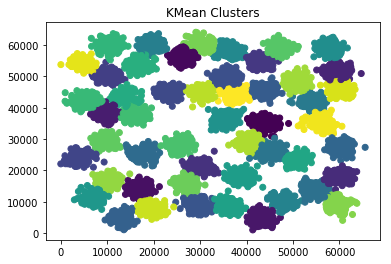

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


In [235]:
if 'L' in sampled_df:
    
    ##################################
    print(np.unique(sampled_df[label_col_name]))
    for i in np.sort(np.unique(sampled_df[label_col_name])):
        if i == 0:
            break
        sampled_df.L[sampled_df.L == i] = i-1


    print(np.unique(sampled_df[label_col_name]))
    ##################################
    
    clusters_labels = np.unique(sampled_df['L'])
    print(clusters_labels)
    num_of_clusters = len(clusters_labels)

else:    
    num_of_clusters = 50
    #X = StandardScaler().fit_transform(select_df)
    kmeans = KMeans(n_clusters=num_of_clusters)
    model = kmeans.fit_predict(select_df)
    centroids = np.unique(kmeans.cluster_centers_)
    clusters_labels = kmeans.labels_
    
    print("Centroids: ", centroids)
    print("model\n", model)
    #plt.scatter(X[:, 0], X[:, 1], c=model)
    plt.scatter(select_df['Col1'], select_df['Col2'], c=model)
    plt.title("KMean Clusters")
    plt.show()

    sampled_df['L'] = kmeans.labels_
    
    ##################################
    print(np.unique(sampled_df[label_col_name]))
    for i in np.sort(np.unique(sampled_df[label_col_name])):
        if i == 0:
            break
        sampled_df.L[sampled_df.L == i] = i-1


    print(np.unique(sampled_df[label_col_name]))
    ##################################
    
    

In [236]:
sampled_df

Col1   Col2   L
0     53920  42968  20
1     52019  42206  20
2     52570  42476  20
3     54220  42081  20
4     54268  43420  20
...     ...    ...  ..
7495  39595  18953  27
7496  38483  16275  27
7497  41140  18409  27
7498  37752  19891  27
7499  40164  17389  27

[7500 rows x 3 columns]

In [237]:
sampled_df.head()

Col1   Col2   L
0  53920  42968  20
1  52019  42206  20
2  52570  42476  20
3  54220  42081  20
4  54268  43420  20

In [286]:
def plot_custom_clusters(final_list, clusters_labels, size, colors, description, image_name, alpha=1, beta=0, not_outlier=False):
    final_list = np.array(final_list)    
    if final_list.size > 0:
        for obj in final_list:
            if not_outlier and clusters_labels[tuple(obj)] -1:
                continue
            
            col = colors[clusters_labels[tuple(obj)]]
            plt.plot(obj[0], obj[1], '.', color=col)
        #plt.title(str(description))
        
        plt.gca().axes.get_yaxis().set_visible(False)
        plt.gca().axes.get_xaxis().set_visible(False)
        plt.savefig(image_name + '.pdf')  
        
        #No need to include plt.show() if you have used savefig(), although, if you want to use then use it at then end.
        #plt.show

In [239]:
sigma_multiples = 3

In [240]:
sampled_df.shape


(7500, 3)

In [241]:
sampled_df.describe().transpose()


count          mean           std    min       25%      50%      75%  \
Col1  7500.0  32561.752667  17733.445199    0.0  16393.25  32966.0  46946.0   
Col2  7500.0  34150.540267  17699.375394  976.0  17734.50  36044.5  49592.5   
L     7500.0     24.456667     14.444051    0.0     12.00     24.0     37.0   

          max  
Col1  65535.0  
Col2  64142.0  
L        49.0

In [242]:
print(len(sampled_df[sampled_df.L == 0]))
print(len(sampled_df[sampled_df.L == 1]))

149
159



# From Here Started Our Method

In [243]:
label_col_name = 'L'
num_neighbors = 7

In [244]:
from sklearn.neighbors import KDTree
import numpy as np

X = np.array(select_df)
kdt = KDTree(X, leaf_size=30, metric='euclidean')
knn = kdt.query(X, k=num_neighbors, return_distance=False)  



In [245]:
knn.shape

(7500, 7)

In [246]:
row_neighbors_list = {}
for i in range(knn.shape[0]):
    row_neighbors_list[i] = knn[i]

In [247]:
for index in row_neighbors_list:
    #print((row_neighbors_list[index]))
    mylist = row_neighbors_list[index]
    #print("______________")

In [248]:
def getClustersInside(dataset, c_k_o_i, alpha = 1.0):
    cluster_inside = {}
    cluster_inside = set(cluster_inside)
    dataset['Col2'][0]
    
    clusters_labels = {}
    
    final_list = []
    my_dict = {}
    for i in range(c_k_o_i.shape[0]):
        #inner_list = []
        for j in range(c_k_o_i.shape[1]):
            if c_k_o_i[i][j] >= alpha:
                #obj = [dataset['Col1'][i], dataset['Col2'][i], j]
                obj = (dataset['Col1'][i], dataset['Col2'][i])
                if obj not in final_list:
                    final_list.append(obj)
                cluster_inside.add(obj)
                clusters_labels[obj] = j
                
                # Try to keep Maximum Valued Record in a dictionay
                key = (dataset['Col1'][i], dataset['Col2'][i])
                if key in my_dict:
                    if my_dict[key] < c_k_o_i[i][j]:
                        my_dict[key] = c_k_o_i[i][j]
                else:
                    my_dict[key] = c_k_o_i[i][j]

    return clusters_labels, final_list, cluster_inside, my_dict


In [249]:
def getClustersIn_Out_Part(dataset, c_k_o_i, alpha = 1.0, beta = 0.0, not_outlier=False):
    cluster_inside = {}
    cluster_outside = {}
    cluster_partial = {}

    cluster_inside = set(cluster_inside)
    cluster_outside = set(cluster_outside)
    cluster_partial = set(cluster_partial)
    
    clusters_labels = {}
    
    final_inside = []
    final_outside = []
    final_partial = []
    
    dict_inside = {}
    dict_outside = {}
    dict_partial = {}
    
    outliers_indices = []
    
    for i in range(c_k_o_i.shape[0]):
        #inner_list = []
        for j in range(c_k_o_i.shape[1]):
            
            obj = [] 
            for col in features:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                obj.append(dataset[col][i])
            obj = tuple(obj)
            
            if c_k_o_i[i][j] >= alpha:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                #print(c_k_o_i[i][j])
                if obj not in final_inside:
                    final_inside.append(obj)
                
                # Remove from partial as well as outside
                if obj in final_partial:
                    #print("Removed... " + str(obj))
                    final_partial.remove(obj)
                    
                #For outliers
                if i in outliers_indices:
                    outliers_indices.remove(i)
                
                if obj in final_outside:
                    final_outside.remove(obj)
                
                #Cluster Inside 
                #cluster_inside.add(obj)
                clusters_labels[obj] = j

                # Try to keep Maximum Valued Record in a dictionay
                #key = (dataset['Col1'][i], dataset['Col2'][i])
                key = obj
                if key in dict_inside:
                    if dict_inside[key] < c_k_o_i[i][j]:
                        dict_inside[key] = c_k_o_i[i][j]
                else:
                    dict_inside[key] = c_k_o_i[i][j]

            elif c_k_o_i[i][j] <= beta:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                if obj not in final_outside and obj not in final_inside and obj not in final_partial:
                    final_outside.append(obj)
                    
                    #For outliers
                    if i not in outliers_indices:
                        outliers_indices.append(i)

                    if not_outlier:
                        clusters_labels[obj] = j
                    else:
                        clusters_labels[obj] = -1
                
                #Cluster outside 
                #cluster_outside.add(obj)
                
                # Try to keep Maximum Valued Record in a dictionay
                key = obj
                if key in dict_outside:
                    if dict_outside[key] < c_k_o_i[i][j]:
                        dict_outside[key] = c_k_o_i[i][j]
                else:
                    dict_outside[key] = c_k_o_i[i][j]

            elif c_k_o_i[i][j] < alpha and c_k_o_i[i][j] > beta:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                if obj not in final_partial and obj not in final_inside:
                    final_partial.append(obj)
                    #For outliers
                    if i not in outliers_indices:
                        outliers_indices.append(i)

                    if not_outlier:
                        clusters_labels[obj] = j
                    else:
                        clusters_labels[obj] = -1

                # Remove from outside
                if obj in final_outside:
                    final_outside.remove(obj)
                
                #Cluster Partial
                #cluster_partial.add(tuple(obj)) 
 
                # Try to keep Maximum Valued Record in a dictionay
                #key = (dataset['Col1'][i], dataset['Col2'][i])
                key = obj
                if key in dict_partial:
                    if dict_partial[key] < c_k_o_i[i][j]:
                        dict_partial[key] = c_k_o_i[i][j]
                else:
                    dict_partial[key] = c_k_o_i[i][j]

            
    #return cluster_inside, cluster_outside, cluster_partial, final_inside, final_outside, final_partial, dict_inside, dict_outside, dict_partial
    return clusters_labels, final_inside, final_outside, final_partial, outliers_indices


In [250]:
def getClusters_Centroids_MeanDistance(dataset, features_set, label_col_name, knn):
    import math
    
    clusters_labels = np.unique(dataset[label_col_name])        
    clusters_centroids = {}
        
    for i in range(len(clusters_labels)):
        # Get all records of specific cluster
        cluster_dataset = dataset[features_set].loc[dataset[label_col_name] == clusters_labels[i]]
        
        sum_of_cluster = np.sum(cluster_dataset, axis=0)
        centroid = sum_of_cluster/len(cluster_dataset)
        average_distance = 0
        total_distance = 0
        centroid_distances_all = np.zeros(len(cluster_dataset))
        #print("centroid: ", centroid)
        total_average_distances_list = np.zeros(len(cluster_dataset))
        neighbor_distance_list = np.zeros(knn.shape[1])
        j = 0
        for index, o_c in cluster_dataset.iterrows():
            #print("o_c: ", o_c)
            
            centroid_distance = 0
            for col in features_set:
                if col != label_col_name:
                    centroid_distance += (o_c[col] - centroid[col])**2
                    #print(col, ":", (o_c[col] - centroid[col])**2)

            #print("index: ", index)
            for k in range(knn.shape[1]):
                neighbor_distance = 0
                for col in features_set:
                    #print(dataset.iloc[knn[index][k]][col])
                    if col != label_col_name:
                        #print(col, index, k)
                        neighbor_distance += (dataset.iloc[index][col] - dataset.iloc[knn[index][k]][col])**2
            
                neighbor_distance_list[k] =  math.sqrt(neighbor_distance)
                #print(dataset.iloc[knn[index][j]])
            
            centroid_distance = math.sqrt(centroid_distance)
            centroid_distances_all[j] = centroid_distance
            #print(centroid_distance)
            total_distance += centroid_distance
            total_average_distances_list[j] = np.mean(neighbor_distance_list)
            j += 1
        
        #print(total_average_distances_list)
        #print(total_distance)
        average_distance = total_distance/len(cluster_dataset)
        centroid_distance_std = np.std(centroid_distances_all)
        
        total_average_distance = np.sum(total_average_distances_list)
        average_distance_std = np.std(total_average_distances_list)
        average_distance_average = total_average_distance/len(cluster_dataset)
        clusters_centroids[clusters_labels[i]] = (centroid,average_distance,average_distance_average, average_distance_std,centroid_distance_std)
    return clusters_centroids

In [251]:
sampled_df.shape
#print(sampled_df)
#features
#knn.shape

(7500, 3)

In [252]:
if select_df_test_flag:
    clusters_centroids = getClusters_Centroids_MeanDistance(sampled_df[sampled_df['Out'] == 1], features, label_col_name, knn)
else:
    clusters_centroids = getClusters_Centroids_MeanDistance(sampled_df, features, label_col_name, knn)

Col1 3900 0
Col2 3900 0
Col1 3900 1
Col2 3900 1
Col1 3900 2
Col2 3900 2
Col1 3900 3
Col2 3900 3
Col1 3900 4
Col2 3900 4
Col1 3900 5
Col2 3900 5
Col1 3900 6
Col2 3900 6
Col1 3901 0
Col2 3901 0
Col1 3901 1
Col2 3901 1
Col1 3901 2
Col2 3901 2
Col1 3901 3
Col2 3901 3
Col1 3901 4
Col2 3901 4
Col1 3901 5
Col2 3901 5
Col1 3901 6
Col2 3901 6
Col1 3902 0
Col2 3902 0
Col1 3902 1
Col2 3902 1
Col1 3902 2
Col2 3902 2
Col1 3902 3
Col2 3902 3
Col1 3902 4
Col2 3902 4
Col1 3902 5
Col2 3902 5
Col1 3902 6
Col2 3902 6
Col1 3903 0
Col2 3903 0
Col1 3903 1
Col2 3903 1
Col1 3903 2
Col2 3903 2
Col1 3903 3
Col2 3903 3
Col1 3903 4
Col2 3903 4
Col1 3903 5
Col2 3903 5
Col1 3903 6
Col2 3903 6
Col1 3904 0
Col2 3904 0
Col1 3904 1
Col2 3904 1
Col1 3904 2
Col2 3904 2
Col1 3904 3
Col2 3904 3
Col1 3904 4
Col2 3904 4
Col1 3904 5
Col2 3904 5
Col1 3904 6
Col2 3904 6
Col1 3905 0
Col2 3905 0
Col1 3905 1
Col2 3905 1
Col1 3905 2
Col2 3905 2
Col1 3905 3
Col2 3905 3
Col1 3905 4
Col2 3905 4
Col1 3905 5
Col2 3905 5
Col1 3905 6
Col2

Col2 3949 6
Col1 3950 0
Col2 3950 0
Col1 3950 1
Col2 3950 1
Col1 3950 2
Col2 3950 2
Col1 3950 3
Col2 3950 3
Col1 3950 4
Col2 3950 4
Col1 3950 5
Col2 3950 5
Col1 3950 6
Col2 3950 6
Col1 3951 0
Col2 3951 0
Col1 3951 1
Col2 3951 1
Col1 3951 2
Col2 3951 2
Col1 3951 3
Col2 3951 3
Col1 3951 4
Col2 3951 4
Col1 3951 5
Col2 3951 5
Col1 3951 6
Col2 3951 6
Col1 3952 0
Col2 3952 0
Col1 3952 1
Col2 3952 1
Col1 3952 2
Col2 3952 2
Col1 3952 3
Col2 3952 3
Col1 3952 4
Col2 3952 4
Col1 3952 5
Col2 3952 5
Col1 3952 6
Col2 3952 6
Col1 3953 0
Col2 3953 0
Col1 3953 1
Col2 3953 1
Col1 3953 2
Col2 3953 2
Col1 3953 3
Col2 3953 3
Col1 3953 4
Col2 3953 4
Col1 3953 5
Col2 3953 5
Col1 3953 6
Col2 3953 6
Col1 3954 0
Col2 3954 0
Col1 3954 1
Col2 3954 1
Col1 3954 2
Col2 3954 2
Col1 3954 3
Col2 3954 3
Col1 3954 4
Col2 3954 4
Col1 3954 5
Col2 3954 5
Col1 3954 6
Col2 3954 6
Col1 3955 0
Col2 3955 0
Col1 3955 1
Col2 3955 1
Col1 3955 2
Col2 3955 2
Col1 3955 3
Col2 3955 3
Col1 3955 4
Col2 3955 4
Col1 3955 5
Col2 3955 5
Col1

Col1 4021 2
Col2 4021 2
Col1 4021 3
Col2 4021 3
Col1 4021 4
Col2 4021 4
Col1 4021 5
Col2 4021 5
Col1 4021 6
Col2 4021 6
Col1 4022 0
Col2 4022 0
Col1 4022 1
Col2 4022 1
Col1 4022 2
Col2 4022 2
Col1 4022 3
Col2 4022 3
Col1 4022 4
Col2 4022 4
Col1 4022 5
Col2 4022 5
Col1 4022 6
Col2 4022 6
Col1 4023 0
Col2 4023 0
Col1 4023 1
Col2 4023 1
Col1 4023 2
Col2 4023 2
Col1 4023 3
Col2 4023 3
Col1 4023 4
Col2 4023 4
Col1 4023 5
Col2 4023 5
Col1 4023 6
Col2 4023 6
Col1 4024 0
Col2 4024 0
Col1 4024 1
Col2 4024 1
Col1 4024 2
Col2 4024 2
Col1 4024 3
Col2 4024 3
Col1 4024 4
Col2 4024 4
Col1 4024 5
Col2 4024 5
Col1 4024 6
Col2 4024 6
Col1 4025 0
Col2 4025 0
Col1 4025 1
Col2 4025 1
Col1 4025 2
Col2 4025 2
Col1 4025 3
Col2 4025 3
Col1 4025 4
Col2 4025 4
Col1 4025 5
Col2 4025 5
Col1 4025 6
Col2 4025 6
Col1 4026 0
Col2 4026 0
Col1 4026 1
Col2 4026 1
Col1 4026 2
Col2 4026 2
Col1 4026 3
Col2 4026 3
Col1 4026 4
Col2 4026 4
Col1 4026 5
Col2 4026 5
Col1 4026 6
Col2 4026 6
Col1 4027 0
Col2 4027 0
Col1 4027 1
Col2

Col2 2126 1
Col1 2126 2
Col2 2126 2
Col1 2126 3
Col2 2126 3
Col1 2126 4
Col2 2126 4
Col1 2126 5
Col2 2126 5
Col1 2126 6
Col2 2126 6
Col1 2127 0
Col2 2127 0
Col1 2127 1
Col2 2127 1
Col1 2127 2
Col2 2127 2
Col1 2127 3
Col2 2127 3
Col1 2127 4
Col2 2127 4
Col1 2127 5
Col2 2127 5
Col1 2127 6
Col2 2127 6
Col1 2128 0
Col2 2128 0
Col1 2128 1
Col2 2128 1
Col1 2128 2
Col2 2128 2
Col1 2128 3
Col2 2128 3
Col1 2128 4
Col2 2128 4
Col1 2128 5
Col2 2128 5
Col1 2128 6
Col2 2128 6
Col1 2129 0
Col2 2129 0
Col1 2129 1
Col2 2129 1
Col1 2129 2
Col2 2129 2
Col1 2129 3
Col2 2129 3
Col1 2129 4
Col2 2129 4
Col1 2129 5
Col2 2129 5
Col1 2129 6
Col2 2129 6
Col1 2130 0
Col2 2130 0
Col1 2130 1
Col2 2130 1
Col1 2130 2
Col2 2130 2
Col1 2130 3
Col2 2130 3
Col1 2130 4
Col2 2130 4
Col1 2130 5
Col2 2130 5
Col1 2130 6
Col2 2130 6
Col1 2131 0
Col2 2131 0
Col1 2131 1
Col2 2131 1
Col1 2131 2
Col2 2131 2
Col1 2131 3
Col2 2131 3
Col1 2131 4
Col2 2131 4
Col1 2131 5
Col2 2131 5
Col1 2131 6
Col2 2131 6
Col1 2132 0
Col2 2132 0
Col1

Col1 2193 1
Col2 2193 1
Col1 2193 2
Col2 2193 2
Col1 2193 3
Col2 2193 3
Col1 2193 4
Col2 2193 4
Col1 2193 5
Col2 2193 5
Col1 2193 6
Col2 2193 6
Col1 2194 0
Col2 2194 0
Col1 2194 1
Col2 2194 1
Col1 2194 2
Col2 2194 2
Col1 2194 3
Col2 2194 3
Col1 2194 4
Col2 2194 4
Col1 2194 5
Col2 2194 5
Col1 2194 6
Col2 2194 6
Col1 2195 0
Col2 2195 0
Col1 2195 1
Col2 2195 1
Col1 2195 2
Col2 2195 2
Col1 2195 3
Col2 2195 3
Col1 2195 4
Col2 2195 4
Col1 2195 5
Col2 2195 5
Col1 2195 6
Col2 2195 6
Col1 2196 0
Col2 2196 0
Col1 2196 1
Col2 2196 1
Col1 2196 2
Col2 2196 2
Col1 2196 3
Col2 2196 3
Col1 2196 4
Col2 2196 4
Col1 2196 5
Col2 2196 5
Col1 2196 6
Col2 2196 6
Col1 2197 0
Col2 2197 0
Col1 2197 1
Col2 2197 1
Col1 2197 2
Col2 2197 2
Col1 2197 3
Col2 2197 3
Col1 2197 4
Col2 2197 4
Col1 2197 5
Col2 2197 5
Col1 2197 6
Col2 2197 6
Col1 2198 0
Col2 2198 0
Col1 2198 1
Col2 2198 1
Col1 2198 2
Col2 2198 2
Col1 2198 3
Col2 2198 3
Col1 2198 4
Col2 2198 4
Col1 2198 5
Col2 2198 5
Col1 2198 6
Col2 2198 6
Col1 2199 0
Col2

Col1 6915 4
Col2 6915 4
Col1 6915 5
Col2 6915 5
Col1 6915 6
Col2 6915 6
Col1 6916 0
Col2 6916 0
Col1 6916 1
Col2 6916 1
Col1 6916 2
Col2 6916 2
Col1 6916 3
Col2 6916 3
Col1 6916 4
Col2 6916 4
Col1 6916 5
Col2 6916 5
Col1 6916 6
Col2 6916 6
Col1 6917 0
Col2 6917 0
Col1 6917 1
Col2 6917 1
Col1 6917 2
Col2 6917 2
Col1 6917 3
Col2 6917 3
Col1 6917 4
Col2 6917 4
Col1 6917 5
Col2 6917 5
Col1 6917 6
Col2 6917 6
Col1 6918 0
Col2 6918 0
Col1 6918 1
Col2 6918 1
Col1 6918 2
Col2 6918 2
Col1 6918 3
Col2 6918 3
Col1 6918 4
Col2 6918 4
Col1 6918 5
Col2 6918 5
Col1 6918 6
Col2 6918 6
Col1 6919 0
Col2 6919 0
Col1 6919 1
Col2 6919 1
Col1 6919 2
Col2 6919 2
Col1 6919 3
Col2 6919 3
Col1 6919 4
Col2 6919 4
Col1 6919 5
Col2 6919 5
Col1 6919 6
Col2 6919 6
Col1 6920 0
Col2 6920 0
Col1 6920 1
Col2 6920 1
Col1 6920 2
Col2 6920 2
Col1 6920 3
Col2 6920 3
Col1 6920 4
Col2 6920 4
Col1 6920 5
Col2 6920 5
Col1 6920 6
Col2 6920 6
Col1 6921 0
Col2 6921 0
Col1 6921 1
Col2 6921 1
Col1 6921 2
Col2 6921 2
Col1 6921 3
Col2

Col2 6986 6
Col1 6987 0
Col2 6987 0
Col1 6987 1
Col2 6987 1
Col1 6987 2
Col2 6987 2
Col1 6987 3
Col2 6987 3
Col1 6987 4
Col2 6987 4
Col1 6987 5
Col2 6987 5
Col1 6987 6
Col2 6987 6
Col1 6988 0
Col2 6988 0
Col1 6988 1
Col2 6988 1
Col1 6988 2
Col2 6988 2
Col1 6988 3
Col2 6988 3
Col1 6988 4
Col2 6988 4
Col1 6988 5
Col2 6988 5
Col1 6988 6
Col2 6988 6
Col1 6989 0
Col2 6989 0
Col1 6989 1
Col2 6989 1
Col1 6989 2
Col2 6989 2
Col1 6989 3
Col2 6989 3
Col1 6989 4
Col2 6989 4
Col1 6989 5
Col2 6989 5
Col1 6989 6
Col2 6989 6
Col1 6990 0
Col2 6990 0
Col1 6990 1
Col2 6990 1
Col1 6990 2
Col2 6990 2
Col1 6990 3
Col2 6990 3
Col1 6990 4
Col2 6990 4
Col1 6990 5
Col2 6990 5
Col1 6990 6
Col2 6990 6
Col1 6991 0
Col2 6991 0
Col1 6991 1
Col2 6991 1
Col1 6991 2
Col2 6991 2
Col1 6991 3
Col2 6991 3
Col1 6991 4
Col2 6991 4
Col1 6991 5
Col2 6991 5
Col1 6991 6
Col2 6991 6
Col1 6992 0
Col2 6992 0
Col1 6992 1
Col2 6992 1
Col1 6992 2
Col2 6992 2
Col1 6992 3
Col2 6992 3
Col1 6992 4
Col2 6992 4
Col1 6992 5
Col2 6992 5
Col1

Col2 7049 1
Col1 7049 2
Col2 7049 2
Col1 7049 3
Col2 7049 3
Col1 7049 4
Col2 7049 4
Col1 7049 5
Col2 7049 5
Col1 7049 6
Col2 7049 6
Col1 5850 0
Col2 5850 0
Col1 5850 1
Col2 5850 1
Col1 5850 2
Col2 5850 2
Col1 5850 3
Col2 5850 3
Col1 5850 4
Col2 5850 4
Col1 5850 5
Col2 5850 5
Col1 5850 6
Col2 5850 6
Col1 5851 0
Col2 5851 0
Col1 5851 1
Col2 5851 1
Col1 5851 2
Col2 5851 2
Col1 5851 3
Col2 5851 3
Col1 5851 4
Col2 5851 4
Col1 5851 5
Col2 5851 5
Col1 5851 6
Col2 5851 6
Col1 5852 0
Col2 5852 0
Col1 5852 1
Col2 5852 1
Col1 5852 2
Col2 5852 2
Col1 5852 3
Col2 5852 3
Col1 5852 4
Col2 5852 4
Col1 5852 5
Col2 5852 5
Col1 5852 6
Col2 5852 6
Col1 5853 0
Col2 5853 0
Col1 5853 1
Col2 5853 1
Col1 5853 2
Col2 5853 2
Col1 5853 3
Col2 5853 3
Col1 5853 4
Col2 5853 4
Col1 5853 5
Col2 5853 5
Col1 5853 6
Col2 5853 6
Col1 5854 0
Col2 5854 0
Col1 5854 1
Col2 5854 1
Col1 5854 2
Col2 5854 2
Col1 5854 3
Col2 5854 3
Col1 5854 4
Col2 5854 4
Col1 5854 5
Col2 5854 5
Col1 5854 6
Col2 5854 6
Col1 5855 0
Col2 5855 0
Col1

Col2 5906 6
Col1 5907 0
Col2 5907 0
Col1 5907 1
Col2 5907 1
Col1 5907 2
Col2 5907 2
Col1 5907 3
Col2 5907 3
Col1 5907 4
Col2 5907 4
Col1 5907 5
Col2 5907 5
Col1 5907 6
Col2 5907 6
Col1 5908 0
Col2 5908 0
Col1 5908 1
Col2 5908 1
Col1 5908 2
Col2 5908 2
Col1 5908 3
Col2 5908 3
Col1 5908 4
Col2 5908 4
Col1 5908 5
Col2 5908 5
Col1 5908 6
Col2 5908 6
Col1 5909 0
Col2 5909 0
Col1 5909 1
Col2 5909 1
Col1 5909 2
Col2 5909 2
Col1 5909 3
Col2 5909 3
Col1 5909 4
Col2 5909 4
Col1 5909 5
Col2 5909 5
Col1 5909 6
Col2 5909 6
Col1 5910 0
Col2 5910 0
Col1 5910 1
Col2 5910 1
Col1 5910 2
Col2 5910 2
Col1 5910 3
Col2 5910 3
Col1 5910 4
Col2 5910 4
Col1 5910 5
Col2 5910 5
Col1 5910 6
Col2 5910 6
Col1 5911 0
Col2 5911 0
Col1 5911 1
Col2 5911 1
Col1 5911 2
Col2 5911 2
Col1 5911 3
Col2 5911 3
Col1 5911 4
Col2 5911 4
Col1 5911 5
Col2 5911 5
Col1 5911 6
Col2 5911 6
Col1 5912 0
Col2 5912 0
Col1 5912 1
Col2 5912 1
Col1 5912 2
Col2 5912 2
Col1 5912 3
Col2 5912 3
Col1 5912 4
Col2 5912 4
Col1 5912 5
Col2 5912 5
Col1

Col2 5964 3
Col1 5964 4
Col2 5964 4
Col1 5964 5
Col2 5964 5
Col1 5964 6
Col2 5964 6
Col1 5965 0
Col2 5965 0
Col1 5965 1
Col2 5965 1
Col1 5965 2
Col2 5965 2
Col1 5965 3
Col2 5965 3
Col1 5965 4
Col2 5965 4
Col1 5965 5
Col2 5965 5
Col1 5965 6
Col2 5965 6
Col1 5966 0
Col2 5966 0
Col1 5966 1
Col2 5966 1
Col1 5966 2
Col2 5966 2
Col1 5966 3
Col2 5966 3
Col1 5966 4
Col2 5966 4
Col1 5966 5
Col2 5966 5
Col1 5966 6
Col2 5966 6
Col1 5967 0
Col2 5967 0
Col1 5967 1
Col2 5967 1
Col1 5967 2
Col2 5967 2
Col1 5967 3
Col2 5967 3
Col1 5967 4
Col2 5967 4
Col1 5967 5
Col2 5967 5
Col1 5967 6
Col2 5967 6
Col1 5968 0
Col2 5968 0
Col1 5968 1
Col2 5968 1
Col1 5968 2
Col2 5968 2
Col1 5968 3
Col2 5968 3
Col1 5968 4
Col2 5968 4
Col1 5968 5
Col2 5968 5
Col1 5968 6
Col2 5968 6
Col1 5969 0
Col2 5969 0
Col1 5969 1
Col2 5969 1
Col1 5969 2
Col2 5969 2
Col1 5969 3
Col2 5969 3
Col1 5969 4
Col2 5969 4
Col1 5969 5
Col2 5969 5
Col1 5969 6
Col2 5969 6
Col1 5970 0
Col2 5970 0
Col1 5970 1
Col2 5970 1
Col1 5970 2
Col2 5970 2
Col1

Col1 3619 5
Col2 3619 5
Col1 3619 6
Col2 3619 6
Col1 3620 0
Col2 3620 0
Col1 3620 1
Col2 3620 1
Col1 3620 2
Col2 3620 2
Col1 3620 3
Col2 3620 3
Col1 3620 4
Col2 3620 4
Col1 3620 5
Col2 3620 5
Col1 3620 6
Col2 3620 6
Col1 3621 0
Col2 3621 0
Col1 3621 1
Col2 3621 1
Col1 3621 2
Col2 3621 2
Col1 3621 3
Col2 3621 3
Col1 3621 4
Col2 3621 4
Col1 3621 5
Col2 3621 5
Col1 3621 6
Col2 3621 6
Col1 3622 0
Col2 3622 0
Col1 3622 1
Col2 3622 1
Col1 3622 2
Col2 3622 2
Col1 3622 3
Col2 3622 3
Col1 3622 4
Col2 3622 4
Col1 3622 5
Col2 3622 5
Col1 3622 6
Col2 3622 6
Col1 3623 0
Col2 3623 0
Col1 3623 1
Col2 3623 1
Col1 3623 2
Col2 3623 2
Col1 3623 3
Col2 3623 3
Col1 3623 4
Col2 3623 4
Col1 3623 5
Col2 3623 5
Col1 3623 6
Col2 3623 6
Col1 3624 0
Col2 3624 0
Col1 3624 1
Col2 3624 1
Col1 3624 2
Col2 3624 2
Col1 3624 3
Col2 3624 3
Col1 3624 4
Col2 3624 4
Col1 3624 5
Col2 3624 5
Col1 3624 6
Col2 3624 6
Col1 3625 0
Col2 3625 0
Col1 3625 1
Col2 3625 1
Col1 3625 2
Col2 3625 2
Col1 3625 3
Col2 3625 3
Col1 3625 4
Col2

Col1 3685 1
Col2 3685 1
Col1 3685 2
Col2 3685 2
Col1 3685 3
Col2 3685 3
Col1 3685 4
Col2 3685 4
Col1 3685 5
Col2 3685 5
Col1 3685 6
Col2 3685 6
Col1 3686 0
Col2 3686 0
Col1 3686 1
Col2 3686 1
Col1 3686 2
Col2 3686 2
Col1 3686 3
Col2 3686 3
Col1 3686 4
Col2 3686 4
Col1 3686 5
Col2 3686 5
Col1 3686 6
Col2 3686 6
Col1 3687 0
Col2 3687 0
Col1 3687 1
Col2 3687 1
Col1 3687 2
Col2 3687 2
Col1 3687 3
Col2 3687 3
Col1 3687 4
Col2 3687 4
Col1 3687 5
Col2 3687 5
Col1 3687 6
Col2 3687 6
Col1 3688 0
Col2 3688 0
Col1 3688 1
Col2 3688 1
Col1 3688 2
Col2 3688 2
Col1 3688 3
Col2 3688 3
Col1 3688 4
Col2 3688 4
Col1 3688 5
Col2 3688 5
Col1 3688 6
Col2 3688 6
Col1 3689 0
Col2 3689 0
Col1 3689 1
Col2 3689 1
Col1 3689 2
Col2 3689 2
Col1 3689 3
Col2 3689 3
Col1 3689 4
Col2 3689 4
Col1 3689 5
Col2 3689 5
Col1 3689 6
Col2 3689 6
Col1 3690 0
Col2 3690 0
Col1 3690 1
Col2 3690 1
Col1 3690 2
Col2 3690 2
Col1 3690 3
Col2 3690 3
Col1 3690 4
Col2 3690 4
Col1 3690 5
Col2 3690 5
Col1 3690 6
Col2 3690 6
Col1 3691 0
Col2

Col2 450 5
Col1 450 6
Col2 450 6
Col1 451 0
Col2 451 0
Col1 451 1
Col2 451 1
Col1 451 2
Col2 451 2
Col1 451 3
Col2 451 3
Col1 451 4
Col2 451 4
Col1 451 5
Col2 451 5
Col1 451 6
Col2 451 6
Col1 452 0
Col2 452 0
Col1 452 1
Col2 452 1
Col1 452 2
Col2 452 2
Col1 452 3
Col2 452 3
Col1 452 4
Col2 452 4
Col1 452 5
Col2 452 5
Col1 452 6
Col2 452 6
Col1 453 0
Col2 453 0
Col1 453 1
Col2 453 1
Col1 453 2
Col2 453 2
Col1 453 3
Col2 453 3
Col1 453 4
Col2 453 4
Col1 453 5
Col2 453 5
Col1 453 6
Col2 453 6
Col1 454 0
Col2 454 0
Col1 454 1
Col2 454 1
Col1 454 2
Col2 454 2
Col1 454 3
Col2 454 3
Col1 454 4
Col2 454 4
Col1 454 5
Col2 454 5
Col1 454 6
Col2 454 6
Col1 455 0
Col2 455 0
Col1 455 1
Col2 455 1
Col1 455 2
Col2 455 2
Col1 455 3
Col2 455 3
Col1 455 4
Col2 455 4
Col1 455 5
Col2 455 5
Col1 455 6
Col2 455 6
Col1 456 0
Col2 456 0
Col1 456 1
Col2 456 1
Col1 456 2
Col2 456 2
Col1 456 3
Col2 456 3
Col1 456 4
Col2 456 4
Col1 456 5
Col2 456 5
Col1 456 6
Col2 456 6
Col1 458 0
Col2 458 0
Col1 458 1
Col2 458 1

Col2 519 1
Col1 519 2
Col2 519 2
Col1 519 3
Col2 519 3
Col1 519 4
Col2 519 4
Col1 519 5
Col2 519 5
Col1 519 6
Col2 519 6
Col1 520 0
Col2 520 0
Col1 520 1
Col2 520 1
Col1 520 2
Col2 520 2
Col1 520 3
Col2 520 3
Col1 520 4
Col2 520 4
Col1 520 5
Col2 520 5
Col1 520 6
Col2 520 6
Col1 521 0
Col2 521 0
Col1 521 1
Col2 521 1
Col1 521 2
Col2 521 2
Col1 521 3
Col2 521 3
Col1 521 4
Col2 521 4
Col1 521 5
Col2 521 5
Col1 521 6
Col2 521 6
Col1 522 0
Col2 522 0
Col1 522 1
Col2 522 1
Col1 522 2
Col2 522 2
Col1 522 3
Col2 522 3
Col1 522 4
Col2 522 4
Col1 522 5
Col2 522 5
Col1 522 6
Col2 522 6
Col1 523 0
Col2 523 0
Col1 523 1
Col2 523 1
Col1 523 2
Col2 523 2
Col1 523 3
Col2 523 3
Col1 523 4
Col2 523 4
Col1 523 5
Col2 523 5
Col1 523 6
Col2 523 6
Col1 524 0
Col2 524 0
Col1 524 1
Col2 524 1
Col1 524 2
Col2 524 2
Col1 524 3
Col2 524 3
Col1 524 4
Col2 524 4
Col1 524 5
Col2 524 5
Col1 524 6
Col2 524 6
Col1 525 0
Col2 525 0
Col1 525 1
Col2 525 1
Col1 525 2
Col2 525 2
Col1 525 3
Col2 525 3
Col1 525 4
Col2 525 4

Col2 584 4
Col1 584 5
Col2 584 5
Col1 584 6
Col2 584 6
Col1 585 0
Col2 585 0
Col1 585 1
Col2 585 1
Col1 585 2
Col2 585 2
Col1 585 3
Col2 585 3
Col1 585 4
Col2 585 4
Col1 585 5
Col2 585 5
Col1 585 6
Col2 585 6
Col1 586 0
Col2 586 0
Col1 586 1
Col2 586 1
Col1 586 2
Col2 586 2
Col1 586 3
Col2 586 3
Col1 586 4
Col2 586 4
Col1 586 5
Col2 586 5
Col1 586 6
Col2 586 6
Col1 587 0
Col2 587 0
Col1 587 1
Col2 587 1
Col1 587 2
Col2 587 2
Col1 587 3
Col2 587 3
Col1 587 4
Col2 587 4
Col1 587 5
Col2 587 5
Col1 587 6
Col2 587 6
Col1 588 0
Col2 588 0
Col1 588 1
Col2 588 1
Col1 588 2
Col2 588 2
Col1 588 3
Col2 588 3
Col1 588 4
Col2 588 4
Col1 588 5
Col2 588 5
Col1 588 6
Col2 588 6
Col1 589 0
Col2 589 0
Col1 589 1
Col2 589 1
Col1 589 2
Col2 589 2
Col1 589 3
Col2 589 3
Col1 589 4
Col2 589 4
Col1 589 5
Col2 589 5
Col1 589 6
Col2 589 6
Col1 590 0
Col2 590 0
Col1 590 1
Col2 590 1
Col1 590 2
Col2 590 2
Col1 590 3
Col2 590 3
Col1 590 4
Col2 590 4
Col1 590 5
Col2 590 5
Col1 590 6
Col2 590 6
Col1 591 0
Col2 591 0

Col1 6343 0
Col2 6343 0
Col1 6343 1
Col2 6343 1
Col1 6343 2
Col2 6343 2
Col1 6343 3
Col2 6343 3
Col1 6343 4
Col2 6343 4
Col1 6343 5
Col2 6343 5
Col1 6343 6
Col2 6343 6
Col1 6344 0
Col2 6344 0
Col1 6344 1
Col2 6344 1
Col1 6344 2
Col2 6344 2
Col1 6344 3
Col2 6344 3
Col1 6344 4
Col2 6344 4
Col1 6344 5
Col2 6344 5
Col1 6344 6
Col2 6344 6
Col1 6345 0
Col2 6345 0
Col1 6345 1
Col2 6345 1
Col1 6345 2
Col2 6345 2
Col1 6345 3
Col2 6345 3
Col1 6345 4
Col2 6345 4
Col1 6345 5
Col2 6345 5
Col1 6345 6
Col2 6345 6
Col1 6346 0
Col2 6346 0
Col1 6346 1
Col2 6346 1
Col1 6346 2
Col2 6346 2
Col1 6346 3
Col2 6346 3
Col1 6346 4
Col2 6346 4
Col1 6346 5
Col2 6346 5
Col1 6346 6
Col2 6346 6
Col1 6347 0
Col2 6347 0
Col1 6347 1
Col2 6347 1
Col1 6347 2
Col2 6347 2
Col1 6347 3
Col2 6347 3
Col1 6347 4
Col2 6347 4
Col1 6347 5
Col2 6347 5
Col1 6347 6
Col2 6347 6
Col1 6348 0
Col2 6348 0
Col1 6348 1
Col2 6348 1
Col1 6348 2
Col2 6348 2
Col1 6348 3
Col2 6348 3
Col1 6348 4
Col2 6348 4
Col1 6348 5
Col2 6348 5
Col1 6348 6
Col2

Col2 6401 4
Col1 6401 5
Col2 6401 5
Col1 6401 6
Col2 6401 6
Col1 6402 0
Col2 6402 0
Col1 6402 1
Col2 6402 1
Col1 6402 2
Col2 6402 2
Col1 6402 3
Col2 6402 3
Col1 6402 4
Col2 6402 4
Col1 6402 5
Col2 6402 5
Col1 6402 6
Col2 6402 6
Col1 6403 0
Col2 6403 0
Col1 6403 1
Col2 6403 1
Col1 6403 2
Col2 6403 2
Col1 6403 3
Col2 6403 3
Col1 6403 4
Col2 6403 4
Col1 6403 5
Col2 6403 5
Col1 6403 6
Col2 6403 6
Col1 6404 0
Col2 6404 0
Col1 6404 1
Col2 6404 1
Col1 6404 2
Col2 6404 2
Col1 6404 3
Col2 6404 3
Col1 6404 4
Col2 6404 4
Col1 6404 5
Col2 6404 5
Col1 6404 6
Col2 6404 6
Col1 6405 0
Col2 6405 0
Col1 6405 1
Col2 6405 1
Col1 6405 2
Col2 6405 2
Col1 6405 3
Col2 6405 3
Col1 6405 4
Col2 6405 4
Col1 6405 5
Col2 6405 5
Col1 6405 6
Col2 6405 6
Col1 6406 0
Col2 6406 0
Col1 6406 1
Col2 6406 1
Col1 6406 2
Col2 6406 2
Col1 6406 3
Col2 6406 3
Col1 6406 4
Col2 6406 4
Col1 6406 5
Col2 6406 5
Col1 6406 6
Col2 6406 6
Col1 6407 0
Col2 6407 0
Col1 6407 1
Col2 6407 1
Col1 6407 2
Col2 6407 2
Col1 6407 3
Col2 6407 3
Col1

Col1 5270 3
Col2 5270 3
Col1 5270 4
Col2 5270 4
Col1 5270 5
Col2 5270 5
Col1 5270 6
Col2 5270 6
Col1 5271 0
Col2 5271 0
Col1 5271 1
Col2 5271 1
Col1 5271 2
Col2 5271 2
Col1 5271 3
Col2 5271 3
Col1 5271 4
Col2 5271 4
Col1 5271 5
Col2 5271 5
Col1 5271 6
Col2 5271 6
Col1 5272 0
Col2 5272 0
Col1 5272 1
Col2 5272 1
Col1 5272 2
Col2 5272 2
Col1 5272 3
Col2 5272 3
Col1 5272 4
Col2 5272 4
Col1 5272 5
Col2 5272 5
Col1 5272 6
Col2 5272 6
Col1 5273 0
Col2 5273 0
Col1 5273 1
Col2 5273 1
Col1 5273 2
Col2 5273 2
Col1 5273 3
Col2 5273 3
Col1 5273 4
Col2 5273 4
Col1 5273 5
Col2 5273 5
Col1 5273 6
Col2 5273 6
Col1 5274 0
Col2 5274 0
Col1 5274 1
Col2 5274 1
Col1 5274 2
Col2 5274 2
Col1 5274 3
Col2 5274 3
Col1 5274 4
Col2 5274 4
Col1 5274 5
Col2 5274 5
Col1 5274 6
Col2 5274 6
Col1 5275 0
Col2 5275 0
Col1 5275 1
Col2 5275 1
Col1 5275 2
Col2 5275 2
Col1 5275 3
Col2 5275 3
Col1 5275 4
Col2 5275 4
Col1 5275 5
Col2 5275 5
Col1 5275 6
Col2 5275 6
Col1 5276 0
Col2 5276 0
Col1 5276 1
Col2 5276 1
Col1 5276 2
Col2

Col1 5335 3
Col2 5335 3
Col1 5335 4
Col2 5335 4
Col1 5335 5
Col2 5335 5
Col1 5335 6
Col2 5335 6
Col1 5336 0
Col2 5336 0
Col1 5336 1
Col2 5336 1
Col1 5336 2
Col2 5336 2
Col1 5336 3
Col2 5336 3
Col1 5336 4
Col2 5336 4
Col1 5336 5
Col2 5336 5
Col1 5336 6
Col2 5336 6
Col1 5337 0
Col2 5337 0
Col1 5337 1
Col2 5337 1
Col1 5337 2
Col2 5337 2
Col1 5337 3
Col2 5337 3
Col1 5337 4
Col2 5337 4
Col1 5337 5
Col2 5337 5
Col1 5337 6
Col2 5337 6
Col1 5338 0
Col2 5338 0
Col1 5338 1
Col2 5338 1
Col1 5338 2
Col2 5338 2
Col1 5338 3
Col2 5338 3
Col1 5338 4
Col2 5338 4
Col1 5338 5
Col2 5338 5
Col1 5338 6
Col2 5338 6
Col1 5339 0
Col2 5339 0
Col1 5339 1
Col2 5339 1
Col1 5339 2
Col2 5339 2
Col1 5339 3
Col2 5339 3
Col1 5339 4
Col2 5339 4
Col1 5339 5
Col2 5339 5
Col1 5339 6
Col2 5339 6
Col1 5340 0
Col2 5340 0
Col1 5340 1
Col2 5340 1
Col1 5340 2
Col2 5340 2
Col1 5340 3
Col2 5340 3
Col1 5340 4
Col2 5340 4
Col1 5340 5
Col2 5340 5
Col1 5340 6
Col2 5340 6
Col1 5341 0
Col2 5341 0
Col1 5341 1
Col2 5341 1
Col1 5341 2
Col2

Col2 3007 1
Col1 3007 2
Col2 3007 2
Col1 3007 3
Col2 3007 3
Col1 3007 4
Col2 3007 4
Col1 3007 5
Col2 3007 5
Col1 3007 6
Col2 3007 6
Col1 3008 0
Col2 3008 0
Col1 3008 1
Col2 3008 1
Col1 3008 2
Col2 3008 2
Col1 3008 3
Col2 3008 3
Col1 3008 4
Col2 3008 4
Col1 3008 5
Col2 3008 5
Col1 3008 6
Col2 3008 6
Col1 3009 0
Col2 3009 0
Col1 3009 1
Col2 3009 1
Col1 3009 2
Col2 3009 2
Col1 3009 3
Col2 3009 3
Col1 3009 4
Col2 3009 4
Col1 3009 5
Col2 3009 5
Col1 3009 6
Col2 3009 6
Col1 3010 0
Col2 3010 0
Col1 3010 1
Col2 3010 1
Col1 3010 2
Col2 3010 2
Col1 3010 3
Col2 3010 3
Col1 3010 4
Col2 3010 4
Col1 3010 5
Col2 3010 5
Col1 3010 6
Col2 3010 6
Col1 3011 0
Col2 3011 0
Col1 3011 1
Col2 3011 1
Col1 3011 2
Col2 3011 2
Col1 3011 3
Col2 3011 3
Col1 3011 4
Col2 3011 4
Col1 3011 5
Col2 3011 5
Col1 3011 6
Col2 3011 6
Col1 3012 0
Col2 3012 0
Col1 3012 1
Col2 3012 1
Col1 3012 2
Col2 3012 2
Col1 3012 3
Col2 3012 3
Col1 3012 4
Col2 3012 4
Col1 3012 5
Col2 3012 5
Col1 3012 6
Col2 3012 6
Col1 3013 0
Col2 3013 0
Col1

Col1 3077 2
Col2 3077 2
Col1 3077 3
Col2 3077 3
Col1 3077 4
Col2 3077 4
Col1 3077 5
Col2 3077 5
Col1 3077 6
Col2 3077 6
Col1 3078 0
Col2 3078 0
Col1 3078 1
Col2 3078 1
Col1 3078 2
Col2 3078 2
Col1 3078 3
Col2 3078 3
Col1 3078 4
Col2 3078 4
Col1 3078 5
Col2 3078 5
Col1 3078 6
Col2 3078 6
Col1 3079 0
Col2 3079 0
Col1 3079 1
Col2 3079 1
Col1 3079 2
Col2 3079 2
Col1 3079 3
Col2 3079 3
Col1 3079 4
Col2 3079 4
Col1 3079 5
Col2 3079 5
Col1 3079 6
Col2 3079 6
Col1 3080 0
Col2 3080 0
Col1 3080 1
Col2 3080 1
Col1 3080 2
Col2 3080 2
Col1 3080 3
Col2 3080 3
Col1 3080 4
Col2 3080 4
Col1 3080 5
Col2 3080 5
Col1 3080 6
Col2 3080 6
Col1 3081 0
Col2 3081 0
Col1 3081 1
Col2 3081 1
Col1 3081 2
Col2 3081 2
Col1 3081 3
Col2 3081 3
Col1 3081 4
Col2 3081 4
Col1 3081 5
Col2 3081 5
Col1 3081 6
Col2 3081 6
Col1 3082 0
Col2 3082 0
Col1 3082 1
Col2 3082 1
Col1 3082 2
Col2 3082 2
Col1 3082 3
Col2 3082 3
Col1 3082 4
Col2 3082 4
Col1 3082 5
Col2 3082 5
Col1 3082 6
Col2 3082 6
Col1 3084 0
Col2 3084 0
Col1 3084 1
Col2

Col1 2550 5
Col2 2550 5
Col1 2550 6
Col2 2550 6
Col1 2551 0
Col2 2551 0
Col1 2551 1
Col2 2551 1
Col1 2551 2
Col2 2551 2
Col1 2551 3
Col2 2551 3
Col1 2551 4
Col2 2551 4
Col1 2551 5
Col2 2551 5
Col1 2551 6
Col2 2551 6
Col1 2552 0
Col2 2552 0
Col1 2552 1
Col2 2552 1
Col1 2552 2
Col2 2552 2
Col1 2552 3
Col2 2552 3
Col1 2552 4
Col2 2552 4
Col1 2552 5
Col2 2552 5
Col1 2552 6
Col2 2552 6
Col1 2553 0
Col2 2553 0
Col1 2553 1
Col2 2553 1
Col1 2553 2
Col2 2553 2
Col1 2553 3
Col2 2553 3
Col1 2553 4
Col2 2553 4
Col1 2553 5
Col2 2553 5
Col1 2553 6
Col2 2553 6
Col1 2554 0
Col2 2554 0
Col1 2554 1
Col2 2554 1
Col1 2554 2
Col2 2554 2
Col1 2554 3
Col2 2554 3
Col1 2554 4
Col2 2554 4
Col1 2554 5
Col2 2554 5
Col1 2554 6
Col2 2554 6
Col1 2555 0
Col2 2555 0
Col1 2555 1
Col2 2555 1
Col1 2555 2
Col2 2555 2
Col1 2555 3
Col2 2555 3
Col1 2555 4
Col2 2555 4
Col1 2555 5
Col2 2555 5
Col1 2555 6
Col2 2555 6
Col1 2556 0
Col2 2556 0
Col1 2556 1
Col2 2556 1
Col1 2556 2
Col2 2556 2
Col1 2556 3
Col2 2556 3
Col1 2556 4
Col2

Col2 2615 4
Col1 2615 5
Col2 2615 5
Col1 2615 6
Col2 2615 6
Col1 2616 0
Col2 2616 0
Col1 2616 1
Col2 2616 1
Col1 2616 2
Col2 2616 2
Col1 2616 3
Col2 2616 3
Col1 2616 4
Col2 2616 4
Col1 2616 5
Col2 2616 5
Col1 2616 6
Col2 2616 6
Col1 2617 0
Col2 2617 0
Col1 2617 1
Col2 2617 1
Col1 2617 2
Col2 2617 2
Col1 2617 3
Col2 2617 3
Col1 2617 4
Col2 2617 4
Col1 2617 5
Col2 2617 5
Col1 2617 6
Col2 2617 6
Col1 2618 0
Col2 2618 0
Col1 2618 1
Col2 2618 1
Col1 2618 2
Col2 2618 2
Col1 2618 3
Col2 2618 3
Col1 2618 4
Col2 2618 4
Col1 2618 5
Col2 2618 5
Col1 2618 6
Col2 2618 6
Col1 2619 0
Col2 2619 0
Col1 2619 1
Col2 2619 1
Col1 2619 2
Col2 2619 2
Col1 2619 3
Col2 2619 3
Col1 2619 4
Col2 2619 4
Col1 2619 5
Col2 2619 5
Col1 2619 6
Col2 2619 6
Col1 2620 0
Col2 2620 0
Col1 2620 1
Col2 2620 1
Col1 2620 2
Col2 2620 2
Col1 2620 3
Col2 2620 3
Col1 2620 4
Col2 2620 4
Col1 2620 5
Col2 2620 5
Col1 2620 6
Col2 2620 6
Col1 2621 0
Col2 2621 0
Col1 2621 1
Col2 2621 1
Col1 2621 2
Col2 2621 2
Col1 2621 3
Col2 2621 3
Col1

Col1 2675 1
Col2 2675 1
Col1 2675 2
Col2 2675 2
Col1 2675 3
Col2 2675 3
Col1 2675 4
Col2 2675 4
Col1 2675 5
Col2 2675 5
Col1 2675 6
Col2 2675 6
Col1 2676 0
Col2 2676 0
Col1 2676 1
Col2 2676 1
Col1 2676 2
Col2 2676 2
Col1 2676 3
Col2 2676 3
Col1 2676 4
Col2 2676 4
Col1 2676 5
Col2 2676 5
Col1 2676 6
Col2 2676 6
Col1 2677 0
Col2 2677 0
Col1 2677 1
Col2 2677 1
Col1 2677 2
Col2 2677 2
Col1 2677 3
Col2 2677 3
Col1 2677 4
Col2 2677 4
Col1 2677 5
Col2 2677 5
Col1 2677 6
Col2 2677 6
Col1 2678 0
Col2 2678 0
Col1 2678 1
Col2 2678 1
Col1 2678 2
Col2 2678 2
Col1 2678 3
Col2 2678 3
Col1 2678 4
Col2 2678 4
Col1 2678 5
Col2 2678 5
Col1 2678 6
Col2 2678 6
Col1 2679 0
Col2 2679 0
Col1 2679 1
Col2 2679 1
Col1 2679 2
Col2 2679 2
Col1 2679 3
Col2 2679 3
Col1 2679 4
Col2 2679 4
Col1 2679 5
Col2 2679 5
Col1 2679 6
Col2 2679 6
Col1 2680 0
Col2 2680 0
Col1 2680 1
Col2 2680 1
Col1 2680 2
Col2 2680 2
Col1 2680 3
Col2 2680 3
Col1 2680 4
Col2 2680 4
Col1 2680 5
Col2 2680 5
Col1 2680 6
Col2 2680 6
Col1 2681 0
Col2

Col2 4839 0
Col1 4839 1
Col2 4839 1
Col1 4839 2
Col2 4839 2
Col1 4839 3
Col2 4839 3
Col1 4839 4
Col2 4839 4
Col1 4839 5
Col2 4839 5
Col1 4839 6
Col2 4839 6
Col1 4840 0
Col2 4840 0
Col1 4840 1
Col2 4840 1
Col1 4840 2
Col2 4840 2
Col1 4840 3
Col2 4840 3
Col1 4840 4
Col2 4840 4
Col1 4840 5
Col2 4840 5
Col1 4840 6
Col2 4840 6
Col1 4841 0
Col2 4841 0
Col1 4841 1
Col2 4841 1
Col1 4841 2
Col2 4841 2
Col1 4841 3
Col2 4841 3
Col1 4841 4
Col2 4841 4
Col1 4841 5
Col2 4841 5
Col1 4841 6
Col2 4841 6
Col1 4842 0
Col2 4842 0
Col1 4842 1
Col2 4842 1
Col1 4842 2
Col2 4842 2
Col1 4842 3
Col2 4842 3
Col1 4842 4
Col2 4842 4
Col1 4842 5
Col2 4842 5
Col1 4842 6
Col2 4842 6
Col1 4843 0
Col2 4843 0
Col1 4843 1
Col2 4843 1
Col1 4843 2
Col2 4843 2
Col1 4843 3
Col2 4843 3
Col1 4843 4
Col2 4843 4
Col1 4843 5
Col2 4843 5
Col1 4843 6
Col2 4843 6
Col1 4844 0
Col2 4844 0
Col1 4844 1
Col2 4844 1
Col1 4844 2
Col2 4844 2
Col1 4844 3
Col2 4844 3
Col1 4844 4
Col2 4844 4
Col1 4844 5
Col2 4844 5
Col1 4844 6
Col2 4844 6
Col1

Col2 4910 3
Col1 4910 4
Col2 4910 4
Col1 4910 5
Col2 4910 5
Col1 4910 6
Col2 4910 6
Col1 4911 0
Col2 4911 0
Col1 4911 1
Col2 4911 1
Col1 4911 2
Col2 4911 2
Col1 4911 3
Col2 4911 3
Col1 4911 4
Col2 4911 4
Col1 4911 5
Col2 4911 5
Col1 4911 6
Col2 4911 6
Col1 4912 0
Col2 4912 0
Col1 4912 1
Col2 4912 1
Col1 4912 2
Col2 4912 2
Col1 4912 3
Col2 4912 3
Col1 4912 4
Col2 4912 4
Col1 4912 5
Col2 4912 5
Col1 4912 6
Col2 4912 6
Col1 4913 0
Col2 4913 0
Col1 4913 1
Col2 4913 1
Col1 4913 2
Col2 4913 2
Col1 4913 3
Col2 4913 3
Col1 4913 4
Col2 4913 4
Col1 4913 5
Col2 4913 5
Col1 4913 6
Col2 4913 6
Col1 4914 0
Col2 4914 0
Col1 4914 1
Col2 4914 1
Col1 4914 2
Col2 4914 2
Col1 4914 3
Col2 4914 3
Col1 4914 4
Col2 4914 4
Col1 4914 5
Col2 4914 5
Col1 4914 6
Col2 4914 6
Col1 4915 0
Col2 4915 0
Col1 4915 1
Col2 4915 1
Col1 4915 2
Col2 4915 2
Col1 4915 3
Col2 4915 3
Col1 4915 4
Col2 4915 4
Col1 4915 5
Col2 4915 5
Col1 4915 6
Col2 4915 6
Col1 4916 0
Col2 4916 0
Col1 4916 1
Col2 4916 1
Col1 4916 2
Col2 4916 2
Col1

Col1 1223 2
Col2 1223 2
Col1 1223 3
Col2 1223 3
Col1 1223 4
Col2 1223 4
Col1 1223 5
Col2 1223 5
Col1 1223 6
Col2 1223 6
Col1 1224 0
Col2 1224 0
Col1 1224 1
Col2 1224 1
Col1 1224 2
Col2 1224 2
Col1 1224 3
Col2 1224 3
Col1 1224 4
Col2 1224 4
Col1 1224 5
Col2 1224 5
Col1 1224 6
Col2 1224 6
Col1 1225 0
Col2 1225 0
Col1 1225 1
Col2 1225 1
Col1 1225 2
Col2 1225 2
Col1 1225 3
Col2 1225 3
Col1 1225 4
Col2 1225 4
Col1 1225 5
Col2 1225 5
Col1 1225 6
Col2 1225 6
Col1 1226 0
Col2 1226 0
Col1 1226 1
Col2 1226 1
Col1 1226 2
Col2 1226 2
Col1 1226 3
Col2 1226 3
Col1 1226 4
Col2 1226 4
Col1 1226 5
Col2 1226 5
Col1 1226 6
Col2 1226 6
Col1 1227 0
Col2 1227 0
Col1 1227 1
Col2 1227 1
Col1 1227 2
Col2 1227 2
Col1 1227 3
Col2 1227 3
Col1 1227 4
Col2 1227 4
Col1 1227 5
Col2 1227 5
Col1 1227 6
Col2 1227 6
Col1 1228 0
Col2 1228 0
Col1 1228 1
Col2 1228 1
Col1 1228 2
Col2 1228 2
Col1 1228 3
Col2 1228 3
Col1 1228 4
Col2 1228 4
Col1 1228 5
Col2 1228 5
Col1 1228 6
Col2 1228 6
Col1 1229 0
Col2 1229 0
Col1 1229 1
Col2

Col2 1290 2
Col1 1290 3
Col2 1290 3
Col1 1290 4
Col2 1290 4
Col1 1290 5
Col2 1290 5
Col1 1290 6
Col2 1290 6
Col1 1291 0
Col2 1291 0
Col1 1291 1
Col2 1291 1
Col1 1291 2
Col2 1291 2
Col1 1291 3
Col2 1291 3
Col1 1291 4
Col2 1291 4
Col1 1291 5
Col2 1291 5
Col1 1291 6
Col2 1291 6
Col1 1292 0
Col2 1292 0
Col1 1292 1
Col2 1292 1
Col1 1292 2
Col2 1292 2
Col1 1292 3
Col2 1292 3
Col1 1292 4
Col2 1292 4
Col1 1292 5
Col2 1292 5
Col1 1292 6
Col2 1292 6
Col1 1293 0
Col2 1293 0
Col1 1293 1
Col2 1293 1
Col1 1293 2
Col2 1293 2
Col1 1293 3
Col2 1293 3
Col1 1293 4
Col2 1293 4
Col1 1293 5
Col2 1293 5
Col1 1293 6
Col2 1293 6
Col1 1294 0
Col2 1294 0
Col1 1294 1
Col2 1294 1
Col1 1294 2
Col2 1294 2
Col1 1294 3
Col2 1294 3
Col1 1294 4
Col2 1294 4
Col1 1294 5
Col2 1294 5
Col1 1294 6
Col2 1294 6
Col1 1295 0
Col2 1295 0
Col1 1295 1
Col2 1295 1
Col1 1295 2
Col2 1295 2
Col1 1295 3
Col2 1295 3
Col1 1295 4
Col2 1295 4
Col1 1295 5
Col2 1295 5
Col1 1295 6
Col2 1295 6
Col1 1296 0
Col2 1296 0
Col1 1296 1
Col2 1296 1
Col1

Col1 858 6
Col2 858 6
Col1 900 0
Col2 900 0
Col1 900 1
Col2 900 1
Col1 900 2
Col2 900 2
Col1 900 3
Col2 900 3
Col1 900 4
Col2 900 4
Col1 900 5
Col2 900 5
Col1 900 6
Col2 900 6
Col1 901 0
Col2 901 0
Col1 901 1
Col2 901 1
Col1 901 2
Col2 901 2
Col1 901 3
Col2 901 3
Col1 901 4
Col2 901 4
Col1 901 5
Col2 901 5
Col1 901 6
Col2 901 6
Col1 902 0
Col2 902 0
Col1 902 1
Col2 902 1
Col1 902 2
Col2 902 2
Col1 902 3
Col2 902 3
Col1 902 4
Col2 902 4
Col1 902 5
Col2 902 5
Col1 902 6
Col2 902 6
Col1 903 0
Col2 903 0
Col1 903 1
Col2 903 1
Col1 903 2
Col2 903 2
Col1 903 3
Col2 903 3
Col1 903 4
Col2 903 4
Col1 903 5
Col2 903 5
Col1 903 6
Col2 903 6
Col1 904 0
Col2 904 0
Col1 904 1
Col2 904 1
Col1 904 2
Col2 904 2
Col1 904 3
Col2 904 3
Col1 904 4
Col2 904 4
Col1 904 5
Col2 904 5
Col1 904 6
Col2 904 6
Col1 905 0
Col2 905 0
Col1 905 1
Col2 905 1
Col1 905 2
Col2 905 2
Col1 905 3
Col2 905 3
Col1 905 4
Col2 905 4
Col1 905 5
Col2 905 5
Col1 905 6
Col2 905 6
Col1 906 0
Col2 906 0
Col1 906 1
Col2 906 1
Col1 906 2

Col2 959 2
Col1 959 3
Col2 959 3
Col1 959 4
Col2 959 4
Col1 959 5
Col2 959 5
Col1 959 6
Col2 959 6
Col1 960 0
Col2 960 0
Col1 960 1
Col2 960 1
Col1 960 2
Col2 960 2
Col1 960 3
Col2 960 3
Col1 960 4
Col2 960 4
Col1 960 5
Col2 960 5
Col1 960 6
Col2 960 6
Col1 961 0
Col2 961 0
Col1 961 1
Col2 961 1
Col1 961 2
Col2 961 2
Col1 961 3
Col2 961 3
Col1 961 4
Col2 961 4
Col1 961 5
Col2 961 5
Col1 961 6
Col2 961 6
Col1 962 0
Col2 962 0
Col1 962 1
Col2 962 1
Col1 962 2
Col2 962 2
Col1 962 3
Col2 962 3
Col1 962 4
Col2 962 4
Col1 962 5
Col2 962 5
Col1 962 6
Col2 962 6
Col1 963 0
Col2 963 0
Col1 963 1
Col2 963 1
Col1 963 2
Col2 963 2
Col1 963 3
Col2 963 3
Col1 963 4
Col2 963 4
Col1 963 5
Col2 963 5
Col1 963 6
Col2 963 6
Col1 964 0
Col2 964 0
Col1 964 1
Col2 964 1
Col1 964 2
Col2 964 2
Col1 964 3
Col2 964 3
Col1 964 4
Col2 964 4
Col1 964 5
Col2 964 5
Col1 964 6
Col2 964 6
Col1 965 0
Col2 965 0
Col1 965 1
Col2 965 1
Col1 965 2
Col2 965 2
Col1 965 3
Col2 965 3
Col1 965 4
Col2 965 4
Col1 965 5
Col2 965 5

Col1 1032 5
Col2 1032 5
Col1 1032 6
Col2 1032 6
Col1 1033 0
Col2 1033 0
Col1 1033 1
Col2 1033 1
Col1 1033 2
Col2 1033 2
Col1 1033 3
Col2 1033 3
Col1 1033 4
Col2 1033 4
Col1 1033 5
Col2 1033 5
Col1 1033 6
Col2 1033 6
Col1 1034 0
Col2 1034 0
Col1 1034 1
Col2 1034 1
Col1 1034 2
Col2 1034 2
Col1 1034 3
Col2 1034 3
Col1 1034 4
Col2 1034 4
Col1 1034 5
Col2 1034 5
Col1 1034 6
Col2 1034 6
Col1 1035 0
Col2 1035 0
Col1 1035 1
Col2 1035 1
Col1 1035 2
Col2 1035 2
Col1 1035 3
Col2 1035 3
Col1 1035 4
Col2 1035 4
Col1 1035 5
Col2 1035 5
Col1 1035 6
Col2 1035 6
Col1 1036 0
Col2 1036 0
Col1 1036 1
Col2 1036 1
Col1 1036 2
Col2 1036 2
Col1 1036 3
Col2 1036 3
Col1 1036 4
Col2 1036 4
Col1 1036 5
Col2 1036 5
Col1 1036 6
Col2 1036 6
Col1 1037 0
Col2 1037 0
Col1 1037 1
Col2 1037 1
Col1 1037 2
Col2 1037 2
Col1 1037 3
Col2 1037 3
Col1 1037 4
Col2 1037 4
Col1 1037 5
Col2 1037 5
Col1 1037 6
Col2 1037 6
Col1 1038 0
Col2 1038 0
Col1 1038 1
Col2 1038 1
Col1 1038 2
Col2 1038 2
Col1 1038 3
Col2 1038 3
Col1 1038 4
Col2

Col1 5604 1
Col2 5604 1
Col1 5604 2
Col2 5604 2
Col1 5604 3
Col2 5604 3
Col1 5604 4
Col2 5604 4
Col1 5604 5
Col2 5604 5
Col1 5604 6
Col2 5604 6
Col1 5605 0
Col2 5605 0
Col1 5605 1
Col2 5605 1
Col1 5605 2
Col2 5605 2
Col1 5605 3
Col2 5605 3
Col1 5605 4
Col2 5605 4
Col1 5605 5
Col2 5605 5
Col1 5605 6
Col2 5605 6
Col1 5606 0
Col2 5606 0
Col1 5606 1
Col2 5606 1
Col1 5606 2
Col2 5606 2
Col1 5606 3
Col2 5606 3
Col1 5606 4
Col2 5606 4
Col1 5606 5
Col2 5606 5
Col1 5606 6
Col2 5606 6
Col1 5607 0
Col2 5607 0
Col1 5607 1
Col2 5607 1
Col1 5607 2
Col2 5607 2
Col1 5607 3
Col2 5607 3
Col1 5607 4
Col2 5607 4
Col1 5607 5
Col2 5607 5
Col1 5607 6
Col2 5607 6
Col1 5608 0
Col2 5608 0
Col1 5608 1
Col2 5608 1
Col1 5608 2
Col2 5608 2
Col1 5608 3
Col2 5608 3
Col1 5608 4
Col2 5608 4
Col1 5608 5
Col2 5608 5
Col1 5608 6
Col2 5608 6
Col1 5609 0
Col2 5609 0
Col1 5609 1
Col2 5609 1
Col1 5609 2
Col2 5609 2
Col1 5609 3
Col2 5609 3
Col1 5609 4
Col2 5609 4
Col1 5609 5
Col2 5609 5
Col1 5609 6
Col2 5609 6
Col1 5610 0
Col2

Col2 5676 3
Col1 5676 4
Col2 5676 4
Col1 5676 5
Col2 5676 5
Col1 5676 6
Col2 5676 6
Col1 5677 0
Col2 5677 0
Col1 5677 1
Col2 5677 1
Col1 5677 2
Col2 5677 2
Col1 5677 3
Col2 5677 3
Col1 5677 4
Col2 5677 4
Col1 5677 5
Col2 5677 5
Col1 5677 6
Col2 5677 6
Col1 5678 0
Col2 5678 0
Col1 5678 1
Col2 5678 1
Col1 5678 2
Col2 5678 2
Col1 5678 3
Col2 5678 3
Col1 5678 4
Col2 5678 4
Col1 5678 5
Col2 5678 5
Col1 5678 6
Col2 5678 6
Col1 5679 0
Col2 5679 0
Col1 5679 1
Col2 5679 1
Col1 5679 2
Col2 5679 2
Col1 5679 3
Col2 5679 3
Col1 5679 4
Col2 5679 4
Col1 5679 5
Col2 5679 5
Col1 5679 6
Col2 5679 6
Col1 5680 0
Col2 5680 0
Col1 5680 1
Col2 5680 1
Col1 5680 2
Col2 5680 2
Col1 5680 3
Col2 5680 3
Col1 5680 4
Col2 5680 4
Col1 5680 5
Col2 5680 5
Col1 5680 6
Col2 5680 6
Col1 5681 0
Col2 5681 0
Col1 5681 1
Col2 5681 1
Col1 5681 2
Col2 5681 2
Col1 5681 3
Col2 5681 3
Col1 5681 4
Col2 5681 4
Col1 5681 5
Col2 5681 5
Col1 5681 6
Col2 5681 6
Col1 5682 0
Col2 5682 0
Col1 5682 1
Col2 5682 1
Col1 5682 2
Col2 5682 2
Col1

Col2 645 6
Col1 646 0
Col2 646 0
Col1 646 1
Col2 646 1
Col1 646 2
Col2 646 2
Col1 646 3
Col2 646 3
Col1 646 4
Col2 646 4
Col1 646 5
Col2 646 5
Col1 646 6
Col2 646 6
Col1 647 0
Col2 647 0
Col1 647 1
Col2 647 1
Col1 647 2
Col2 647 2
Col1 647 3
Col2 647 3
Col1 647 4
Col2 647 4
Col1 647 5
Col2 647 5
Col1 647 6
Col2 647 6
Col1 648 0
Col2 648 0
Col1 648 1
Col2 648 1
Col1 648 2
Col2 648 2
Col1 648 3
Col2 648 3
Col1 648 4
Col2 648 4
Col1 648 5
Col2 648 5
Col1 648 6
Col2 648 6
Col1 649 0
Col2 649 0
Col1 649 1
Col2 649 1
Col1 649 2
Col2 649 2
Col1 649 3
Col2 649 3
Col1 649 4
Col2 649 4
Col1 649 5
Col2 649 5
Col1 649 6
Col2 649 6
Col1 650 0
Col2 650 0
Col1 650 1
Col2 650 1
Col1 650 2
Col2 650 2
Col1 650 3
Col2 650 3
Col1 650 4
Col2 650 4
Col1 650 5
Col2 650 5
Col1 650 6
Col2 650 6
Col1 651 0
Col2 651 0
Col1 651 1
Col2 651 1
Col1 651 2
Col2 651 2
Col1 651 3
Col2 651 3
Col1 651 4
Col2 651 4
Col1 651 5
Col2 651 5
Col1 651 6
Col2 651 6
Col1 652 0
Col2 652 0
Col1 652 1
Col2 652 1
Col1 652 2
Col2 652 2

Col2 716 5
Col1 716 6
Col2 716 6
Col1 717 0
Col2 717 0
Col1 717 1
Col2 717 1
Col1 717 2
Col2 717 2
Col1 717 3
Col2 717 3
Col1 717 4
Col2 717 4
Col1 717 5
Col2 717 5
Col1 717 6
Col2 717 6
Col1 718 0
Col2 718 0
Col1 718 1
Col2 718 1
Col1 718 2
Col2 718 2
Col1 718 3
Col2 718 3
Col1 718 4
Col2 718 4
Col1 718 5
Col2 718 5
Col1 718 6
Col2 718 6
Col1 719 0
Col2 719 0
Col1 719 1
Col2 719 1
Col1 719 2
Col2 719 2
Col1 719 3
Col2 719 3
Col1 719 4
Col2 719 4
Col1 719 5
Col2 719 5
Col1 719 6
Col2 719 6
Col1 720 0
Col2 720 0
Col1 720 1
Col2 720 1
Col1 720 2
Col2 720 2
Col1 720 3
Col2 720 3
Col1 720 4
Col2 720 4
Col1 720 5
Col2 720 5
Col1 720 6
Col2 720 6
Col1 721 0
Col2 721 0
Col1 721 1
Col2 721 1
Col1 721 2
Col2 721 2
Col1 721 3
Col2 721 3
Col1 721 4
Col2 721 4
Col1 721 5
Col2 721 5
Col1 721 6
Col2 721 6
Col1 722 0
Col2 722 0
Col1 722 1
Col2 722 1
Col1 722 2
Col2 722 2
Col1 722 3
Col2 722 3
Col1 722 4
Col2 722 4
Col1 722 5
Col2 722 5
Col1 722 6
Col2 722 6
Col1 723 0
Col2 723 0
Col1 723 1
Col2 723 1

Col2 7223 5
Col1 7223 6
Col2 7223 6
Col1 7224 0
Col2 7224 0
Col1 7224 1
Col2 7224 1
Col1 7224 2
Col2 7224 2
Col1 7224 3
Col2 7224 3
Col1 7224 4
Col2 7224 4
Col1 7224 5
Col2 7224 5
Col1 7224 6
Col2 7224 6
Col1 7225 0
Col2 7225 0
Col1 7225 1
Col2 7225 1
Col1 7225 2
Col2 7225 2
Col1 7225 3
Col2 7225 3
Col1 7225 4
Col2 7225 4
Col1 7225 5
Col2 7225 5
Col1 7225 6
Col2 7225 6
Col1 7226 0
Col2 7226 0
Col1 7226 1
Col2 7226 1
Col1 7226 2
Col2 7226 2
Col1 7226 3
Col2 7226 3
Col1 7226 4
Col2 7226 4
Col1 7226 5
Col2 7226 5
Col1 7226 6
Col2 7226 6
Col1 7227 0
Col2 7227 0
Col1 7227 1
Col2 7227 1
Col1 7227 2
Col2 7227 2
Col1 7227 3
Col2 7227 3
Col1 7227 4
Col2 7227 4
Col1 7227 5
Col2 7227 5
Col1 7227 6
Col2 7227 6
Col1 7228 0
Col2 7228 0
Col1 7228 1
Col2 7228 1
Col1 7228 2
Col2 7228 2
Col1 7228 3
Col2 7228 3
Col1 7228 4
Col2 7228 4
Col1 7228 5
Col2 7228 5
Col1 7228 6
Col2 7228 6
Col1 7229 0
Col2 7229 0
Col1 7229 1
Col2 7229 1
Col1 7229 2
Col2 7229 2
Col1 7229 3
Col2 7229 3
Col1 7229 4
Col2 7229 4
Col1

Col1 7287 0
Col2 7287 0
Col1 7287 1
Col2 7287 1
Col1 7287 2
Col2 7287 2
Col1 7287 3
Col2 7287 3
Col1 7287 4
Col2 7287 4
Col1 7287 5
Col2 7287 5
Col1 7287 6
Col2 7287 6
Col1 7288 0
Col2 7288 0
Col1 7288 1
Col2 7288 1
Col1 7288 2
Col2 7288 2
Col1 7288 3
Col2 7288 3
Col1 7288 4
Col2 7288 4
Col1 7288 5
Col2 7288 5
Col1 7288 6
Col2 7288 6
Col1 7289 0
Col2 7289 0
Col1 7289 1
Col2 7289 1
Col1 7289 2
Col2 7289 2
Col1 7289 3
Col2 7289 3
Col1 7289 4
Col2 7289 4
Col1 7289 5
Col2 7289 5
Col1 7289 6
Col2 7289 6
Col1 7290 0
Col2 7290 0
Col1 7290 1
Col2 7290 1
Col1 7290 2
Col2 7290 2
Col1 7290 3
Col2 7290 3
Col1 7290 4
Col2 7290 4
Col1 7290 5
Col2 7290 5
Col1 7290 6
Col2 7290 6
Col1 7291 0
Col2 7291 0
Col1 7291 1
Col2 7291 1
Col1 7291 2
Col2 7291 2
Col1 7291 3
Col2 7291 3
Col1 7291 4
Col2 7291 4
Col1 7291 5
Col2 7291 5
Col1 7291 6
Col2 7291 6
Col1 7292 0
Col2 7292 0
Col1 7292 1
Col2 7292 1
Col1 7292 2
Col2 7292 2
Col1 7292 3
Col2 7292 3
Col1 7292 4
Col2 7292 4
Col1 7292 5
Col2 7292 5
Col1 7292 6
Col2

Col2 7346 5
Col1 7346 6
Col2 7346 6
Col1 7347 0
Col2 7347 0
Col1 7347 1
Col2 7347 1
Col1 7347 2
Col2 7347 2
Col1 7347 3
Col2 7347 3
Col1 7347 4
Col2 7347 4
Col1 7347 5
Col2 7347 5
Col1 7347 6
Col2 7347 6
Col1 7348 0
Col2 7348 0
Col1 7348 1
Col2 7348 1
Col1 7348 2
Col2 7348 2
Col1 7348 3
Col2 7348 3
Col1 7348 4
Col2 7348 4
Col1 7348 5
Col2 7348 5
Col1 7348 6
Col2 7348 6
Col1 7349 0
Col2 7349 0
Col1 7349 1
Col2 7349 1
Col1 7349 2
Col2 7349 2
Col1 7349 3
Col2 7349 3
Col1 7349 4
Col2 7349 4
Col1 7349 5
Col2 7349 5
Col1 7349 6
Col2 7349 6
Col1 4500 0
Col2 4500 0
Col1 4500 1
Col2 4500 1
Col1 4500 2
Col2 4500 2
Col1 4500 3
Col2 4500 3
Col1 4500 4
Col2 4500 4
Col1 4500 5
Col2 4500 5
Col1 4500 6
Col2 4500 6
Col1 4501 0
Col2 4501 0
Col1 4501 1
Col2 4501 1
Col1 4501 2
Col2 4501 2
Col1 4501 3
Col2 4501 3
Col1 4501 4
Col2 4501 4
Col1 4501 5
Col2 4501 5
Col1 4501 6
Col2 4501 6
Col1 4502 0
Col2 4502 0
Col1 4502 1
Col2 4502 1
Col1 4502 2
Col2 4502 2
Col1 4502 3
Col2 4502 3
Col1 4502 4
Col2 4502 4
Col1

Col1 4555 0
Col2 4555 0
Col1 4555 1
Col2 4555 1
Col1 4555 2
Col2 4555 2
Col1 4555 3
Col2 4555 3
Col1 4555 4
Col2 4555 4
Col1 4555 5
Col2 4555 5
Col1 4555 6
Col2 4555 6
Col1 4556 0
Col2 4556 0
Col1 4556 1
Col2 4556 1
Col1 4556 2
Col2 4556 2
Col1 4556 3
Col2 4556 3
Col1 4556 4
Col2 4556 4
Col1 4556 5
Col2 4556 5
Col1 4556 6
Col2 4556 6
Col1 4557 0
Col2 4557 0
Col1 4557 1
Col2 4557 1
Col1 4557 2
Col2 4557 2
Col1 4557 3
Col2 4557 3
Col1 4557 4
Col2 4557 4
Col1 4557 5
Col2 4557 5
Col1 4557 6
Col2 4557 6
Col1 4558 0
Col2 4558 0
Col1 4558 1
Col2 4558 1
Col1 4558 2
Col2 4558 2
Col1 4558 3
Col2 4558 3
Col1 4558 4
Col2 4558 4
Col1 4558 5
Col2 4558 5
Col1 4558 6
Col2 4558 6
Col1 4559 0
Col2 4559 0
Col1 4559 1
Col2 4559 1
Col1 4559 2
Col2 4559 2
Col1 4559 3
Col2 4559 3
Col1 4559 4
Col2 4559 4
Col1 4559 5
Col2 4559 5
Col1 4559 6
Col2 4559 6
Col1 4560 0
Col2 4560 0
Col1 4560 1
Col2 4560 1
Col1 4560 2
Col2 4560 2
Col1 4560 3
Col2 4560 3
Col1 4560 4
Col2 4560 4
Col1 4560 5
Col2 4560 5
Col1 4560 6
Col2

Col1 4624 1
Col2 4624 1
Col1 4624 2
Col2 4624 2
Col1 4624 3
Col2 4624 3
Col1 4624 4
Col2 4624 4
Col1 4624 5
Col2 4624 5
Col1 4624 6
Col2 4624 6
Col1 4625 0
Col2 4625 0
Col1 4625 1
Col2 4625 1
Col1 4625 2
Col2 4625 2
Col1 4625 3
Col2 4625 3
Col1 4625 4
Col2 4625 4
Col1 4625 5
Col2 4625 5
Col1 4625 6
Col2 4625 6
Col1 4626 0
Col2 4626 0
Col1 4626 1
Col2 4626 1
Col1 4626 2
Col2 4626 2
Col1 4626 3
Col2 4626 3
Col1 4626 4
Col2 4626 4
Col1 4626 5
Col2 4626 5
Col1 4626 6
Col2 4626 6
Col1 4627 0
Col2 4627 0
Col1 4627 1
Col2 4627 1
Col1 4627 2
Col2 4627 2
Col1 4627 3
Col2 4627 3
Col1 4627 4
Col2 4627 4
Col1 4627 5
Col2 4627 5
Col1 4627 6
Col2 4627 6
Col1 4628 0
Col2 4628 0
Col1 4628 1
Col2 4628 1
Col1 4628 2
Col2 4628 2
Col1 4628 3
Col2 4628 3
Col1 4628 4
Col2 4628 4
Col1 4628 5
Col2 4628 5
Col1 4628 6
Col2 4628 6
Col1 4629 0
Col2 4629 0
Col1 4629 1
Col2 4629 1
Col1 4629 2
Col2 4629 2
Col1 4629 3
Col2 4629 3
Col1 4629 4
Col2 4629 4
Col1 4629 5
Col2 4629 5
Col1 4629 6
Col2 4629 6
Col1 4630 0
Col2

Col2 4987 3
Col1 4987 4
Col2 4987 4
Col1 4987 5
Col2 4987 5
Col1 4987 6
Col2 4987 6
Col1 4988 0
Col2 4988 0
Col1 4988 1
Col2 4988 1
Col1 4988 2
Col2 4988 2
Col1 4988 3
Col2 4988 3
Col1 4988 4
Col2 4988 4
Col1 4988 5
Col2 4988 5
Col1 4988 6
Col2 4988 6
Col1 4989 0
Col2 4989 0
Col1 4989 1
Col2 4989 1
Col1 4989 2
Col2 4989 2
Col1 4989 3
Col2 4989 3
Col1 4989 4
Col2 4989 4
Col1 4989 5
Col2 4989 5
Col1 4989 6
Col2 4989 6
Col1 4990 0
Col2 4990 0
Col1 4990 1
Col2 4990 1
Col1 4990 2
Col2 4990 2
Col1 4990 3
Col2 4990 3
Col1 4990 4
Col2 4990 4
Col1 4990 5
Col2 4990 5
Col1 4990 6
Col2 4990 6
Col1 4991 0
Col2 4991 0
Col1 4991 1
Col2 4991 1
Col1 4991 2
Col2 4991 2
Col1 4991 3
Col2 4991 3
Col1 4991 4
Col2 4991 4
Col1 4991 5
Col2 4991 5
Col1 4991 6
Col2 4991 6
Col1 4992 0
Col2 4992 0
Col1 4992 1
Col2 4992 1
Col1 4992 2
Col2 4992 2
Col1 4992 3
Col2 4992 3
Col1 4992 4
Col2 4992 4
Col1 4992 5
Col2 4992 5
Col1 4992 6
Col2 4992 6
Col1 4993 0
Col2 4993 0
Col1 4993 1
Col2 4993 1
Col1 4993 2
Col2 4993 2
Col1

Col2 5058 4
Col1 5058 5
Col2 5058 5
Col1 5058 6
Col2 5058 6
Col1 5059 0
Col2 5059 0
Col1 5059 1
Col2 5059 1
Col1 5059 2
Col2 5059 2
Col1 5059 3
Col2 5059 3
Col1 5059 4
Col2 5059 4
Col1 5059 5
Col2 5059 5
Col1 5059 6
Col2 5059 6
Col1 5060 0
Col2 5060 0
Col1 5060 1
Col2 5060 1
Col1 5060 2
Col2 5060 2
Col1 5060 3
Col2 5060 3
Col1 5060 4
Col2 5060 4
Col1 5060 5
Col2 5060 5
Col1 5060 6
Col2 5060 6
Col1 5061 0
Col2 5061 0
Col1 5061 1
Col2 5061 1
Col1 5061 2
Col2 5061 2
Col1 5061 3
Col2 5061 3
Col1 5061 4
Col2 5061 4
Col1 5061 5
Col2 5061 5
Col1 5061 6
Col2 5061 6
Col1 5062 0
Col2 5062 0
Col1 5062 1
Col2 5062 1
Col1 5062 2
Col2 5062 2
Col1 5062 3
Col2 5062 3
Col1 5062 4
Col2 5062 4
Col1 5062 5
Col2 5062 5
Col1 5062 6
Col2 5062 6
Col1 5063 0
Col2 5063 0
Col1 5063 1
Col2 5063 1
Col1 5063 2
Col2 5063 2
Col1 5063 3
Col2 5063 3
Col1 5063 4
Col2 5063 4
Col1 5063 5
Col2 5063 5
Col1 5063 6
Col2 5063 6
Col1 5064 0
Col2 5064 0
Col1 5064 1
Col2 5064 1
Col1 5064 2
Col2 5064 2
Col1 5064 3
Col2 5064 3
Col1

Col2 6176 6
Col1 6177 0
Col2 6177 0
Col1 6177 1
Col2 6177 1
Col1 6177 2
Col2 6177 2
Col1 6177 3
Col2 6177 3
Col1 6177 4
Col2 6177 4
Col1 6177 5
Col2 6177 5
Col1 6177 6
Col2 6177 6
Col1 6178 0
Col2 6178 0
Col1 6178 1
Col2 6178 1
Col1 6178 2
Col2 6178 2
Col1 6178 3
Col2 6178 3
Col1 6178 4
Col2 6178 4
Col1 6178 5
Col2 6178 5
Col1 6178 6
Col2 6178 6
Col1 6179 0
Col2 6179 0
Col1 6179 1
Col2 6179 1
Col1 6179 2
Col2 6179 2
Col1 6179 3
Col2 6179 3
Col1 6179 4
Col2 6179 4
Col1 6179 5
Col2 6179 5
Col1 6179 6
Col2 6179 6
Col1 6180 0
Col2 6180 0
Col1 6180 1
Col2 6180 1
Col1 6180 2
Col2 6180 2
Col1 6180 3
Col2 6180 3
Col1 6180 4
Col2 6180 4
Col1 6180 5
Col2 6180 5
Col1 6180 6
Col2 6180 6
Col1 6181 0
Col2 6181 0
Col1 6181 1
Col2 6181 1
Col1 6181 2
Col2 6181 2
Col1 6181 3
Col2 6181 3
Col1 6181 4
Col2 6181 4
Col1 6181 5
Col2 6181 5
Col1 6181 6
Col2 6181 6
Col1 6182 0
Col2 6182 0
Col1 6182 1
Col2 6182 1
Col1 6182 2
Col2 6182 2
Col1 6182 3
Col2 6182 3
Col1 6182 4
Col2 6182 4
Col1 6182 5
Col2 6182 5
Col1

Col1 6250 2
Col2 6250 2
Col1 6250 3
Col2 6250 3
Col1 6250 4
Col2 6250 4
Col1 6250 5
Col2 6250 5
Col1 6250 6
Col2 6250 6
Col1 6251 0
Col2 6251 0
Col1 6251 1
Col2 6251 1
Col1 6251 2
Col2 6251 2
Col1 6251 3
Col2 6251 3
Col1 6251 4
Col2 6251 4
Col1 6251 5
Col2 6251 5
Col1 6251 6
Col2 6251 6
Col1 6252 0
Col2 6252 0
Col1 6252 1
Col2 6252 1
Col1 6252 2
Col2 6252 2
Col1 6252 3
Col2 6252 3
Col1 6252 4
Col2 6252 4
Col1 6252 5
Col2 6252 5
Col1 6252 6
Col2 6252 6
Col1 6253 0
Col2 6253 0
Col1 6253 1
Col2 6253 1
Col1 6253 2
Col2 6253 2
Col1 6253 3
Col2 6253 3
Col1 6253 4
Col2 6253 4
Col1 6253 5
Col2 6253 5
Col1 6253 6
Col2 6253 6
Col1 6254 0
Col2 6254 0
Col1 6254 1
Col2 6254 1
Col1 6254 2
Col2 6254 2
Col1 6254 3
Col2 6254 3
Col1 6254 4
Col2 6254 4
Col1 6254 5
Col2 6254 5
Col1 6254 6
Col2 6254 6
Col1 6255 0
Col2 6255 0
Col1 6255 1
Col2 6255 1
Col1 6255 2
Col2 6255 2
Col1 6255 3
Col2 6255 3
Col1 6255 4
Col2 6255 4
Col1 6255 5
Col2 6255 5
Col1 6255 6
Col2 6255 6
Col1 6256 0
Col2 6256 0
Col1 6256 1
Col2

Col1 4219 5
Col2 4219 5
Col1 4219 6
Col2 4219 6
Col1 4220 0
Col2 4220 0
Col1 4220 1
Col2 4220 1
Col1 4220 2
Col2 4220 2
Col1 4220 3
Col2 4220 3
Col1 4220 4
Col2 4220 4
Col1 4220 5
Col2 4220 5
Col1 4220 6
Col2 4220 6
Col1 4221 0
Col2 4221 0
Col1 4221 1
Col2 4221 1
Col1 4221 2
Col2 4221 2
Col1 4221 3
Col2 4221 3
Col1 4221 4
Col2 4221 4
Col1 4221 5
Col2 4221 5
Col1 4221 6
Col2 4221 6
Col1 4222 0
Col2 4222 0
Col1 4222 1
Col2 4222 1
Col1 4222 2
Col2 4222 2
Col1 4222 3
Col2 4222 3
Col1 4222 4
Col2 4222 4
Col1 4222 5
Col2 4222 5
Col1 4222 6
Col2 4222 6
Col1 4223 0
Col2 4223 0
Col1 4223 1
Col2 4223 1
Col1 4223 2
Col2 4223 2
Col1 4223 3
Col2 4223 3
Col1 4223 4
Col2 4223 4
Col1 4223 5
Col2 4223 5
Col1 4223 6
Col2 4223 6
Col1 4224 0
Col2 4224 0
Col1 4224 1
Col2 4224 1
Col1 4224 2
Col2 4224 2
Col1 4224 3
Col2 4224 3
Col1 4224 4
Col2 4224 4
Col1 4224 5
Col2 4224 5
Col1 4224 6
Col2 4224 6
Col1 4225 0
Col2 4225 0
Col1 4225 1
Col2 4225 1
Col1 4225 2
Col2 4225 2
Col1 4225 3
Col2 4225 3
Col1 4225 4
Col2

Col2 4293 0
Col1 4293 1
Col2 4293 1
Col1 4293 2
Col2 4293 2
Col1 4293 3
Col2 4293 3
Col1 4293 4
Col2 4293 4
Col1 4293 5
Col2 4293 5
Col1 4293 6
Col2 4293 6
Col1 4294 0
Col2 4294 0
Col1 4294 1
Col2 4294 1
Col1 4294 2
Col2 4294 2
Col1 4294 3
Col2 4294 3
Col1 4294 4
Col2 4294 4
Col1 4294 5
Col2 4294 5
Col1 4294 6
Col2 4294 6
Col1 4295 0
Col2 4295 0
Col1 4295 1
Col2 4295 1
Col1 4295 2
Col2 4295 2
Col1 4295 3
Col2 4295 3
Col1 4295 4
Col2 4295 4
Col1 4295 5
Col2 4295 5
Col1 4295 6
Col2 4295 6
Col1 4296 0
Col2 4296 0
Col1 4296 1
Col2 4296 1
Col1 4296 2
Col2 4296 2
Col1 4296 3
Col2 4296 3
Col1 4296 4
Col2 4296 4
Col1 4296 5
Col2 4296 5
Col1 4296 6
Col2 4296 6
Col1 4297 0
Col2 4297 0
Col1 4297 1
Col2 4297 1
Col1 4297 2
Col2 4297 2
Col1 4297 3
Col2 4297 3
Col1 4297 4
Col2 4297 4
Col1 4297 5
Col2 4297 5
Col1 4297 6
Col2 4297 6
Col1 4298 0
Col2 4298 0
Col1 4298 1
Col2 4298 1
Col1 4298 2
Col2 4298 2
Col1 4298 3
Col2 4298 3
Col1 4298 4
Col2 4298 4
Col1 4298 5
Col2 4298 5
Col1 4298 6
Col2 4298 6
Col1

Col2 13 3
Col1 13 4
Col2 13 4
Col1 13 5
Col2 13 5
Col1 13 6
Col2 13 6
Col1 14 0
Col2 14 0
Col1 14 1
Col2 14 1
Col1 14 2
Col2 14 2
Col1 14 3
Col2 14 3
Col1 14 4
Col2 14 4
Col1 14 5
Col2 14 5
Col1 14 6
Col2 14 6
Col1 15 0
Col2 15 0
Col1 15 1
Col2 15 1
Col1 15 2
Col2 15 2
Col1 15 3
Col2 15 3
Col1 15 4
Col2 15 4
Col1 15 5
Col2 15 5
Col1 15 6
Col2 15 6
Col1 16 0
Col2 16 0
Col1 16 1
Col2 16 1
Col1 16 2
Col2 16 2
Col1 16 3
Col2 16 3
Col1 16 4
Col2 16 4
Col1 16 5
Col2 16 5
Col1 16 6
Col2 16 6
Col1 17 0
Col2 17 0
Col1 17 1
Col2 17 1
Col1 17 2
Col2 17 2
Col1 17 3
Col2 17 3
Col1 17 4
Col2 17 4
Col1 17 5
Col2 17 5
Col1 17 6
Col2 17 6
Col1 18 0
Col2 18 0
Col1 18 1
Col2 18 1
Col1 18 2
Col2 18 2
Col1 18 3
Col2 18 3
Col1 18 4
Col2 18 4
Col1 18 5
Col2 18 5
Col1 18 6
Col2 18 6
Col1 19 0
Col2 19 0
Col1 19 1
Col2 19 1
Col1 19 2
Col2 19 2
Col1 19 3
Col2 19 3
Col1 19 4
Col2 19 4
Col1 19 5
Col2 19 5
Col1 19 6
Col2 19 6
Col1 20 0
Col2 20 0
Col1 20 1
Col2 20 1
Col1 20 2
Col2 20 2
Col1 20 3
Col2 20 3
Col1 20 4


Col1 84 6
Col2 84 6
Col1 85 0
Col2 85 0
Col1 85 1
Col2 85 1
Col1 85 2
Col2 85 2
Col1 85 3
Col2 85 3
Col1 85 4
Col2 85 4
Col1 85 5
Col2 85 5
Col1 85 6
Col2 85 6
Col1 86 0
Col2 86 0
Col1 86 1
Col2 86 1
Col1 86 2
Col2 86 2
Col1 86 3
Col2 86 3
Col1 86 4
Col2 86 4
Col1 86 5
Col2 86 5
Col1 86 6
Col2 86 6
Col1 87 0
Col2 87 0
Col1 87 1
Col2 87 1
Col1 87 2
Col2 87 2
Col1 87 3
Col2 87 3
Col1 87 4
Col2 87 4
Col1 87 5
Col2 87 5
Col1 87 6
Col2 87 6
Col1 88 0
Col2 88 0
Col1 88 1
Col2 88 1
Col1 88 2
Col2 88 2
Col1 88 3
Col2 88 3
Col1 88 4
Col2 88 4
Col1 88 5
Col2 88 5
Col1 88 6
Col2 88 6
Col1 89 0
Col2 89 0
Col1 89 1
Col2 89 1
Col1 89 2
Col2 89 2
Col1 89 3
Col2 89 3
Col1 89 4
Col2 89 4
Col1 89 5
Col2 89 5
Col1 89 6
Col2 89 6
Col1 90 0
Col2 90 0
Col1 90 1
Col2 90 1
Col1 90 2
Col2 90 2
Col1 90 3
Col2 90 3
Col1 90 4
Col2 90 4
Col1 90 5
Col2 90 5
Col1 90 6
Col2 90 6
Col1 91 0
Col2 91 0
Col1 91 1
Col2 91 1
Col1 91 2
Col2 91 2
Col1 91 3
Col2 91 3
Col1 91 4
Col2 91 4
Col1 91 5
Col2 91 5
Col1 91 6
Col2 91 6


Col2 2257 5
Col1 2257 6
Col2 2257 6
Col1 2258 0
Col2 2258 0
Col1 2258 1
Col2 2258 1
Col1 2258 2
Col2 2258 2
Col1 2258 3
Col2 2258 3
Col1 2258 4
Col2 2258 4
Col1 2258 5
Col2 2258 5
Col1 2258 6
Col2 2258 6
Col1 2259 0
Col2 2259 0
Col1 2259 1
Col2 2259 1
Col1 2259 2
Col2 2259 2
Col1 2259 3
Col2 2259 3
Col1 2259 4
Col2 2259 4
Col1 2259 5
Col2 2259 5
Col1 2259 6
Col2 2259 6
Col1 2260 0
Col2 2260 0
Col1 2260 1
Col2 2260 1
Col1 2260 2
Col2 2260 2
Col1 2260 3
Col2 2260 3
Col1 2260 4
Col2 2260 4
Col1 2260 5
Col2 2260 5
Col1 2260 6
Col2 2260 6
Col1 2261 0
Col2 2261 0
Col1 2261 1
Col2 2261 1
Col1 2261 2
Col2 2261 2
Col1 2261 3
Col2 2261 3
Col1 2261 4
Col2 2261 4
Col1 2261 5
Col2 2261 5
Col1 2261 6
Col2 2261 6
Col1 2262 0
Col2 2262 0
Col1 2262 1
Col2 2262 1
Col1 2262 2
Col2 2262 2
Col1 2262 3
Col2 2262 3
Col1 2262 4
Col2 2262 4
Col1 2262 5
Col2 2262 5
Col1 2262 6
Col2 2262 6
Col1 2263 0
Col2 2263 0
Col1 2263 1
Col2 2263 1
Col1 2263 2
Col2 2263 2
Col1 2263 3
Col2 2263 3
Col1 2263 4
Col2 2263 4
Col1

Col2 2320 2
Col1 2320 3
Col2 2320 3
Col1 2320 4
Col2 2320 4
Col1 2320 5
Col2 2320 5
Col1 2320 6
Col2 2320 6
Col1 2321 0
Col2 2321 0
Col1 2321 1
Col2 2321 1
Col1 2321 2
Col2 2321 2
Col1 2321 3
Col2 2321 3
Col1 2321 4
Col2 2321 4
Col1 2321 5
Col2 2321 5
Col1 2321 6
Col2 2321 6
Col1 2322 0
Col2 2322 0
Col1 2322 1
Col2 2322 1
Col1 2322 2
Col2 2322 2
Col1 2322 3
Col2 2322 3
Col1 2322 4
Col2 2322 4
Col1 2322 5
Col2 2322 5
Col1 2322 6
Col2 2322 6
Col1 2323 0
Col2 2323 0
Col1 2323 1
Col2 2323 1
Col1 2323 2
Col2 2323 2
Col1 2323 3
Col2 2323 3
Col1 2323 4
Col2 2323 4
Col1 2323 5
Col2 2323 5
Col1 2323 6
Col2 2323 6
Col1 2324 0
Col2 2324 0
Col1 2324 1
Col2 2324 1
Col1 2324 2
Col2 2324 2
Col1 2324 3
Col2 2324 3
Col1 2324 4
Col2 2324 4
Col1 2324 5
Col2 2324 5
Col1 2324 6
Col2 2324 6
Col1 2325 0
Col2 2325 0
Col1 2325 1
Col2 2325 1
Col1 2325 2
Col2 2325 2
Col1 2325 3
Col2 2325 3
Col1 2325 4
Col2 2325 4
Col1 2325 5
Col2 2325 5
Col1 2325 6
Col2 2325 6
Col1 2326 0
Col2 2326 0
Col1 2326 1
Col2 2326 1
Col1

Col2 2385 4
Col1 2385 5
Col2 2385 5
Col1 2385 6
Col2 2385 6
Col1 2386 0
Col2 2386 0
Col1 2386 1
Col2 2386 1
Col1 2386 2
Col2 2386 2
Col1 2386 3
Col2 2386 3
Col1 2386 4
Col2 2386 4
Col1 2386 5
Col2 2386 5
Col1 2386 6
Col2 2386 6
Col1 2387 0
Col2 2387 0
Col1 2387 1
Col2 2387 1
Col1 2387 2
Col2 2387 2
Col1 2387 3
Col2 2387 3
Col1 2387 4
Col2 2387 4
Col1 2387 5
Col2 2387 5
Col1 2387 6
Col2 2387 6
Col1 2388 0
Col2 2388 0
Col1 2388 1
Col2 2388 1
Col1 2388 2
Col2 2388 2
Col1 2388 3
Col2 2388 3
Col1 2388 4
Col2 2388 4
Col1 2388 5
Col2 2388 5
Col1 2388 6
Col2 2388 6
Col1 2389 0
Col2 2389 0
Col1 2389 1
Col2 2389 1
Col1 2389 2
Col2 2389 2
Col1 2389 3
Col2 2389 3
Col1 2389 4
Col2 2389 4
Col1 2389 5
Col2 2389 5
Col1 2389 6
Col2 2389 6
Col1 2390 0
Col2 2390 0
Col1 2390 1
Col2 2390 1
Col1 2390 2
Col2 2390 2
Col1 2390 3
Col2 2390 3
Col1 2390 4
Col2 2390 4
Col1 2390 5
Col2 2390 5
Col1 2390 6
Col2 2390 6
Col1 2391 0
Col2 2391 0
Col1 2391 1
Col2 2391 1
Col1 2391 2
Col2 2391 2
Col1 2391 3
Col2 2391 3
Col1

Col2 6039 2
Col1 6039 3
Col2 6039 3
Col1 6039 4
Col2 6039 4
Col1 6039 5
Col2 6039 5
Col1 6039 6
Col2 6039 6
Col1 6040 0
Col2 6040 0
Col1 6040 1
Col2 6040 1
Col1 6040 2
Col2 6040 2
Col1 6040 3
Col2 6040 3
Col1 6040 4
Col2 6040 4
Col1 6040 5
Col2 6040 5
Col1 6040 6
Col2 6040 6
Col1 6041 0
Col2 6041 0
Col1 6041 1
Col2 6041 1
Col1 6041 2
Col2 6041 2
Col1 6041 3
Col2 6041 3
Col1 6041 4
Col2 6041 4
Col1 6041 5
Col2 6041 5
Col1 6041 6
Col2 6041 6
Col1 6042 0
Col2 6042 0
Col1 6042 1
Col2 6042 1
Col1 6042 2
Col2 6042 2
Col1 6042 3
Col2 6042 3
Col1 6042 4
Col2 6042 4
Col1 6042 5
Col2 6042 5
Col1 6042 6
Col2 6042 6
Col1 6043 0
Col2 6043 0
Col1 6043 1
Col2 6043 1
Col1 6043 2
Col2 6043 2
Col1 6043 3
Col2 6043 3
Col1 6043 4
Col2 6043 4
Col1 6043 5
Col2 6043 5
Col1 6043 6
Col2 6043 6
Col1 6044 0
Col2 6044 0
Col1 6044 1
Col2 6044 1
Col1 6044 2
Col2 6044 2
Col1 6044 3
Col2 6044 3
Col1 6044 4
Col2 6044 4
Col1 6044 5
Col2 6044 5
Col1 6044 6
Col2 6044 6
Col1 6045 0
Col2 6045 0
Col1 6045 1
Col2 6045 1
Col1

Col1 6107 1
Col2 6107 1
Col1 6107 2
Col2 6107 2
Col1 6107 3
Col2 6107 3
Col1 6107 4
Col2 6107 4
Col1 6107 5
Col2 6107 5
Col1 6107 6
Col2 6107 6
Col1 6108 0
Col2 6108 0
Col1 6108 1
Col2 6108 1
Col1 6108 2
Col2 6108 2
Col1 6108 3
Col2 6108 3
Col1 6108 4
Col2 6108 4
Col1 6108 5
Col2 6108 5
Col1 6108 6
Col2 6108 6
Col1 6109 0
Col2 6109 0
Col1 6109 1
Col2 6109 1
Col1 6109 2
Col2 6109 2
Col1 6109 3
Col2 6109 3
Col1 6109 4
Col2 6109 4
Col1 6109 5
Col2 6109 5
Col1 6109 6
Col2 6109 6
Col1 6110 0
Col2 6110 0
Col1 6110 1
Col2 6110 1
Col1 6110 2
Col2 6110 2
Col1 6110 3
Col2 6110 3
Col1 6110 4
Col2 6110 4
Col1 6110 5
Col2 6110 5
Col1 6110 6
Col2 6110 6
Col1 6111 0
Col2 6111 0
Col1 6111 1
Col2 6111 1
Col1 6111 2
Col2 6111 2
Col1 6111 3
Col2 6111 3
Col1 6111 4
Col2 6111 4
Col1 6111 5
Col2 6111 5
Col1 6111 6
Col2 6111 6
Col1 6112 0
Col2 6112 0
Col1 6112 1
Col2 6112 1
Col1 6112 2
Col2 6112 2
Col1 6112 3
Col2 6112 3
Col1 6112 4
Col2 6112 4
Col1 6112 5
Col2 6112 5
Col1 6112 6
Col2 6112 6
Col1 6113 0
Col2

Col2 1830 3
Col1 1830 4
Col2 1830 4
Col1 1830 5
Col2 1830 5
Col1 1830 6
Col2 1830 6
Col1 1831 0
Col2 1831 0
Col1 1831 1
Col2 1831 1
Col1 1831 2
Col2 1831 2
Col1 1831 3
Col2 1831 3
Col1 1831 4
Col2 1831 4
Col1 1831 5
Col2 1831 5
Col1 1831 6
Col2 1831 6
Col1 1832 0
Col2 1832 0
Col1 1832 1
Col2 1832 1
Col1 1832 2
Col2 1832 2
Col1 1832 3
Col2 1832 3
Col1 1832 4
Col2 1832 4
Col1 1832 5
Col2 1832 5
Col1 1832 6
Col2 1832 6
Col1 1833 0
Col2 1833 0
Col1 1833 1
Col2 1833 1
Col1 1833 2
Col2 1833 2
Col1 1833 3
Col2 1833 3
Col1 1833 4
Col2 1833 4
Col1 1833 5
Col2 1833 5
Col1 1833 6
Col2 1833 6
Col1 1834 0
Col2 1834 0
Col1 1834 1
Col2 1834 1
Col1 1834 2
Col2 1834 2
Col1 1834 3
Col2 1834 3
Col1 1834 4
Col2 1834 4
Col1 1834 5
Col2 1834 5
Col1 1834 6
Col2 1834 6
Col1 1835 0
Col2 1835 0
Col1 1835 1
Col2 1835 1
Col1 1835 2
Col2 1835 2
Col1 1835 3
Col2 1835 3
Col1 1835 4
Col2 1835 4
Col1 1835 5
Col2 1835 5
Col1 1835 6
Col2 1835 6
Col1 1836 0
Col2 1836 0
Col1 1836 1
Col2 1836 1
Col1 1836 2
Col2 1836 2
Col1

Col1 1899 2
Col2 1899 2
Col1 1899 3
Col2 1899 3
Col1 1899 4
Col2 1899 4
Col1 1899 5
Col2 1899 5
Col1 1899 6
Col2 1899 6
Col1 1900 0
Col2 1900 0
Col1 1900 1
Col2 1900 1
Col1 1900 2
Col2 1900 2
Col1 1900 3
Col2 1900 3
Col1 1900 4
Col2 1900 4
Col1 1900 5
Col2 1900 5
Col1 1900 6
Col2 1900 6
Col1 1901 0
Col2 1901 0
Col1 1901 1
Col2 1901 1
Col1 1901 2
Col2 1901 2
Col1 1901 3
Col2 1901 3
Col1 1901 4
Col2 1901 4
Col1 1901 5
Col2 1901 5
Col1 1901 6
Col2 1901 6
Col1 1902 0
Col2 1902 0
Col1 1902 1
Col2 1902 1
Col1 1902 2
Col2 1902 2
Col1 1902 3
Col2 1902 3
Col1 1902 4
Col2 1902 4
Col1 1902 5
Col2 1902 5
Col1 1902 6
Col2 1902 6
Col1 1903 0
Col2 1903 0
Col1 1903 1
Col2 1903 1
Col1 1903 2
Col2 1903 2
Col1 1903 3
Col2 1903 3
Col1 1903 4
Col2 1903 4
Col1 1903 5
Col2 1903 5
Col1 1903 6
Col2 1903 6
Col1 1904 0
Col2 1904 0
Col1 1904 1
Col2 1904 1
Col1 1904 2
Col2 1904 2
Col1 1904 3
Col2 1904 3
Col1 1904 4
Col2 1904 4
Col1 1904 5
Col2 1904 5
Col1 1904 6
Col2 1904 6
Col1 1905 0
Col2 1905 0
Col1 1905 1
Col2

Col2 1504 5
Col1 1504 6
Col2 1504 6
Col1 1505 0
Col2 1505 0
Col1 1505 1
Col2 1505 1
Col1 1505 2
Col2 1505 2
Col1 1505 3
Col2 1505 3
Col1 1505 4
Col2 1505 4
Col1 1505 5
Col2 1505 5
Col1 1505 6
Col2 1505 6
Col1 1506 0
Col2 1506 0
Col1 1506 1
Col2 1506 1
Col1 1506 2
Col2 1506 2
Col1 1506 3
Col2 1506 3
Col1 1506 4
Col2 1506 4
Col1 1506 5
Col2 1506 5
Col1 1506 6
Col2 1506 6
Col1 1507 0
Col2 1507 0
Col1 1507 1
Col2 1507 1
Col1 1507 2
Col2 1507 2
Col1 1507 3
Col2 1507 3
Col1 1507 4
Col2 1507 4
Col1 1507 5
Col2 1507 5
Col1 1507 6
Col2 1507 6
Col1 1508 0
Col2 1508 0
Col1 1508 1
Col2 1508 1
Col1 1508 2
Col2 1508 2
Col1 1508 3
Col2 1508 3
Col1 1508 4
Col2 1508 4
Col1 1508 5
Col2 1508 5
Col1 1508 6
Col2 1508 6
Col1 1509 0
Col2 1509 0
Col1 1509 1
Col2 1509 1
Col1 1509 2
Col2 1509 2
Col1 1509 3
Col2 1509 3
Col1 1509 4
Col2 1509 4
Col1 1509 5
Col2 1509 5
Col1 1509 6
Col2 1509 6
Col1 1510 0
Col2 1510 0
Col1 1510 1
Col2 1510 1
Col1 1510 2
Col2 1510 2
Col1 1510 3
Col2 1510 3
Col1 1510 4
Col2 1510 4
Col1

Col1 1568 6
Col2 1568 6
Col1 1569 0
Col2 1569 0
Col1 1569 1
Col2 1569 1
Col1 1569 2
Col2 1569 2
Col1 1569 3
Col2 1569 3
Col1 1569 4
Col2 1569 4
Col1 1569 5
Col2 1569 5
Col1 1569 6
Col2 1569 6
Col1 1570 0
Col2 1570 0
Col1 1570 1
Col2 1570 1
Col1 1570 2
Col2 1570 2
Col1 1570 3
Col2 1570 3
Col1 1570 4
Col2 1570 4
Col1 1570 5
Col2 1570 5
Col1 1570 6
Col2 1570 6
Col1 1571 0
Col2 1571 0
Col1 1571 1
Col2 1571 1
Col1 1571 2
Col2 1571 2
Col1 1571 3
Col2 1571 3
Col1 1571 4
Col2 1571 4
Col1 1571 5
Col2 1571 5
Col1 1571 6
Col2 1571 6
Col1 1572 0
Col2 1572 0
Col1 1572 1
Col2 1572 1
Col1 1572 2
Col2 1572 2
Col1 1572 3
Col2 1572 3
Col1 1572 4
Col2 1572 4
Col1 1572 5
Col2 1572 5
Col1 1572 6
Col2 1572 6
Col1 1573 0
Col2 1573 0
Col1 1573 1
Col2 1573 1
Col1 1573 2
Col2 1573 2
Col1 1573 3
Col2 1573 3
Col1 1573 4
Col2 1573 4
Col1 1573 5
Col2 1573 5
Col1 1573 6
Col2 1573 6
Col1 1574 0
Col2 1574 0
Col1 1574 1
Col2 1574 1
Col1 1574 2
Col2 1574 2
Col1 1574 3
Col2 1574 3
Col1 1574 4
Col2 1574 4
Col1 1574 5
Col2

Col2 1634 4
Col1 1634 5
Col2 1634 5
Col1 1634 6
Col2 1634 6
Col1 1635 0
Col2 1635 0
Col1 1635 1
Col2 1635 1
Col1 1635 2
Col2 1635 2
Col1 1635 3
Col2 1635 3
Col1 1635 4
Col2 1635 4
Col1 1635 5
Col2 1635 5
Col1 1635 6
Col2 1635 6
Col1 1636 0
Col2 1636 0
Col1 1636 1
Col2 1636 1
Col1 1636 2
Col2 1636 2
Col1 1636 3
Col2 1636 3
Col1 1636 4
Col2 1636 4
Col1 1636 5
Col2 1636 5
Col1 1636 6
Col2 1636 6
Col1 1637 0
Col2 1637 0
Col1 1637 1
Col2 1637 1
Col1 1637 2
Col2 1637 2
Col1 1637 3
Col2 1637 3
Col1 1637 4
Col2 1637 4
Col1 1637 5
Col2 1637 5
Col1 1637 6
Col2 1637 6
Col1 1638 0
Col2 1638 0
Col1 1638 1
Col2 1638 1
Col1 1638 2
Col2 1638 2
Col1 1638 3
Col2 1638 3
Col1 1638 4
Col2 1638 4
Col1 1638 5
Col2 1638 5
Col1 1638 6
Col2 1638 6
Col1 1639 0
Col2 1639 0
Col1 1639 1
Col2 1639 1
Col1 1639 2
Col2 1639 2
Col1 1639 3
Col2 1639 3
Col1 1639 4
Col2 1639 4
Col1 1639 5
Col2 1639 5
Col1 1639 6
Col2 1639 6
Col1 1640 0
Col2 1640 0
Col1 1640 1
Col2 1640 1
Col1 1640 2
Col2 1640 2
Col1 1640 3
Col2 1640 3
Col1

Col2 1701 5
Col1 1701 6
Col2 1701 6
Col1 1702 0
Col2 1702 0
Col1 1702 1
Col2 1702 1
Col1 1702 2
Col2 1702 2
Col1 1702 3
Col2 1702 3
Col1 1702 4
Col2 1702 4
Col1 1702 5
Col2 1702 5
Col1 1702 6
Col2 1702 6
Col1 1703 0
Col2 1703 0
Col1 1703 1
Col2 1703 1
Col1 1703 2
Col2 1703 2
Col1 1703 3
Col2 1703 3
Col1 1703 4
Col2 1703 4
Col1 1703 5
Col2 1703 5
Col1 1703 6
Col2 1703 6
Col1 1704 0
Col2 1704 0
Col1 1704 1
Col2 1704 1
Col1 1704 2
Col2 1704 2
Col1 1704 3
Col2 1704 3
Col1 1704 4
Col2 1704 4
Col1 1704 5
Col2 1704 5
Col1 1704 6
Col2 1704 6
Col1 1705 0
Col2 1705 0
Col1 1705 1
Col2 1705 1
Col1 1705 2
Col2 1705 2
Col1 1705 3
Col2 1705 3
Col1 1705 4
Col2 1705 4
Col1 1705 5
Col2 1705 5
Col1 1705 6
Col2 1705 6
Col1 1706 0
Col2 1706 0
Col1 1706 1
Col2 1706 1
Col1 1706 2
Col2 1706 2
Col1 1706 3
Col2 1706 3
Col1 1706 4
Col2 1706 4
Col1 1706 5
Col2 1706 5
Col1 1706 6
Col2 1706 6
Col1 1707 0
Col2 1707 0
Col1 1707 1
Col2 1707 1
Col1 1707 2
Col2 1707 2
Col1 1707 3
Col2 1707 3
Col1 1707 4
Col2 1707 4
Col1

Col1 1766 1
Col2 1766 1
Col1 1766 2
Col2 1766 2
Col1 1766 3
Col2 1766 3
Col1 1766 4
Col2 1766 4
Col1 1766 5
Col2 1766 5
Col1 1766 6
Col2 1766 6
Col1 1767 0
Col2 1767 0
Col1 1767 1
Col2 1767 1
Col1 1767 2
Col2 1767 2
Col1 1767 3
Col2 1767 3
Col1 1767 4
Col2 1767 4
Col1 1767 5
Col2 1767 5
Col1 1767 6
Col2 1767 6
Col1 1768 0
Col2 1768 0
Col1 1768 1
Col2 1768 1
Col1 1768 2
Col2 1768 2
Col1 1768 3
Col2 1768 3
Col1 1768 4
Col2 1768 4
Col1 1768 5
Col2 1768 5
Col1 1768 6
Col2 1768 6
Col1 1769 0
Col2 1769 0
Col1 1769 1
Col2 1769 1
Col1 1769 2
Col2 1769 2
Col1 1769 3
Col2 1769 3
Col1 1769 4
Col2 1769 4
Col1 1769 5
Col2 1769 5
Col1 1769 6
Col2 1769 6
Col1 1770 0
Col2 1770 0
Col1 1770 1
Col2 1770 1
Col1 1770 2
Col2 1770 2
Col1 1770 3
Col2 1770 3
Col1 1770 4
Col2 1770 4
Col1 1770 5
Col2 1770 5
Col1 1770 6
Col2 1770 6
Col1 1771 0
Col2 1771 0
Col1 1771 1
Col2 1771 1
Col1 1771 2
Col2 1771 2
Col1 1771 3
Col2 1771 3
Col1 1771 4
Col2 1771 4
Col1 1771 5
Col2 1771 5
Col1 1771 6
Col2 1771 6
Col1 1772 0
Col2

Col1 6780 6
Col2 6780 6
Col1 6781 0
Col2 6781 0
Col1 6781 1
Col2 6781 1
Col1 6781 2
Col2 6781 2
Col1 6781 3
Col2 6781 3
Col1 6781 4
Col2 6781 4
Col1 6781 5
Col2 6781 5
Col1 6781 6
Col2 6781 6
Col1 6782 0
Col2 6782 0
Col1 6782 1
Col2 6782 1
Col1 6782 2
Col2 6782 2
Col1 6782 3
Col2 6782 3
Col1 6782 4
Col2 6782 4
Col1 6782 5
Col2 6782 5
Col1 6782 6
Col2 6782 6
Col1 6783 0
Col2 6783 0
Col1 6783 1
Col2 6783 1
Col1 6783 2
Col2 6783 2
Col1 6783 3
Col2 6783 3
Col1 6783 4
Col2 6783 4
Col1 6783 5
Col2 6783 5
Col1 6783 6
Col2 6783 6
Col1 6784 0
Col2 6784 0
Col1 6784 1
Col2 6784 1
Col1 6784 2
Col2 6784 2
Col1 6784 3
Col2 6784 3
Col1 6784 4
Col2 6784 4
Col1 6784 5
Col2 6784 5
Col1 6784 6
Col2 6784 6
Col1 6785 0
Col2 6785 0
Col1 6785 1
Col2 6785 1
Col1 6785 2
Col2 6785 2
Col1 6785 3
Col2 6785 3
Col1 6785 4
Col2 6785 4
Col1 6785 5
Col2 6785 5
Col1 6785 6
Col2 6785 6
Col1 6786 0
Col2 6786 0
Col1 6786 1
Col2 6786 1
Col1 6786 2
Col2 6786 2
Col1 6786 3
Col2 6786 3
Col1 6786 4
Col2 6786 4
Col1 6786 5
Col2

Col1 6842 1
Col2 6842 1
Col1 6842 2
Col2 6842 2
Col1 6842 3
Col2 6842 3
Col1 6842 4
Col2 6842 4
Col1 6842 5
Col2 6842 5
Col1 6842 6
Col2 6842 6
Col1 6843 0
Col2 6843 0
Col1 6843 1
Col2 6843 1
Col1 6843 2
Col2 6843 2
Col1 6843 3
Col2 6843 3
Col1 6843 4
Col2 6843 4
Col1 6843 5
Col2 6843 5
Col1 6843 6
Col2 6843 6
Col1 6844 0
Col2 6844 0
Col1 6844 1
Col2 6844 1
Col1 6844 2
Col2 6844 2
Col1 6844 3
Col2 6844 3
Col1 6844 4
Col2 6844 4
Col1 6844 5
Col2 6844 5
Col1 6844 6
Col2 6844 6
Col1 6845 0
Col2 6845 0
Col1 6845 1
Col2 6845 1
Col1 6845 2
Col2 6845 2
Col1 6845 3
Col2 6845 3
Col1 6845 4
Col2 6845 4
Col1 6845 5
Col2 6845 5
Col1 6845 6
Col2 6845 6
Col1 6846 0
Col2 6846 0
Col1 6846 1
Col2 6846 1
Col1 6846 2
Col2 6846 2
Col1 6846 3
Col2 6846 3
Col1 6846 4
Col2 6846 4
Col1 6846 5
Col2 6846 5
Col1 6846 6
Col2 6846 6
Col1 6847 0
Col2 6847 0
Col1 6847 1
Col2 6847 1
Col1 6847 2
Col2 6847 2
Col1 6847 3
Col2 6847 3
Col1 6847 4
Col2 6847 4
Col1 6847 5
Col2 6847 5
Col1 6847 6
Col2 6847 6
Col1 6848 0
Col2

Col2 7363 1
Col1 7363 2
Col2 7363 2
Col1 7363 3
Col2 7363 3
Col1 7363 4
Col2 7363 4
Col1 7363 5
Col2 7363 5
Col1 7363 6
Col2 7363 6
Col1 7364 0
Col2 7364 0
Col1 7364 1
Col2 7364 1
Col1 7364 2
Col2 7364 2
Col1 7364 3
Col2 7364 3
Col1 7364 4
Col2 7364 4
Col1 7364 5
Col2 7364 5
Col1 7364 6
Col2 7364 6
Col1 7365 0
Col2 7365 0
Col1 7365 1
Col2 7365 1
Col1 7365 2
Col2 7365 2
Col1 7365 3
Col2 7365 3
Col1 7365 4
Col2 7365 4
Col1 7365 5
Col2 7365 5
Col1 7365 6
Col2 7365 6
Col1 7366 0
Col2 7366 0
Col1 7366 1
Col2 7366 1
Col1 7366 2
Col2 7366 2
Col1 7366 3
Col2 7366 3
Col1 7366 4
Col2 7366 4
Col1 7366 5
Col2 7366 5
Col1 7366 6
Col2 7366 6
Col1 7367 0
Col2 7367 0
Col1 7367 1
Col2 7367 1
Col1 7367 2
Col2 7367 2
Col1 7367 3
Col2 7367 3
Col1 7367 4
Col2 7367 4
Col1 7367 5
Col2 7367 5
Col1 7367 6
Col2 7367 6
Col1 7368 0
Col2 7368 0
Col1 7368 1
Col2 7368 1
Col1 7368 2
Col2 7368 2
Col1 7368 3
Col2 7368 3
Col1 7368 4
Col2 7368 4
Col1 7368 5
Col2 7368 5
Col1 7368 6
Col2 7368 6
Col1 7369 0
Col2 7369 0
Col1

Col2 7427 6
Col1 7428 0
Col2 7428 0
Col1 7428 1
Col2 7428 1
Col1 7428 2
Col2 7428 2
Col1 7428 3
Col2 7428 3
Col1 7428 4
Col2 7428 4
Col1 7428 5
Col2 7428 5
Col1 7428 6
Col2 7428 6
Col1 7429 0
Col2 7429 0
Col1 7429 1
Col2 7429 1
Col1 7429 2
Col2 7429 2
Col1 7429 3
Col2 7429 3
Col1 7429 4
Col2 7429 4
Col1 7429 5
Col2 7429 5
Col1 7429 6
Col2 7429 6
Col1 7430 0
Col2 7430 0
Col1 7430 1
Col2 7430 1
Col1 7430 2
Col2 7430 2
Col1 7430 3
Col2 7430 3
Col1 7430 4
Col2 7430 4
Col1 7430 5
Col2 7430 5
Col1 7430 6
Col2 7430 6
Col1 7431 0
Col2 7431 0
Col1 7431 1
Col2 7431 1
Col1 7431 2
Col2 7431 2
Col1 7431 3
Col2 7431 3
Col1 7431 4
Col2 7431 4
Col1 7431 5
Col2 7431 5
Col1 7431 6
Col2 7431 6
Col1 7432 0
Col2 7432 0
Col1 7432 1
Col2 7432 1
Col1 7432 2
Col2 7432 2
Col1 7432 3
Col2 7432 3
Col1 7432 4
Col2 7432 4
Col1 7432 5
Col2 7432 5
Col1 7432 6
Col2 7432 6
Col1 7433 0
Col2 7433 0
Col1 7433 1
Col2 7433 1
Col1 7433 2
Col2 7433 2
Col1 7433 3
Col2 7433 3
Col1 7433 4
Col2 7433 4
Col1 7433 5
Col2 7433 5
Col1

Col1 7494 3
Col2 7494 3
Col1 7494 4
Col2 7494 4
Col1 7494 5
Col2 7494 5
Col1 7494 6
Col2 7494 6
Col1 7495 0
Col2 7495 0
Col1 7495 1
Col2 7495 1
Col1 7495 2
Col2 7495 2
Col1 7495 3
Col2 7495 3
Col1 7495 4
Col2 7495 4
Col1 7495 5
Col2 7495 5
Col1 7495 6
Col2 7495 6
Col1 7496 0
Col2 7496 0
Col1 7496 1
Col2 7496 1
Col1 7496 2
Col2 7496 2
Col1 7496 3
Col2 7496 3
Col1 7496 4
Col2 7496 4
Col1 7496 5
Col2 7496 5
Col1 7496 6
Col2 7496 6
Col1 7497 0
Col2 7497 0
Col1 7497 1
Col2 7497 1
Col1 7497 2
Col2 7497 2
Col1 7497 3
Col2 7497 3
Col1 7497 4
Col2 7497 4
Col1 7497 5
Col2 7497 5
Col1 7497 6
Col2 7497 6
Col1 7498 0
Col2 7498 0
Col1 7498 1
Col2 7498 1
Col1 7498 2
Col2 7498 2
Col1 7498 3
Col2 7498 3
Col1 7498 4
Col2 7498 4
Col1 7498 5
Col2 7498 5
Col1 7498 6
Col2 7498 6
Col1 7499 0
Col2 7499 0
Col1 7499 1
Col2 7499 1
Col1 7499 2
Col2 7499 2
Col1 7499 3
Col2 7499 3
Col1 7499 4
Col2 7499 4
Col1 7499 5
Col2 7499 5
Col1 7499 6
Col2 7499 6
Col1 5566 0
Col2 5566 0
Col1 5566 1
Col2 5566 1
Col1 5566 2
Col2

Col2 5765 3
Col1 5765 4
Col2 5765 4
Col1 5765 5
Col2 5765 5
Col1 5765 6
Col2 5765 6
Col1 5766 0
Col2 5766 0
Col1 5766 1
Col2 5766 1
Col1 5766 2
Col2 5766 2
Col1 5766 3
Col2 5766 3
Col1 5766 4
Col2 5766 4
Col1 5766 5
Col2 5766 5
Col1 5766 6
Col2 5766 6
Col1 5767 0
Col2 5767 0
Col1 5767 1
Col2 5767 1
Col1 5767 2
Col2 5767 2
Col1 5767 3
Col2 5767 3
Col1 5767 4
Col2 5767 4
Col1 5767 5
Col2 5767 5
Col1 5767 6
Col2 5767 6
Col1 5768 0
Col2 5768 0
Col1 5768 1
Col2 5768 1
Col1 5768 2
Col2 5768 2
Col1 5768 3
Col2 5768 3
Col1 5768 4
Col2 5768 4
Col1 5768 5
Col2 5768 5
Col1 5768 6
Col2 5768 6
Col1 5769 0
Col2 5769 0
Col1 5769 1
Col2 5769 1
Col1 5769 2
Col2 5769 2
Col1 5769 3
Col2 5769 3
Col1 5769 4
Col2 5769 4
Col1 5769 5
Col2 5769 5
Col1 5769 6
Col2 5769 6
Col1 5770 0
Col2 5770 0
Col1 5770 1
Col2 5770 1
Col1 5770 2
Col2 5770 2
Col1 5770 3
Col2 5770 3
Col1 5770 4
Col2 5770 4
Col1 5770 5
Col2 5770 5
Col1 5770 6
Col2 5770 6
Col1 5771 0
Col2 5771 0
Col1 5771 1
Col2 5771 1
Col1 5771 2
Col2 5771 2
Col1

Col1 5829 6
Col2 5829 6
Col1 5830 0
Col2 5830 0
Col1 5830 1
Col2 5830 1
Col1 5830 2
Col2 5830 2
Col1 5830 3
Col2 5830 3
Col1 5830 4
Col2 5830 4
Col1 5830 5
Col2 5830 5
Col1 5830 6
Col2 5830 6
Col1 5831 0
Col2 5831 0
Col1 5831 1
Col2 5831 1
Col1 5831 2
Col2 5831 2
Col1 5831 3
Col2 5831 3
Col1 5831 4
Col2 5831 4
Col1 5831 5
Col2 5831 5
Col1 5831 6
Col2 5831 6
Col1 5832 0
Col2 5832 0
Col1 5832 1
Col2 5832 1
Col1 5832 2
Col2 5832 2
Col1 5832 3
Col2 5832 3
Col1 5832 4
Col2 5832 4
Col1 5832 5
Col2 5832 5
Col1 5832 6
Col2 5832 6
Col1 5833 0
Col2 5833 0
Col1 5833 1
Col2 5833 1
Col1 5833 2
Col2 5833 2
Col1 5833 3
Col2 5833 3
Col1 5833 4
Col2 5833 4
Col1 5833 5
Col2 5833 5
Col1 5833 6
Col2 5833 6
Col1 5834 0
Col2 5834 0
Col1 5834 1
Col2 5834 1
Col1 5834 2
Col2 5834 2
Col1 5834 3
Col2 5834 3
Col1 5834 4
Col2 5834 4
Col1 5834 5
Col2 5834 5
Col1 5834 6
Col2 5834 6
Col1 5835 0
Col2 5835 0
Col1 5835 1
Col2 5835 1
Col1 5835 2
Col2 5835 2
Col1 5835 3
Col2 5835 3
Col1 5835 4
Col2 5835 4
Col1 5835 5
Col2

Col2 4396 4
Col1 4396 5
Col2 4396 5
Col1 4396 6
Col2 4396 6
Col1 4397 0
Col2 4397 0
Col1 4397 1
Col2 4397 1
Col1 4397 2
Col2 4397 2
Col1 4397 3
Col2 4397 3
Col1 4397 4
Col2 4397 4
Col1 4397 5
Col2 4397 5
Col1 4397 6
Col2 4397 6
Col1 4398 0
Col2 4398 0
Col1 4398 1
Col2 4398 1
Col1 4398 2
Col2 4398 2
Col1 4398 3
Col2 4398 3
Col1 4398 4
Col2 4398 4
Col1 4398 5
Col2 4398 5
Col1 4398 6
Col2 4398 6
Col1 4399 0
Col2 4399 0
Col1 4399 1
Col2 4399 1
Col1 4399 2
Col2 4399 2
Col1 4399 3
Col2 4399 3
Col1 4399 4
Col2 4399 4
Col1 4399 5
Col2 4399 5
Col1 4399 6
Col2 4399 6
Col1 4400 0
Col2 4400 0
Col1 4400 1
Col2 4400 1
Col1 4400 2
Col2 4400 2
Col1 4400 3
Col2 4400 3
Col1 4400 4
Col2 4400 4
Col1 4400 5
Col2 4400 5
Col1 4400 6
Col2 4400 6
Col1 4401 0
Col2 4401 0
Col1 4401 1
Col2 4401 1
Col1 4401 2
Col2 4401 2
Col1 4401 3
Col2 4401 3
Col1 4401 4
Col2 4401 4
Col1 4401 5
Col2 4401 5
Col1 4401 6
Col2 4401 6
Col1 4402 0
Col2 4402 0
Col1 4402 1
Col2 4402 1
Col1 4402 2
Col2 4402 2
Col1 4402 3
Col2 4402 3
Col1

Col1 4458 1
Col2 4458 1
Col1 4458 2
Col2 4458 2
Col1 4458 3
Col2 4458 3
Col1 4458 4
Col2 4458 4
Col1 4458 5
Col2 4458 5
Col1 4458 6
Col2 4458 6
Col1 4459 0
Col2 4459 0
Col1 4459 1
Col2 4459 1
Col1 4459 2
Col2 4459 2
Col1 4459 3
Col2 4459 3
Col1 4459 4
Col2 4459 4
Col1 4459 5
Col2 4459 5
Col1 4459 6
Col2 4459 6
Col1 4460 0
Col2 4460 0
Col1 4460 1
Col2 4460 1
Col1 4460 2
Col2 4460 2
Col1 4460 3
Col2 4460 3
Col1 4460 4
Col2 4460 4
Col1 4460 5
Col2 4460 5
Col1 4460 6
Col2 4460 6
Col1 4461 0
Col2 4461 0
Col1 4461 1
Col2 4461 1
Col1 4461 2
Col2 4461 2
Col1 4461 3
Col2 4461 3
Col1 4461 4
Col2 4461 4
Col1 4461 5
Col2 4461 5
Col1 4461 6
Col2 4461 6
Col1 4462 0
Col2 4462 0
Col1 4462 1
Col2 4462 1
Col1 4462 2
Col2 4462 2
Col1 4462 3
Col2 4462 3
Col1 4462 4
Col2 4462 4
Col1 4462 5
Col2 4462 5
Col1 4462 6
Col2 4462 6
Col1 4463 0
Col2 4463 0
Col1 4463 1
Col2 4463 1
Col1 4463 2
Col2 4463 2
Col1 4463 3
Col2 4463 3
Col1 4463 4
Col2 4463 4
Col1 4463 5
Col2 4463 5
Col1 4463 6
Col2 4463 6
Col1 4464 0
Col2

Col2 3321 6
Col1 3322 0
Col2 3322 0
Col1 3322 1
Col2 3322 1
Col1 3322 2
Col2 3322 2
Col1 3322 3
Col2 3322 3
Col1 3322 4
Col2 3322 4
Col1 3322 5
Col2 3322 5
Col1 3322 6
Col2 3322 6
Col1 3323 0
Col2 3323 0
Col1 3323 1
Col2 3323 1
Col1 3323 2
Col2 3323 2
Col1 3323 3
Col2 3323 3
Col1 3323 4
Col2 3323 4
Col1 3323 5
Col2 3323 5
Col1 3323 6
Col2 3323 6
Col1 3324 0
Col2 3324 0
Col1 3324 1
Col2 3324 1
Col1 3324 2
Col2 3324 2
Col1 3324 3
Col2 3324 3
Col1 3324 4
Col2 3324 4
Col1 3324 5
Col2 3324 5
Col1 3324 6
Col2 3324 6
Col1 3325 0
Col2 3325 0
Col1 3325 1
Col2 3325 1
Col1 3325 2
Col2 3325 2
Col1 3325 3
Col2 3325 3
Col1 3325 4
Col2 3325 4
Col1 3325 5
Col2 3325 5
Col1 3325 6
Col2 3325 6
Col1 3326 0
Col2 3326 0
Col1 3326 1
Col2 3326 1
Col1 3326 2
Col2 3326 2
Col1 3326 3
Col2 3326 3
Col1 3326 4
Col2 3326 4
Col1 3326 5
Col2 3326 5
Col1 3326 6
Col2 3326 6
Col1 3327 0
Col2 3327 0
Col1 3327 1
Col2 3327 1
Col1 3327 2
Col2 3327 2
Col1 3327 3
Col2 3327 3
Col1 3327 4
Col2 3327 4
Col1 3327 5
Col2 3327 5
Col1

Col2 3387 3
Col1 3387 4
Col2 3387 4
Col1 3387 5
Col2 3387 5
Col1 3387 6
Col2 3387 6
Col1 3388 0
Col2 3388 0
Col1 3388 1
Col2 3388 1
Col1 3388 2
Col2 3388 2
Col1 3388 3
Col2 3388 3
Col1 3388 4
Col2 3388 4
Col1 3388 5
Col2 3388 5
Col1 3388 6
Col2 3388 6
Col1 3389 0
Col2 3389 0
Col1 3389 1
Col2 3389 1
Col1 3389 2
Col2 3389 2
Col1 3389 3
Col2 3389 3
Col1 3389 4
Col2 3389 4
Col1 3389 5
Col2 3389 5
Col1 3389 6
Col2 3389 6
Col1 3391 0
Col2 3391 0
Col1 3391 1
Col2 3391 1
Col1 3391 2
Col2 3391 2
Col1 3391 3
Col2 3391 3
Col1 3391 4
Col2 3391 4
Col1 3391 5
Col2 3391 5
Col1 3391 6
Col2 3391 6
Col1 3392 0
Col2 3392 0
Col1 3392 1
Col2 3392 1
Col1 3392 2
Col2 3392 2
Col1 3392 3
Col2 3392 3
Col1 3392 4
Col2 3392 4
Col1 3392 5
Col2 3392 5
Col1 3392 6
Col2 3392 6
Col1 3393 0
Col2 3393 0
Col1 3393 1
Col2 3393 1
Col1 3393 2
Col2 3393 2
Col1 3393 3
Col2 3393 3
Col1 3393 4
Col2 3393 4
Col1 3393 5
Col2 3393 5
Col1 3393 6
Col2 3393 6
Col1 3394 0
Col2 3394 0
Col1 3394 1
Col2 3394 1
Col1 3394 2
Col2 3394 2
Col1

Col1 3559 4
Col2 3559 4
Col1 3559 5
Col2 3559 5
Col1 3559 6
Col2 3559 6
Col1 3614 0
Col2 3614 0
Col1 3614 1
Col2 3614 1
Col1 3614 2
Col2 3614 2
Col1 3614 3
Col2 3614 3
Col1 3614 4
Col2 3614 4
Col1 3614 5
Col2 3614 5
Col1 3614 6
Col2 3614 6
Col1 3656 0
Col2 3656 0
Col1 3656 1
Col2 3656 1
Col1 3656 2
Col2 3656 2
Col1 3656 3
Col2 3656 3
Col1 3656 4
Col2 3656 4
Col1 3656 5
Col2 3656 5
Col1 3656 6
Col2 3656 6
Col1 2400 0
Col2 2400 0
Col1 2400 1
Col2 2400 1
Col1 2400 2
Col2 2400 2
Col1 2400 3
Col2 2400 3
Col1 2400 4
Col2 2400 4
Col1 2400 5
Col2 2400 5
Col1 2400 6
Col2 2400 6
Col1 2401 0
Col2 2401 0
Col1 2401 1
Col2 2401 1
Col1 2401 2
Col2 2401 2
Col1 2401 3
Col2 2401 3
Col1 2401 4
Col2 2401 4
Col1 2401 5
Col2 2401 5
Col1 2401 6
Col2 2401 6
Col1 2402 0
Col2 2402 0
Col1 2402 1
Col2 2402 1
Col1 2402 2
Col2 2402 2
Col1 2402 3
Col2 2402 3
Col1 2402 4
Col2 2402 4
Col1 2402 5
Col2 2402 5
Col1 2402 6
Col2 2402 6
Col1 2403 0
Col2 2403 0
Col1 2403 1
Col2 2403 1
Col1 2403 2
Col2 2403 2
Col1 2403 3
Col2

Col2 2465 0
Col1 2465 1
Col2 2465 1
Col1 2465 2
Col2 2465 2
Col1 2465 3
Col2 2465 3
Col1 2465 4
Col2 2465 4
Col1 2465 5
Col2 2465 5
Col1 2465 6
Col2 2465 6
Col1 2466 0
Col2 2466 0
Col1 2466 1
Col2 2466 1
Col1 2466 2
Col2 2466 2
Col1 2466 3
Col2 2466 3
Col1 2466 4
Col2 2466 4
Col1 2466 5
Col2 2466 5
Col1 2466 6
Col2 2466 6
Col1 2467 0
Col2 2467 0
Col1 2467 1
Col2 2467 1
Col1 2467 2
Col2 2467 2
Col1 2467 3
Col2 2467 3
Col1 2467 4
Col2 2467 4
Col1 2467 5
Col2 2467 5
Col1 2467 6
Col2 2467 6
Col1 2468 0
Col2 2468 0
Col1 2468 1
Col2 2468 1
Col1 2468 2
Col2 2468 2
Col1 2468 3
Col2 2468 3
Col1 2468 4
Col2 2468 4
Col1 2468 5
Col2 2468 5
Col1 2468 6
Col2 2468 6
Col1 2469 0
Col2 2469 0
Col1 2469 1
Col2 2469 1
Col1 2469 2
Col2 2469 2
Col1 2469 3
Col2 2469 3
Col1 2469 4
Col2 2469 4
Col1 2469 5
Col2 2469 5
Col1 2469 6
Col2 2469 6
Col1 2470 0
Col2 2470 0
Col1 2470 1
Col2 2470 1
Col1 2470 2
Col2 2470 2
Col1 2470 3
Col2 2470 3
Col1 2470 4
Col2 2470 4
Col1 2470 5
Col2 2470 5
Col1 2470 6
Col2 2470 6
Col1

Col1 2527 1
Col2 2527 1
Col1 2527 2
Col2 2527 2
Col1 2527 3
Col2 2527 3
Col1 2527 4
Col2 2527 4
Col1 2527 5
Col2 2527 5
Col1 2527 6
Col2 2527 6
Col1 2528 0
Col2 2528 0
Col1 2528 1
Col2 2528 1
Col1 2528 2
Col2 2528 2
Col1 2528 3
Col2 2528 3
Col1 2528 4
Col2 2528 4
Col1 2528 5
Col2 2528 5
Col1 2528 6
Col2 2528 6
Col1 2529 0
Col2 2529 0
Col1 2529 1
Col2 2529 1
Col1 2529 2
Col2 2529 2
Col1 2529 3
Col2 2529 3
Col1 2529 4
Col2 2529 4
Col1 2529 5
Col2 2529 5
Col1 2529 6
Col2 2529 6
Col1 2530 0
Col2 2530 0
Col1 2530 1
Col2 2530 1
Col1 2530 2
Col2 2530 2
Col1 2530 3
Col2 2530 3
Col1 2530 4
Col2 2530 4
Col1 2530 5
Col2 2530 5
Col1 2530 6
Col2 2530 6
Col1 2531 0
Col2 2531 0
Col1 2531 1
Col2 2531 1
Col1 2531 2
Col2 2531 2
Col1 2531 3
Col2 2531 3
Col1 2531 4
Col2 2531 4
Col1 2531 5
Col2 2531 5
Col1 2531 6
Col2 2531 6
Col1 2532 0
Col2 2532 0
Col1 2532 1
Col2 2532 1
Col1 2532 2
Col2 2532 2
Col1 2532 3
Col2 2532 3
Col1 2532 4
Col2 2532 4
Col1 2532 5
Col2 2532 5
Col1 2532 6
Col2 2532 6
Col1 2533 0
Col2

Col1 2890 0
Col2 2890 0
Col1 2890 1
Col2 2890 1
Col1 2890 2
Col2 2890 2
Col1 2890 3
Col2 2890 3
Col1 2890 4
Col2 2890 4
Col1 2890 5
Col2 2890 5
Col1 2890 6
Col2 2890 6
Col1 2891 0
Col2 2891 0
Col1 2891 1
Col2 2891 1
Col1 2891 2
Col2 2891 2
Col1 2891 3
Col2 2891 3
Col1 2891 4
Col2 2891 4
Col1 2891 5
Col2 2891 5
Col1 2891 6
Col2 2891 6
Col1 2892 0
Col2 2892 0
Col1 2892 1
Col2 2892 1
Col1 2892 2
Col2 2892 2
Col1 2892 3
Col2 2892 3
Col1 2892 4
Col2 2892 4
Col1 2892 5
Col2 2892 5
Col1 2892 6
Col2 2892 6
Col1 2893 0
Col2 2893 0
Col1 2893 1
Col2 2893 1
Col1 2893 2
Col2 2893 2
Col1 2893 3
Col2 2893 3
Col1 2893 4
Col2 2893 4
Col1 2893 5
Col2 2893 5
Col1 2893 6
Col2 2893 6
Col1 2894 0
Col2 2894 0
Col1 2894 1
Col2 2894 1
Col1 2894 2
Col2 2894 2
Col1 2894 3
Col2 2894 3
Col1 2894 4
Col2 2894 4
Col1 2894 5
Col2 2894 5
Col1 2894 6
Col2 2894 6
Col1 2895 0
Col2 2895 0
Col1 2895 1
Col2 2895 1
Col1 2895 2
Col2 2895 2
Col1 2895 3
Col2 2895 3
Col1 2895 4
Col2 2895 4
Col1 2895 5
Col2 2895 5
Col1 2895 6
Col2

Col1 2960 2
Col2 2960 2
Col1 2960 3
Col2 2960 3
Col1 2960 4
Col2 2960 4
Col1 2960 5
Col2 2960 5
Col1 2960 6
Col2 2960 6
Col1 2961 0
Col2 2961 0
Col1 2961 1
Col2 2961 1
Col1 2961 2
Col2 2961 2
Col1 2961 3
Col2 2961 3
Col1 2961 4
Col2 2961 4
Col1 2961 5
Col2 2961 5
Col1 2961 6
Col2 2961 6
Col1 2962 0
Col2 2962 0
Col1 2962 1
Col2 2962 1
Col1 2962 2
Col2 2962 2
Col1 2962 3
Col2 2962 3
Col1 2962 4
Col2 2962 4
Col1 2962 5
Col2 2962 5
Col1 2962 6
Col2 2962 6
Col1 2963 0
Col2 2963 0
Col1 2963 1
Col2 2963 1
Col1 2963 2
Col2 2963 2
Col1 2963 3
Col2 2963 3
Col1 2963 4
Col2 2963 4
Col1 2963 5
Col2 2963 5
Col1 2963 6
Col2 2963 6
Col1 2964 0
Col2 2964 0
Col1 2964 1
Col2 2964 1
Col1 2964 2
Col2 2964 2
Col1 2964 3
Col2 2964 3
Col1 2964 4
Col2 2964 4
Col1 2964 5
Col2 2964 5
Col1 2964 6
Col2 2964 6
Col1 2965 0
Col2 2965 0
Col1 2965 1
Col2 2965 1
Col1 2965 2
Col2 2965 2
Col1 2965 3
Col2 2965 3
Col1 2965 4
Col2 2965 4
Col1 2965 5
Col2 2965 5
Col1 2965 6
Col2 2965 6
Col1 2966 0
Col2 2966 0
Col1 2966 1
Col2

Col1 3781 5
Col2 3781 5
Col1 3781 6
Col2 3781 6
Col1 3782 0
Col2 3782 0
Col1 3782 1
Col2 3782 1
Col1 3782 2
Col2 3782 2
Col1 3782 3
Col2 3782 3
Col1 3782 4
Col2 3782 4
Col1 3782 5
Col2 3782 5
Col1 3782 6
Col2 3782 6
Col1 3783 0
Col2 3783 0
Col1 3783 1
Col2 3783 1
Col1 3783 2
Col2 3783 2
Col1 3783 3
Col2 3783 3
Col1 3783 4
Col2 3783 4
Col1 3783 5
Col2 3783 5
Col1 3783 6
Col2 3783 6
Col1 3784 0
Col2 3784 0
Col1 3784 1
Col2 3784 1
Col1 3784 2
Col2 3784 2
Col1 3784 3
Col2 3784 3
Col1 3784 4
Col2 3784 4
Col1 3784 5
Col2 3784 5
Col1 3784 6
Col2 3784 6
Col1 3785 0
Col2 3785 0
Col1 3785 1
Col2 3785 1
Col1 3785 2
Col2 3785 2
Col1 3785 3
Col2 3785 3
Col1 3785 4
Col2 3785 4
Col1 3785 5
Col2 3785 5
Col1 3785 6
Col2 3785 6
Col1 3786 0
Col2 3786 0
Col1 3786 1
Col2 3786 1
Col1 3786 2
Col2 3786 2
Col1 3786 3
Col2 3786 3
Col1 3786 4
Col2 3786 4
Col1 3786 5
Col2 3786 5
Col1 3786 6
Col2 3786 6
Col1 3788 0
Col2 3788 0
Col1 3788 1
Col2 3788 1
Col1 3788 2
Col2 3788 2
Col1 3788 3
Col2 3788 3
Col1 3788 4
Col2

Col2 3854 0
Col1 3854 1
Col2 3854 1
Col1 3854 2
Col2 3854 2
Col1 3854 3
Col2 3854 3
Col1 3854 4
Col2 3854 4
Col1 3854 5
Col2 3854 5
Col1 3854 6
Col2 3854 6
Col1 3855 0
Col2 3855 0
Col1 3855 1
Col2 3855 1
Col1 3855 2
Col2 3855 2
Col1 3855 3
Col2 3855 3
Col1 3855 4
Col2 3855 4
Col1 3855 5
Col2 3855 5
Col1 3855 6
Col2 3855 6
Col1 3856 0
Col2 3856 0
Col1 3856 1
Col2 3856 1
Col1 3856 2
Col2 3856 2
Col1 3856 3
Col2 3856 3
Col1 3856 4
Col2 3856 4
Col1 3856 5
Col2 3856 5
Col1 3856 6
Col2 3856 6
Col1 3857 0
Col2 3857 0
Col1 3857 1
Col2 3857 1
Col1 3857 2
Col2 3857 2
Col1 3857 3
Col2 3857 3
Col1 3857 4
Col2 3857 4
Col1 3857 5
Col2 3857 5
Col1 3857 6
Col2 3857 6
Col1 3858 0
Col2 3858 0
Col1 3858 1
Col2 3858 1
Col1 3858 2
Col2 3858 2
Col1 3858 3
Col2 3858 3
Col1 3858 4
Col2 3858 4
Col1 3858 5
Col2 3858 5
Col1 3858 6
Col2 3858 6
Col1 3859 0
Col2 3859 0
Col1 3859 1
Col2 3859 1
Col1 3859 2
Col2 3859 2
Col1 3859 3
Col2 3859 3
Col1 3859 4
Col2 3859 4
Col1 3859 5
Col2 3859 5
Col1 3859 6
Col2 3859 6
Col1

Col2 3474 3
Col1 3474 4
Col2 3474 4
Col1 3474 5
Col2 3474 5
Col1 3474 6
Col2 3474 6
Col1 3475 0
Col2 3475 0
Col1 3475 1
Col2 3475 1
Col1 3475 2
Col2 3475 2
Col1 3475 3
Col2 3475 3
Col1 3475 4
Col2 3475 4
Col1 3475 5
Col2 3475 5
Col1 3475 6
Col2 3475 6
Col1 3476 0
Col2 3476 0
Col1 3476 1
Col2 3476 1
Col1 3476 2
Col2 3476 2
Col1 3476 3
Col2 3476 3
Col1 3476 4
Col2 3476 4
Col1 3476 5
Col2 3476 5
Col1 3476 6
Col2 3476 6
Col1 3477 0
Col2 3477 0
Col1 3477 1
Col2 3477 1
Col1 3477 2
Col2 3477 2
Col1 3477 3
Col2 3477 3
Col1 3477 4
Col2 3477 4
Col1 3477 5
Col2 3477 5
Col1 3477 6
Col2 3477 6
Col1 3478 0
Col2 3478 0
Col1 3478 1
Col2 3478 1
Col1 3478 2
Col2 3478 2
Col1 3478 3
Col2 3478 3
Col1 3478 4
Col2 3478 4
Col1 3478 5
Col2 3478 5
Col1 3478 6
Col2 3478 6
Col1 3479 0
Col2 3479 0
Col1 3479 1
Col2 3479 1
Col1 3479 2
Col2 3479 2
Col1 3479 3
Col2 3479 3
Col1 3479 4
Col2 3479 4
Col1 3479 5
Col2 3479 5
Col1 3479 6
Col2 3479 6
Col1 3480 0
Col2 3480 0
Col1 3480 1
Col2 3480 1
Col1 3480 2
Col2 3480 2
Col1

Col1 3547 6
Col2 3547 6
Col1 3548 0
Col2 3548 0
Col1 3548 1
Col2 3548 1
Col1 3548 2
Col2 3548 2
Col1 3548 3
Col2 3548 3
Col1 3548 4
Col2 3548 4
Col1 3548 5
Col2 3548 5
Col1 3548 6
Col2 3548 6
Col1 3549 0
Col2 3549 0
Col1 3549 1
Col2 3549 1
Col1 3549 2
Col2 3549 2
Col1 3549 3
Col2 3549 3
Col1 3549 4
Col2 3549 4
Col1 3549 5
Col2 3549 5
Col1 3549 6
Col2 3549 6
Col1 3550 0
Col2 3550 0
Col1 3550 1
Col2 3550 1
Col1 3550 2
Col2 3550 2
Col1 3550 3
Col2 3550 3
Col1 3550 4
Col2 3550 4
Col1 3550 5
Col2 3550 5
Col1 3550 6
Col2 3550 6
Col1 3551 0
Col2 3551 0
Col1 3551 1
Col2 3551 1
Col1 3551 2
Col2 3551 2
Col1 3551 3
Col2 3551 3
Col1 3551 4
Col2 3551 4
Col1 3551 5
Col2 3551 5
Col1 3551 6
Col2 3551 6
Col1 3552 0
Col2 3552 0
Col1 3552 1
Col2 3552 1
Col1 3552 2
Col2 3552 2
Col1 3552 3
Col2 3552 3
Col1 3552 4
Col2 3552 4
Col1 3552 5
Col2 3552 5
Col1 3552 6
Col2 3552 6
Col1 3553 0
Col2 3553 0
Col1 3553 1
Col2 3553 1
Col1 3553 2
Col2 3553 2
Col1 3553 3
Col2 3553 3
Col1 3553 4
Col2 3553 4
Col1 3553 5
Col2

Col1 5118 2
Col2 5118 2
Col1 5118 3
Col2 5118 3
Col1 5118 4
Col2 5118 4
Col1 5118 5
Col2 5118 5
Col1 5118 6
Col2 5118 6
Col1 5119 0
Col2 5119 0
Col1 5119 1
Col2 5119 1
Col1 5119 2
Col2 5119 2
Col1 5119 3
Col2 5119 3
Col1 5119 4
Col2 5119 4
Col1 5119 5
Col2 5119 5
Col1 5119 6
Col2 5119 6
Col1 5120 0
Col2 5120 0
Col1 5120 1
Col2 5120 1
Col1 5120 2
Col2 5120 2
Col1 5120 3
Col2 5120 3
Col1 5120 4
Col2 5120 4
Col1 5120 5
Col2 5120 5
Col1 5120 6
Col2 5120 6
Col1 5121 0
Col2 5121 0
Col1 5121 1
Col2 5121 1
Col1 5121 2
Col2 5121 2
Col1 5121 3
Col2 5121 3
Col1 5121 4
Col2 5121 4
Col1 5121 5
Col2 5121 5
Col1 5121 6
Col2 5121 6
Col1 5122 0
Col2 5122 0
Col1 5122 1
Col2 5122 1
Col1 5122 2
Col2 5122 2
Col1 5122 3
Col2 5122 3
Col1 5122 4
Col2 5122 4
Col1 5122 5
Col2 5122 5
Col1 5122 6
Col2 5122 6
Col1 5123 0
Col2 5123 0
Col1 5123 1
Col2 5123 1
Col1 5123 2
Col2 5123 2
Col1 5123 3
Col2 5123 3
Col1 5123 4
Col2 5123 4
Col1 5123 5
Col2 5123 5
Col1 5123 6
Col2 5123 6
Col1 5124 0
Col2 5124 0
Col1 5124 1
Col2

Col1 5186 5
Col2 5186 5
Col1 5186 6
Col2 5186 6
Col1 5187 0
Col2 5187 0
Col1 5187 1
Col2 5187 1
Col1 5187 2
Col2 5187 2
Col1 5187 3
Col2 5187 3
Col1 5187 4
Col2 5187 4
Col1 5187 5
Col2 5187 5
Col1 5187 6
Col2 5187 6
Col1 5188 0
Col2 5188 0
Col1 5188 1
Col2 5188 1
Col1 5188 2
Col2 5188 2
Col1 5188 3
Col2 5188 3
Col1 5188 4
Col2 5188 4
Col1 5188 5
Col2 5188 5
Col1 5188 6
Col2 5188 6
Col1 5189 0
Col2 5189 0
Col1 5189 1
Col2 5189 1
Col1 5189 2
Col2 5189 2
Col1 5189 3
Col2 5189 3
Col1 5189 4
Col2 5189 4
Col1 5189 5
Col2 5189 5
Col1 5189 6
Col2 5189 6
Col1 5190 0
Col2 5190 0
Col1 5190 1
Col2 5190 1
Col1 5190 2
Col2 5190 2
Col1 5190 3
Col2 5190 3
Col1 5190 4
Col2 5190 4
Col1 5190 5
Col2 5190 5
Col1 5190 6
Col2 5190 6
Col1 5191 0
Col2 5191 0
Col1 5191 1
Col2 5191 1
Col1 5191 2
Col2 5191 2
Col1 5191 3
Col2 5191 3
Col1 5191 4
Col2 5191 4
Col1 5191 5
Col2 5191 5
Col1 5191 6
Col2 5191 6
Col1 5192 0
Col2 5192 0
Col1 5192 1
Col2 5192 1
Col1 5192 2
Col2 5192 2
Col1 5192 3
Col2 5192 3
Col1 5192 4
Col2

Col1 3068 4
Col2 3068 4
Col1 3068 5
Col2 3068 5
Col1 3068 6
Col2 3068 6
Col1 3071 0
Col2 3071 0
Col1 3071 1
Col2 3071 1
Col1 3071 2
Col2 3071 2
Col1 3071 3
Col2 3071 3
Col1 3071 4
Col2 3071 4
Col1 3071 5
Col2 3071 5
Col1 3071 6
Col2 3071 6
Col1 3083 0
Col2 3083 0
Col1 3083 1
Col2 3083 1
Col1 3083 2
Col2 3083 2
Col1 3083 3
Col2 3083 3
Col1 3083 4
Col2 3083 4
Col1 3083 5
Col2 3083 5
Col1 3083 6
Col2 3083 6
Col1 3092 0
Col2 3092 0
Col1 3092 1
Col2 3092 1
Col1 3092 2
Col2 3092 2
Col1 3092 3
Col2 3092 3
Col1 3092 4
Col2 3092 4
Col1 3092 5
Col2 3092 5
Col1 3092 6
Col2 3092 6
Col1 3120 0
Col2 3120 0
Col1 3120 1
Col2 3120 1
Col1 3120 2
Col2 3120 2
Col1 3120 3
Col2 3120 3
Col1 3120 4
Col2 3120 4
Col1 3120 5
Col2 3120 5
Col1 3120 6
Col2 3120 6
Col1 3150 0
Col2 3150 0
Col1 3150 1
Col2 3150 1
Col1 3150 2
Col2 3150 2
Col1 3150 3
Col2 3150 3
Col1 3150 4
Col2 3150 4
Col1 3150 5
Col2 3150 5
Col1 3150 6
Col2 3150 6
Col1 3151 0
Col2 3151 0
Col1 3151 1
Col2 3151 1
Col1 3151 2
Col2 3151 2
Col1 3151 3
Col2

Col1 3215 4
Col2 3215 4
Col1 3215 5
Col2 3215 5
Col1 3215 6
Col2 3215 6
Col1 3216 0
Col2 3216 0
Col1 3216 1
Col2 3216 1
Col1 3216 2
Col2 3216 2
Col1 3216 3
Col2 3216 3
Col1 3216 4
Col2 3216 4
Col1 3216 5
Col2 3216 5
Col1 3216 6
Col2 3216 6
Col1 3217 0
Col2 3217 0
Col1 3217 1
Col2 3217 1
Col1 3217 2
Col2 3217 2
Col1 3217 3
Col2 3217 3
Col1 3217 4
Col2 3217 4
Col1 3217 5
Col2 3217 5
Col1 3217 6
Col2 3217 6
Col1 3218 0
Col2 3218 0
Col1 3218 1
Col2 3218 1
Col1 3218 2
Col2 3218 2
Col1 3218 3
Col2 3218 3
Col1 3218 4
Col2 3218 4
Col1 3218 5
Col2 3218 5
Col1 3218 6
Col2 3218 6
Col1 3219 0
Col2 3219 0
Col1 3219 1
Col2 3219 1
Col1 3219 2
Col2 3219 2
Col1 3219 3
Col2 3219 3
Col1 3219 4
Col2 3219 4
Col1 3219 5
Col2 3219 5
Col1 3219 6
Col2 3219 6
Col1 3220 0
Col2 3220 0
Col1 3220 1
Col2 3220 1
Col1 3220 2
Col2 3220 2
Col1 3220 3
Col2 3220 3
Col1 3220 4
Col2 3220 4
Col1 3220 5
Col2 3220 5
Col1 3220 6
Col2 3220 6
Col1 3221 0
Col2 3221 0
Col1 3221 1
Col2 3221 1
Col1 3221 2
Col2 3221 2
Col1 3221 3
Col2

Col2 3279 3
Col1 3279 4
Col2 3279 4
Col1 3279 5
Col2 3279 5
Col1 3279 6
Col2 3279 6
Col1 3280 0
Col2 3280 0
Col1 3280 1
Col2 3280 1
Col1 3280 2
Col2 3280 2
Col1 3280 3
Col2 3280 3
Col1 3280 4
Col2 3280 4
Col1 3280 5
Col2 3280 5
Col1 3280 6
Col2 3280 6
Col1 3281 0
Col2 3281 0
Col1 3281 1
Col2 3281 1
Col1 3281 2
Col2 3281 2
Col1 3281 3
Col2 3281 3
Col1 3281 4
Col2 3281 4
Col1 3281 5
Col2 3281 5
Col1 3281 6
Col2 3281 6
Col1 3282 0
Col2 3282 0
Col1 3282 1
Col2 3282 1
Col1 3282 2
Col2 3282 2
Col1 3282 3
Col2 3282 3
Col1 3282 4
Col2 3282 4
Col1 3282 5
Col2 3282 5
Col1 3282 6
Col2 3282 6
Col1 3283 0
Col2 3283 0
Col1 3283 1
Col2 3283 1
Col1 3283 2
Col2 3283 2
Col1 3283 3
Col2 3283 3
Col1 3283 4
Col2 3283 4
Col1 3283 5
Col2 3283 5
Col1 3283 6
Col2 3283 6
Col1 3284 0
Col2 3284 0
Col1 3284 1
Col2 3284 1
Col1 3284 2
Col2 3284 2
Col1 3284 3
Col2 3284 3
Col1 3284 4
Col2 3284 4
Col1 3284 5
Col2 3284 5
Col1 3284 6
Col2 3284 6
Col1 3285 0
Col2 3285 0
Col1 3285 1
Col2 3285 1
Col1 3285 2
Col2 3285 2
Col1

Col1 4697 3
Col2 4697 3
Col1 4697 4
Col2 4697 4
Col1 4697 5
Col2 4697 5
Col1 4697 6
Col2 4697 6
Col1 4698 0
Col2 4698 0
Col1 4698 1
Col2 4698 1
Col1 4698 2
Col2 4698 2
Col1 4698 3
Col2 4698 3
Col1 4698 4
Col2 4698 4
Col1 4698 5
Col2 4698 5
Col1 4698 6
Col2 4698 6
Col1 4699 0
Col2 4699 0
Col1 4699 1
Col2 4699 1
Col1 4699 2
Col2 4699 2
Col1 4699 3
Col2 4699 3
Col1 4699 4
Col2 4699 4
Col1 4699 5
Col2 4699 5
Col1 4699 6
Col2 4699 6
Col1 4700 0
Col2 4700 0
Col1 4700 1
Col2 4700 1
Col1 4700 2
Col2 4700 2
Col1 4700 3
Col2 4700 3
Col1 4700 4
Col2 4700 4
Col1 4700 5
Col2 4700 5
Col1 4700 6
Col2 4700 6
Col1 4701 0
Col2 4701 0
Col1 4701 1
Col2 4701 1
Col1 4701 2
Col2 4701 2
Col1 4701 3
Col2 4701 3
Col1 4701 4
Col2 4701 4
Col1 4701 5
Col2 4701 5
Col1 4701 6
Col2 4701 6
Col1 4702 0
Col2 4702 0
Col1 4702 1
Col2 4702 1
Col1 4702 2
Col2 4702 2
Col1 4702 3
Col2 4702 3
Col1 4702 4
Col2 4702 4
Col1 4702 5
Col2 4702 5
Col1 4702 6
Col2 4702 6
Col1 4703 0
Col2 4703 0
Col1 4703 1
Col2 4703 1
Col1 4703 2
Col2

Col1 4764 3
Col2 4764 3
Col1 4764 4
Col2 4764 4
Col1 4764 5
Col2 4764 5
Col1 4764 6
Col2 4764 6
Col1 4765 0
Col2 4765 0
Col1 4765 1
Col2 4765 1
Col1 4765 2
Col2 4765 2
Col1 4765 3
Col2 4765 3
Col1 4765 4
Col2 4765 4
Col1 4765 5
Col2 4765 5
Col1 4765 6
Col2 4765 6
Col1 4766 0
Col2 4766 0
Col1 4766 1
Col2 4766 1
Col1 4766 2
Col2 4766 2
Col1 4766 3
Col2 4766 3
Col1 4766 4
Col2 4766 4
Col1 4766 5
Col2 4766 5
Col1 4766 6
Col2 4766 6
Col1 4767 0
Col2 4767 0
Col1 4767 1
Col2 4767 1
Col1 4767 2
Col2 4767 2
Col1 4767 3
Col2 4767 3
Col1 4767 4
Col2 4767 4
Col1 4767 5
Col2 4767 5
Col1 4767 6
Col2 4767 6
Col1 4768 0
Col2 4768 0
Col1 4768 1
Col2 4768 1
Col1 4768 2
Col2 4768 2
Col1 4768 3
Col2 4768 3
Col1 4768 4
Col2 4768 4
Col1 4768 5
Col2 4768 5
Col1 4768 6
Col2 4768 6
Col1 4769 0
Col2 4769 0
Col1 4769 1
Col2 4769 1
Col1 4769 2
Col2 4769 2
Col1 4769 3
Col2 4769 3
Col1 4769 4
Col2 4769 4
Col1 4769 5
Col2 4769 5
Col1 4769 6
Col2 4769 6
Col1 4770 0
Col2 4770 0
Col1 4770 1
Col2 4770 1
Col1 4770 2
Col2

Col2 5427 2
Col1 5427 3
Col2 5427 3
Col1 5427 4
Col2 5427 4
Col1 5427 5
Col2 5427 5
Col1 5427 6
Col2 5427 6
Col1 5428 0
Col2 5428 0
Col1 5428 1
Col2 5428 1
Col1 5428 2
Col2 5428 2
Col1 5428 3
Col2 5428 3
Col1 5428 4
Col2 5428 4
Col1 5428 5
Col2 5428 5
Col1 5428 6
Col2 5428 6
Col1 5429 0
Col2 5429 0
Col1 5429 1
Col2 5429 1
Col1 5429 2
Col2 5429 2
Col1 5429 3
Col2 5429 3
Col1 5429 4
Col2 5429 4
Col1 5429 5
Col2 5429 5
Col1 5429 6
Col2 5429 6
Col1 5430 0
Col2 5430 0
Col1 5430 1
Col2 5430 1
Col1 5430 2
Col2 5430 2
Col1 5430 3
Col2 5430 3
Col1 5430 4
Col2 5430 4
Col1 5430 5
Col2 5430 5
Col1 5430 6
Col2 5430 6
Col1 5431 0
Col2 5431 0
Col1 5431 1
Col2 5431 1
Col1 5431 2
Col2 5431 2
Col1 5431 3
Col2 5431 3
Col1 5431 4
Col2 5431 4
Col1 5431 5
Col2 5431 5
Col1 5431 6
Col2 5431 6
Col1 5432 0
Col2 5432 0
Col1 5432 1
Col2 5432 1
Col1 5432 2
Col2 5432 2
Col1 5432 3
Col2 5432 3
Col1 5432 4
Col2 5432 4
Col1 5432 5
Col2 5432 5
Col1 5432 6
Col2 5432 6
Col1 5433 0
Col2 5433 0
Col1 5433 1
Col2 5433 1
Col1

Col2 5488 4
Col1 5488 5
Col2 5488 5
Col1 5488 6
Col2 5488 6
Col1 5489 0
Col2 5489 0
Col1 5489 1
Col2 5489 1
Col1 5489 2
Col2 5489 2
Col1 5489 3
Col2 5489 3
Col1 5489 4
Col2 5489 4
Col1 5489 5
Col2 5489 5
Col1 5489 6
Col2 5489 6
Col1 5490 0
Col2 5490 0
Col1 5490 1
Col2 5490 1
Col1 5490 2
Col2 5490 2
Col1 5490 3
Col2 5490 3
Col1 5490 4
Col2 5490 4
Col1 5490 5
Col2 5490 5
Col1 5490 6
Col2 5490 6
Col1 5491 0
Col2 5491 0
Col1 5491 1
Col2 5491 1
Col1 5491 2
Col2 5491 2
Col1 5491 3
Col2 5491 3
Col1 5491 4
Col2 5491 4
Col1 5491 5
Col2 5491 5
Col1 5491 6
Col2 5491 6
Col1 5492 0
Col2 5492 0
Col1 5492 1
Col2 5492 1
Col1 5492 2
Col2 5492 2
Col1 5492 3
Col2 5492 3
Col1 5492 4
Col2 5492 4
Col1 5492 5
Col2 5492 5
Col1 5492 6
Col2 5492 6
Col1 5493 0
Col2 5493 0
Col1 5493 1
Col2 5493 1
Col1 5493 2
Col2 5493 2
Col1 5493 3
Col2 5493 3
Col1 5493 4
Col2 5493 4
Col1 5493 5
Col2 5493 5
Col1 5493 6
Col2 5493 6
Col1 5494 0
Col2 5494 0
Col1 5494 1
Col2 5494 1
Col1 5494 2
Col2 5494 2
Col1 5494 3
Col2 5494 3
Col1

Col2 5549 5
Col1 5549 6
Col2 5549 6
Col1 5555 0
Col2 5555 0
Col1 5555 1
Col2 5555 1
Col1 5555 2
Col2 5555 2
Col1 5555 3
Col2 5555 3
Col1 5555 4
Col2 5555 4
Col1 5555 5
Col2 5555 5
Col1 5555 6
Col2 5555 6
Col1 1813 0
Col2 1813 0
Col1 1813 1
Col2 1813 1
Col1 1813 2
Col2 1813 2
Col1 1813 3
Col2 1813 3
Col1 1813 4
Col2 1813 4
Col1 1813 5
Col2 1813 5
Col1 1813 6
Col2 1813 6
Col1 1845 0
Col2 1845 0
Col1 1845 1
Col2 1845 1
Col1 1845 2
Col2 1845 2
Col1 1845 3
Col2 1845 3
Col1 1845 4
Col2 1845 4
Col1 1845 5
Col2 1845 5
Col1 1845 6
Col2 1845 6
Col1 1862 0
Col2 1862 0
Col1 1862 1
Col2 1862 1
Col1 1862 2
Col2 1862 2
Col1 1862 3
Col2 1862 3
Col1 1862 4
Col2 1862 4
Col1 1862 5
Col2 1862 5
Col1 1862 6
Col2 1862 6
Col1 1920 0
Col2 1920 0
Col1 1920 1
Col2 1920 1
Col1 1920 2
Col2 1920 2
Col1 1920 3
Col2 1920 3
Col1 1920 4
Col2 1920 4
Col1 1920 5
Col2 1920 5
Col1 1920 6
Col2 1920 6
Col1 1950 0
Col2 1950 0
Col1 1950 1
Col2 1950 1
Col1 1950 2
Col2 1950 2
Col1 1950 3
Col2 1950 3
Col1 1950 4
Col2 1950 4
Col1

Col2 2021 4
Col1 2021 5
Col2 2021 5
Col1 2021 6
Col2 2021 6
Col1 2022 0
Col2 2022 0
Col1 2022 1
Col2 2022 1
Col1 2022 2
Col2 2022 2
Col1 2022 3
Col2 2022 3
Col1 2022 4
Col2 2022 4
Col1 2022 5
Col2 2022 5
Col1 2022 6
Col2 2022 6
Col1 2024 0
Col2 2024 0
Col1 2024 1
Col2 2024 1
Col1 2024 2
Col2 2024 2
Col1 2024 3
Col2 2024 3
Col1 2024 4
Col2 2024 4
Col1 2024 5
Col2 2024 5
Col1 2024 6
Col2 2024 6
Col1 2025 0
Col2 2025 0
Col1 2025 1
Col2 2025 1
Col1 2025 2
Col2 2025 2
Col1 2025 3
Col2 2025 3
Col1 2025 4
Col2 2025 4
Col1 2025 5
Col2 2025 5
Col1 2025 6
Col2 2025 6
Col1 2026 0
Col2 2026 0
Col1 2026 1
Col2 2026 1
Col1 2026 2
Col2 2026 2
Col1 2026 3
Col2 2026 3
Col1 2026 4
Col2 2026 4
Col1 2026 5
Col2 2026 5
Col1 2026 6
Col2 2026 6
Col1 2027 0
Col2 2027 0
Col1 2027 1
Col2 2027 1
Col1 2027 2
Col2 2027 2
Col1 2027 3
Col2 2027 3
Col1 2027 4
Col2 2027 4
Col1 2027 5
Col2 2027 5
Col1 2027 6
Col2 2027 6
Col1 2028 0
Col2 2028 0
Col1 2028 1
Col2 2028 1
Col1 2028 2
Col2 2028 2
Col1 2028 3
Col2 2028 3
Col1

Col2 2097 3
Col1 2097 4
Col2 2097 4
Col1 2097 5
Col2 2097 5
Col1 2097 6
Col2 2097 6
Col1 2098 0
Col2 2098 0
Col1 2098 1
Col2 2098 1
Col1 2098 2
Col2 2098 2
Col1 2098 3
Col2 2098 3
Col1 2098 4
Col2 2098 4
Col1 2098 5
Col2 2098 5
Col1 2098 6
Col2 2098 6
Col1 2099 0
Col2 2099 0
Col1 2099 1
Col2 2099 1
Col1 2099 2
Col2 2099 2
Col1 2099 3
Col2 2099 3
Col1 2099 4
Col2 2099 4
Col1 2099 5
Col2 2099 5
Col1 2099 6
Col2 2099 6
Col1 2140 0
Col2 2140 0
Col1 2140 1
Col2 2140 1
Col1 2140 2
Col2 2140 2
Col1 2140 3
Col2 2140 3
Col1 2140 4
Col2 2140 4
Col1 2140 5
Col2 2140 5
Col1 2140 6
Col2 2140 6
Col1 6241 0
Col2 6241 0
Col1 6241 1
Col2 6241 1
Col1 6241 2
Col2 6241 2
Col1 6241 3
Col2 6241 3
Col1 6241 4
Col2 6241 4
Col1 6241 5
Col2 6241 5
Col1 6241 6
Col2 6241 6
Col1 6450 0
Col2 6450 0
Col1 6450 1
Col2 6450 1
Col1 6450 2
Col2 6450 2
Col1 6450 3
Col2 6450 3
Col1 6450 4
Col2 6450 4
Col1 6450 5
Col2 6450 5
Col1 6450 6
Col2 6450 6
Col1 6451 0
Col2 6451 0
Col1 6451 1
Col2 6451 1
Col1 6451 2
Col2 6451 2
Col1

Col2 6510 2
Col1 6510 3
Col2 6510 3
Col1 6510 4
Col2 6510 4
Col1 6510 5
Col2 6510 5
Col1 6510 6
Col2 6510 6
Col1 6511 0
Col2 6511 0
Col1 6511 1
Col2 6511 1
Col1 6511 2
Col2 6511 2
Col1 6511 3
Col2 6511 3
Col1 6511 4
Col2 6511 4
Col1 6511 5
Col2 6511 5
Col1 6511 6
Col2 6511 6
Col1 6512 0
Col2 6512 0
Col1 6512 1
Col2 6512 1
Col1 6512 2
Col2 6512 2
Col1 6512 3
Col2 6512 3
Col1 6512 4
Col2 6512 4
Col1 6512 5
Col2 6512 5
Col1 6512 6
Col2 6512 6
Col1 6513 0
Col2 6513 0
Col1 6513 1
Col2 6513 1
Col1 6513 2
Col2 6513 2
Col1 6513 3
Col2 6513 3
Col1 6513 4
Col2 6513 4
Col1 6513 5
Col2 6513 5
Col1 6513 6
Col2 6513 6
Col1 6514 0
Col2 6514 0
Col1 6514 1
Col2 6514 1
Col1 6514 2
Col2 6514 2
Col1 6514 3
Col2 6514 3
Col1 6514 4
Col2 6514 4
Col1 6514 5
Col2 6514 5
Col1 6514 6
Col2 6514 6
Col1 6515 0
Col2 6515 0
Col1 6515 1
Col2 6515 1
Col1 6515 2
Col2 6515 2
Col1 6515 3
Col2 6515 3
Col1 6515 4
Col2 6515 4
Col1 6515 5
Col2 6515 5
Col1 6515 6
Col2 6515 6
Col1 6516 0
Col2 6516 0
Col1 6516 1
Col2 6516 1
Col1

Col2 6578 6
Col1 6579 0
Col2 6579 0
Col1 6579 1
Col2 6579 1
Col1 6579 2
Col2 6579 2
Col1 6579 3
Col2 6579 3
Col1 6579 4
Col2 6579 4
Col1 6579 5
Col2 6579 5
Col1 6579 6
Col2 6579 6
Col1 6580 0
Col2 6580 0
Col1 6580 1
Col2 6580 1
Col1 6580 2
Col2 6580 2
Col1 6580 3
Col2 6580 3
Col1 6580 4
Col2 6580 4
Col1 6580 5
Col2 6580 5
Col1 6580 6
Col2 6580 6
Col1 6581 0
Col2 6581 0
Col1 6581 1
Col2 6581 1
Col1 6581 2
Col2 6581 2
Col1 6581 3
Col2 6581 3
Col1 6581 4
Col2 6581 4
Col1 6581 5
Col2 6581 5
Col1 6581 6
Col2 6581 6
Col1 6582 0
Col2 6582 0
Col1 6582 1
Col2 6582 1
Col1 6582 2
Col2 6582 2
Col1 6582 3
Col2 6582 3
Col1 6582 4
Col2 6582 4
Col1 6582 5
Col2 6582 5
Col1 6582 6
Col2 6582 6
Col1 6583 0
Col2 6583 0
Col1 6583 1
Col2 6583 1
Col1 6583 2
Col2 6583 2
Col1 6583 3
Col2 6583 3
Col1 6583 4
Col2 6583 4
Col1 6583 5
Col2 6583 5
Col1 6583 6
Col2 6583 6
Col1 6584 0
Col2 6584 0
Col1 6584 1
Col2 6584 1
Col1 6584 2
Col2 6584 2
Col1 6584 3
Col2 6584 3
Col1 6584 4
Col2 6584 4
Col1 6584 5
Col2 6584 5
Col1

Col2 6651 2
Col1 6651 3
Col2 6651 3
Col1 6651 4
Col2 6651 4
Col1 6651 5
Col2 6651 5
Col1 6651 6
Col2 6651 6
Col1 6652 0
Col2 6652 0
Col1 6652 1
Col2 6652 1
Col1 6652 2
Col2 6652 2
Col1 6652 3
Col2 6652 3
Col1 6652 4
Col2 6652 4
Col1 6652 5
Col2 6652 5
Col1 6652 6
Col2 6652 6
Col1 6654 0
Col2 6654 0
Col1 6654 1
Col2 6654 1
Col1 6654 2
Col2 6654 2
Col1 6654 3
Col2 6654 3
Col1 6654 4
Col2 6654 4
Col1 6654 5
Col2 6654 5
Col1 6654 6
Col2 6654 6
Col1 6655 0
Col2 6655 0
Col1 6655 1
Col2 6655 1
Col1 6655 2
Col2 6655 2
Col1 6655 3
Col2 6655 3
Col1 6655 4
Col2 6655 4
Col1 6655 5
Col2 6655 5
Col1 6655 6
Col2 6655 6
Col1 6656 0
Col2 6656 0
Col1 6656 1
Col2 6656 1
Col1 6656 2
Col2 6656 2
Col1 6656 3
Col2 6656 3
Col1 6656 4
Col2 6656 4
Col1 6656 5
Col2 6656 5
Col1 6656 6
Col2 6656 6
Col1 6657 0
Col2 6657 0
Col1 6657 1
Col2 6657 1
Col1 6657 2
Col2 6657 2
Col1 6657 3
Col2 6657 3
Col1 6657 4
Col2 6657 4
Col1 6657 5
Col2 6657 5
Col1 6657 6
Col2 6657 6
Col1 6658 0
Col2 6658 0
Col1 6658 1
Col2 6658 1
Col1

Col1 6717 4
Col2 6717 4
Col1 6717 5
Col2 6717 5
Col1 6717 6
Col2 6717 6
Col1 6718 0
Col2 6718 0
Col1 6718 1
Col2 6718 1
Col1 6718 2
Col2 6718 2
Col1 6718 3
Col2 6718 3
Col1 6718 4
Col2 6718 4
Col1 6718 5
Col2 6718 5
Col1 6718 6
Col2 6718 6
Col1 6719 0
Col2 6719 0
Col1 6719 1
Col2 6719 1
Col1 6719 2
Col2 6719 2
Col1 6719 3
Col2 6719 3
Col1 6719 4
Col2 6719 4
Col1 6719 5
Col2 6719 5
Col1 6719 6
Col2 6719 6
Col1 6720 0
Col2 6720 0
Col1 6720 1
Col2 6720 1
Col1 6720 2
Col2 6720 2
Col1 6720 3
Col2 6720 3
Col1 6720 4
Col2 6720 4
Col1 6720 5
Col2 6720 5
Col1 6720 6
Col2 6720 6
Col1 6721 0
Col2 6721 0
Col1 6721 1
Col2 6721 1
Col1 6721 2
Col2 6721 2
Col1 6721 3
Col2 6721 3
Col1 6721 4
Col2 6721 4
Col1 6721 5
Col2 6721 5
Col1 6721 6
Col2 6721 6
Col1 6722 0
Col2 6722 0
Col1 6722 1
Col2 6722 1
Col1 6722 2
Col2 6722 2
Col1 6722 3
Col2 6722 3
Col1 6722 4
Col2 6722 4
Col1 6722 5
Col2 6722 5
Col1 6722 6
Col2 6722 6
Col1 6723 0
Col2 6723 0
Col1 6723 1
Col2 6723 1
Col1 6723 2
Col2 6723 2
Col1 6723 3
Col2

Col2 178 1
Col1 178 2
Col2 178 2
Col1 178 3
Col2 178 3
Col1 178 4
Col2 178 4
Col1 178 5
Col2 178 5
Col1 178 6
Col2 178 6
Col1 179 0
Col2 179 0
Col1 179 1
Col2 179 1
Col1 179 2
Col2 179 2
Col1 179 3
Col2 179 3
Col1 179 4
Col2 179 4
Col1 179 5
Col2 179 5
Col1 179 6
Col2 179 6
Col1 180 0
Col2 180 0
Col1 180 1
Col2 180 1
Col1 180 2
Col2 180 2
Col1 180 3
Col2 180 3
Col1 180 4
Col2 180 4
Col1 180 5
Col2 180 5
Col1 180 6
Col2 180 6
Col1 181 0
Col2 181 0
Col1 181 1
Col2 181 1
Col1 181 2
Col2 181 2
Col1 181 3
Col2 181 3
Col1 181 4
Col2 181 4
Col1 181 5
Col2 181 5
Col1 181 6
Col2 181 6
Col1 182 0
Col2 182 0
Col1 182 1
Col2 182 1
Col1 182 2
Col2 182 2
Col1 182 3
Col2 182 3
Col1 182 4
Col2 182 4
Col1 182 5
Col2 182 5
Col1 182 6
Col2 182 6
Col1 183 0
Col2 183 0
Col1 183 1
Col2 183 1
Col1 183 2
Col2 183 2
Col1 183 3
Col2 183 3
Col1 183 4
Col2 183 4
Col1 183 5
Col2 183 5
Col1 183 6
Col2 183 6
Col1 184 0
Col2 184 0
Col1 184 1
Col2 184 1
Col1 184 2
Col2 184 2
Col1 184 3
Col2 184 3
Col1 184 4
Col2 184 4

Col2 249 4
Col1 249 5
Col2 249 5
Col1 249 6
Col2 249 6
Col1 250 0
Col2 250 0
Col1 250 1
Col2 250 1
Col1 250 2
Col2 250 2
Col1 250 3
Col2 250 3
Col1 250 4
Col2 250 4
Col1 250 5
Col2 250 5
Col1 250 6
Col2 250 6
Col1 251 0
Col2 251 0
Col1 251 1
Col2 251 1
Col1 251 2
Col2 251 2
Col1 251 3
Col2 251 3
Col1 251 4
Col2 251 4
Col1 251 5
Col2 251 5
Col1 251 6
Col2 251 6
Col1 252 0
Col2 252 0
Col1 252 1
Col2 252 1
Col1 252 2
Col2 252 2
Col1 252 3
Col2 252 3
Col1 252 4
Col2 252 4
Col1 252 5
Col2 252 5
Col1 252 6
Col2 252 6
Col1 253 0
Col2 253 0
Col1 253 1
Col2 253 1
Col1 253 2
Col2 253 2
Col1 253 3
Col2 253 3
Col1 253 4
Col2 253 4
Col1 253 5
Col2 253 5
Col1 253 6
Col2 253 6
Col1 254 0
Col2 254 0
Col1 254 1
Col2 254 1
Col1 254 2
Col2 254 2
Col1 254 3
Col2 254 3
Col1 254 4
Col2 254 4
Col1 254 5
Col2 254 5
Col1 254 6
Col2 254 6
Col1 255 0
Col2 255 0
Col1 255 1
Col2 255 1
Col1 255 2
Col2 255 2
Col1 255 3
Col2 255 3
Col1 255 4
Col2 255 4
Col1 255 5
Col2 255 5
Col1 255 6
Col2 255 6
Col1 256 0
Col2 256 0

Col2 4067 5
Col1 4067 6
Col2 4067 6
Col1 4068 0
Col2 4068 0
Col1 4068 1
Col2 4068 1
Col1 4068 2
Col2 4068 2
Col1 4068 3
Col2 4068 3
Col1 4068 4
Col2 4068 4
Col1 4068 5
Col2 4068 5
Col1 4068 6
Col2 4068 6
Col1 4069 0
Col2 4069 0
Col1 4069 1
Col2 4069 1
Col1 4069 2
Col2 4069 2
Col1 4069 3
Col2 4069 3
Col1 4069 4
Col2 4069 4
Col1 4069 5
Col2 4069 5
Col1 4069 6
Col2 4069 6
Col1 4070 0
Col2 4070 0
Col1 4070 1
Col2 4070 1
Col1 4070 2
Col2 4070 2
Col1 4070 3
Col2 4070 3
Col1 4070 4
Col2 4070 4
Col1 4070 5
Col2 4070 5
Col1 4070 6
Col2 4070 6
Col1 4071 0
Col2 4071 0
Col1 4071 1
Col2 4071 1
Col1 4071 2
Col2 4071 2
Col1 4071 3
Col2 4071 3
Col1 4071 4
Col2 4071 4
Col1 4071 5
Col2 4071 5
Col1 4071 6
Col2 4071 6
Col1 4072 0
Col2 4072 0
Col1 4072 1
Col2 4072 1
Col1 4072 2
Col2 4072 2
Col1 4072 3
Col2 4072 3
Col1 4072 4
Col2 4072 4
Col1 4072 5
Col2 4072 5
Col1 4072 6
Col2 4072 6
Col1 4073 0
Col2 4073 0
Col1 4073 1
Col2 4073 1
Col1 4073 2
Col2 4073 2
Col1 4073 3
Col2 4073 3
Col1 4073 4
Col2 4073 4
Col1

Col2 4138 4
Col1 4138 5
Col2 4138 5
Col1 4138 6
Col2 4138 6
Col1 4139 0
Col2 4139 0
Col1 4139 1
Col2 4139 1
Col1 4139 2
Col2 4139 2
Col1 4139 3
Col2 4139 3
Col1 4139 4
Col2 4139 4
Col1 4139 5
Col2 4139 5
Col1 4139 6
Col2 4139 6
Col1 4140 0
Col2 4140 0
Col1 4140 1
Col2 4140 1
Col1 4140 2
Col2 4140 2
Col1 4140 3
Col2 4140 3
Col1 4140 4
Col2 4140 4
Col1 4140 5
Col2 4140 5
Col1 4140 6
Col2 4140 6
Col1 4141 0
Col2 4141 0
Col1 4141 1
Col2 4141 1
Col1 4141 2
Col2 4141 2
Col1 4141 3
Col2 4141 3
Col1 4141 4
Col2 4141 4
Col1 4141 5
Col2 4141 5
Col1 4141 6
Col2 4141 6
Col1 4142 0
Col2 4142 0
Col1 4142 1
Col2 4142 1
Col1 4142 2
Col2 4142 2
Col1 4142 3
Col2 4142 3
Col1 4142 4
Col2 4142 4
Col1 4142 5
Col2 4142 5
Col1 4142 6
Col2 4142 6
Col1 4143 0
Col2 4143 0
Col1 4143 1
Col2 4143 1
Col1 4143 2
Col2 4143 2
Col1 4143 3
Col2 4143 3
Col1 4143 4
Col2 4143 4
Col1 4143 5
Col2 4143 5
Col1 4143 6
Col2 4143 6
Col1 4144 0
Col2 4144 0
Col1 4144 1
Col2 4144 1
Col1 4144 2
Col2 4144 2
Col1 4144 3
Col2 4144 3
Col1

Col1 1003 5
Col2 1003 5
Col1 1003 6
Col2 1003 6
Col1 1050 0
Col2 1050 0
Col1 1050 1
Col2 1050 1
Col1 1050 2
Col2 1050 2
Col1 1050 3
Col2 1050 3
Col1 1050 4
Col2 1050 4
Col1 1050 5
Col2 1050 5
Col1 1050 6
Col2 1050 6
Col1 1051 0
Col2 1051 0
Col1 1051 1
Col2 1051 1
Col1 1051 2
Col2 1051 2
Col1 1051 3
Col2 1051 3
Col1 1051 4
Col2 1051 4
Col1 1051 5
Col2 1051 5
Col1 1051 6
Col2 1051 6
Col1 1052 0
Col2 1052 0
Col1 1052 1
Col2 1052 1
Col1 1052 2
Col2 1052 2
Col1 1052 3
Col2 1052 3
Col1 1052 4
Col2 1052 4
Col1 1052 5
Col2 1052 5
Col1 1052 6
Col2 1052 6
Col1 1053 0
Col2 1053 0
Col1 1053 1
Col2 1053 1
Col1 1053 2
Col2 1053 2
Col1 1053 3
Col2 1053 3
Col1 1053 4
Col2 1053 4
Col1 1053 5
Col2 1053 5
Col1 1053 6
Col2 1053 6
Col1 1054 0
Col2 1054 0
Col1 1054 1
Col2 1054 1
Col1 1054 2
Col2 1054 2
Col1 1054 3
Col2 1054 3
Col1 1054 4
Col2 1054 4
Col1 1054 5
Col2 1054 5
Col1 1054 6
Col2 1054 6
Col1 1055 0
Col2 1055 0
Col1 1055 1
Col2 1055 1
Col1 1055 2
Col2 1055 2
Col1 1055 3
Col2 1055 3
Col1 1055 4
Col2

Col1 1122 2
Col2 1122 2
Col1 1122 3
Col2 1122 3
Col1 1122 4
Col2 1122 4
Col1 1122 5
Col2 1122 5
Col1 1122 6
Col2 1122 6
Col1 1123 0
Col2 1123 0
Col1 1123 1
Col2 1123 1
Col1 1123 2
Col2 1123 2
Col1 1123 3
Col2 1123 3
Col1 1123 4
Col2 1123 4
Col1 1123 5
Col2 1123 5
Col1 1123 6
Col2 1123 6
Col1 1124 0
Col2 1124 0
Col1 1124 1
Col2 1124 1
Col1 1124 2
Col2 1124 2
Col1 1124 3
Col2 1124 3
Col1 1124 4
Col2 1124 4
Col1 1124 5
Col2 1124 5
Col1 1124 6
Col2 1124 6
Col1 1125 0
Col2 1125 0
Col1 1125 1
Col2 1125 1
Col1 1125 2
Col2 1125 2
Col1 1125 3
Col2 1125 3
Col1 1125 4
Col2 1125 4
Col1 1125 5
Col2 1125 5
Col1 1125 6
Col2 1125 6
Col1 1126 0
Col2 1126 0
Col1 1126 1
Col2 1126 1
Col1 1126 2
Col2 1126 2
Col1 1126 3
Col2 1126 3
Col1 1126 4
Col2 1126 4
Col1 1126 5
Col2 1126 5
Col1 1126 6
Col2 1126 6
Col1 1127 0
Col2 1127 0
Col1 1127 1
Col2 1127 1
Col1 1127 2
Col2 1127 2
Col1 1127 3
Col2 1127 3
Col1 1127 4
Col2 1127 4
Col1 1127 5
Col2 1127 5
Col1 1127 6
Col2 1127 6
Col1 1128 0
Col2 1128 0
Col1 1128 1
Col2

Col2 1188 2
Col1 1188 3
Col2 1188 3
Col1 1188 4
Col2 1188 4
Col1 1188 5
Col2 1188 5
Col1 1188 6
Col2 1188 6
Col1 1189 0
Col2 1189 0
Col1 1189 1
Col2 1189 1
Col1 1189 2
Col2 1189 2
Col1 1189 3
Col2 1189 3
Col1 1189 4
Col2 1189 4
Col1 1189 5
Col2 1189 5
Col1 1189 6
Col2 1189 6
Col1 1190 0
Col2 1190 0
Col1 1190 1
Col2 1190 1
Col1 1190 2
Col2 1190 2
Col1 1190 3
Col2 1190 3
Col1 1190 4
Col2 1190 4
Col1 1190 5
Col2 1190 5
Col1 1190 6
Col2 1190 6
Col1 1191 0
Col2 1191 0
Col1 1191 1
Col2 1191 1
Col1 1191 2
Col2 1191 2
Col1 1191 3
Col2 1191 3
Col1 1191 4
Col2 1191 4
Col1 1191 5
Col2 1191 5
Col1 1191 6
Col2 1191 6
Col1 1192 0
Col2 1192 0
Col1 1192 1
Col2 1192 1
Col1 1192 2
Col2 1192 2
Col1 1192 3
Col2 1192 3
Col1 1192 4
Col2 1192 4
Col1 1192 5
Col2 1192 5
Col1 1192 6
Col2 1192 6
Col1 1193 0
Col2 1193 0
Col1 1193 1
Col2 1193 1
Col1 1193 2
Col2 1193 2
Col1 1193 3
Col2 1193 3
Col1 1193 4
Col2 1193 4
Col1 1193 5
Col2 1193 5
Col1 1193 6
Col2 1193 6
Col1 1194 0
Col2 1194 0
Col1 1194 1
Col2 1194 1
Col1

Col2 7101 0
Col1 7101 1
Col2 7101 1
Col1 7101 2
Col2 7101 2
Col1 7101 3
Col2 7101 3
Col1 7101 4
Col2 7101 4
Col1 7101 5
Col2 7101 5
Col1 7101 6
Col2 7101 6
Col1 7102 0
Col2 7102 0
Col1 7102 1
Col2 7102 1
Col1 7102 2
Col2 7102 2
Col1 7102 3
Col2 7102 3
Col1 7102 4
Col2 7102 4
Col1 7102 5
Col2 7102 5
Col1 7102 6
Col2 7102 6
Col1 7103 0
Col2 7103 0
Col1 7103 1
Col2 7103 1
Col1 7103 2
Col2 7103 2
Col1 7103 3
Col2 7103 3
Col1 7103 4
Col2 7103 4
Col1 7103 5
Col2 7103 5
Col1 7103 6
Col2 7103 6
Col1 7104 0
Col2 7104 0
Col1 7104 1
Col2 7104 1
Col1 7104 2
Col2 7104 2
Col1 7104 3
Col2 7104 3
Col1 7104 4
Col2 7104 4
Col1 7104 5
Col2 7104 5
Col1 7104 6
Col2 7104 6
Col1 7105 0
Col2 7105 0
Col1 7105 1
Col2 7105 1
Col1 7105 2
Col2 7105 2
Col1 7105 3
Col2 7105 3
Col1 7105 4
Col2 7105 4
Col1 7105 5
Col2 7105 5
Col1 7105 6
Col2 7105 6
Col1 7106 0
Col2 7106 0
Col1 7106 1
Col2 7106 1
Col1 7106 2
Col2 7106 2
Col1 7106 3
Col2 7106 3
Col1 7106 4
Col2 7106 4
Col1 7106 5
Col2 7106 5
Col1 7106 6
Col2 7106 6
Col1

Col2 7162 4
Col1 7162 5
Col2 7162 5
Col1 7162 6
Col2 7162 6
Col1 7163 0
Col2 7163 0
Col1 7163 1
Col2 7163 1
Col1 7163 2
Col2 7163 2
Col1 7163 3
Col2 7163 3
Col1 7163 4
Col2 7163 4
Col1 7163 5
Col2 7163 5
Col1 7163 6
Col2 7163 6
Col1 7164 0
Col2 7164 0
Col1 7164 1
Col2 7164 1
Col1 7164 2
Col2 7164 2
Col1 7164 3
Col2 7164 3
Col1 7164 4
Col2 7164 4
Col1 7164 5
Col2 7164 5
Col1 7164 6
Col2 7164 6
Col1 7165 0
Col2 7165 0
Col1 7165 1
Col2 7165 1
Col1 7165 2
Col2 7165 2
Col1 7165 3
Col2 7165 3
Col1 7165 4
Col2 7165 4
Col1 7165 5
Col2 7165 5
Col1 7165 6
Col2 7165 6
Col1 7166 0
Col2 7166 0
Col1 7166 1
Col2 7166 1
Col1 7166 2
Col2 7166 2
Col1 7166 3
Col2 7166 3
Col1 7166 4
Col2 7166 4
Col1 7166 5
Col2 7166 5
Col1 7166 6
Col2 7166 6
Col1 7167 0
Col2 7167 0
Col1 7167 1
Col2 7167 1
Col1 7167 2
Col2 7167 2
Col1 7167 3
Col2 7167 3
Col1 7167 4
Col2 7167 4
Col1 7167 5
Col2 7167 5
Col1 7167 6
Col2 7167 6
Col1 7168 0
Col2 7168 0
Col1 7168 1
Col2 7168 1
Col1 7168 2
Col2 7168 2
Col1 7168 3
Col2 7168 3
Col1

Col1 334 2
Col2 334 2
Col1 334 3
Col2 334 3
Col1 334 4
Col2 334 4
Col1 334 5
Col2 334 5
Col1 334 6
Col2 334 6
Col1 335 0
Col2 335 0
Col1 335 1
Col2 335 1
Col1 335 2
Col2 335 2
Col1 335 3
Col2 335 3
Col1 335 4
Col2 335 4
Col1 335 5
Col2 335 5
Col1 335 6
Col2 335 6
Col1 336 0
Col2 336 0
Col1 336 1
Col2 336 1
Col1 336 2
Col2 336 2
Col1 336 3
Col2 336 3
Col1 336 4
Col2 336 4
Col1 336 5
Col2 336 5
Col1 336 6
Col2 336 6
Col1 337 0
Col2 337 0
Col1 337 1
Col2 337 1
Col1 337 2
Col2 337 2
Col1 337 3
Col2 337 3
Col1 337 4
Col2 337 4
Col1 337 5
Col2 337 5
Col1 337 6
Col2 337 6
Col1 338 0
Col2 338 0
Col1 338 1
Col2 338 1
Col1 338 2
Col2 338 2
Col1 338 3
Col2 338 3
Col1 338 4
Col2 338 4
Col1 338 5
Col2 338 5
Col1 338 6
Col2 338 6
Col1 339 0
Col2 339 0
Col1 339 1
Col2 339 1
Col1 339 2
Col2 339 2
Col1 339 3
Col2 339 3
Col1 339 4
Col2 339 4
Col1 339 5
Col2 339 5
Col1 339 6
Col2 339 6
Col1 340 0
Col2 340 0
Col1 340 1
Col2 340 1
Col1 340 2
Col2 340 2
Col1 340 3
Col2 340 3
Col1 340 4
Col2 340 4
Col1 340 5

Col1 398 2
Col2 398 2
Col1 398 3
Col2 398 3
Col1 398 4
Col2 398 4
Col1 398 5
Col2 398 5
Col1 398 6
Col2 398 6
Col1 399 0
Col2 399 0
Col1 399 1
Col2 399 1
Col1 399 2
Col2 399 2
Col1 399 3
Col2 399 3
Col1 399 4
Col2 399 4
Col1 399 5
Col2 399 5
Col1 399 6
Col2 399 6
Col1 400 0
Col2 400 0
Col1 400 1
Col2 400 1
Col1 400 2
Col2 400 2
Col1 400 3
Col2 400 3
Col1 400 4
Col2 400 4
Col1 400 5
Col2 400 5
Col1 400 6
Col2 400 6
Col1 401 0
Col2 401 0
Col1 401 1
Col2 401 1
Col1 401 2
Col2 401 2
Col1 401 3
Col2 401 3
Col1 401 4
Col2 401 4
Col1 401 5
Col2 401 5
Col1 401 6
Col2 401 6
Col1 402 0
Col2 402 0
Col1 402 1
Col2 402 1
Col1 402 2
Col2 402 2
Col1 402 3
Col2 402 3
Col1 402 4
Col2 402 4
Col1 402 5
Col2 402 5
Col1 402 6
Col2 402 6
Col1 403 0
Col2 403 0
Col1 403 1
Col2 403 1
Col1 403 2
Col2 403 2
Col1 403 3
Col2 403 3
Col1 403 4
Col2 403 4
Col1 403 5
Col2 403 5
Col1 403 6
Col2 403 6
Col1 404 0
Col2 404 0
Col1 404 1
Col2 404 1
Col1 404 2
Col2 404 2
Col1 404 3
Col2 404 3
Col1 404 4
Col2 404 4
Col1 404 5

Col2 2704 2
Col1 2704 3
Col2 2704 3
Col1 2704 4
Col2 2704 4
Col1 2704 5
Col2 2704 5
Col1 2704 6
Col2 2704 6
Col1 2705 0
Col2 2705 0
Col1 2705 1
Col2 2705 1
Col1 2705 2
Col2 2705 2
Col1 2705 3
Col2 2705 3
Col1 2705 4
Col2 2705 4
Col1 2705 5
Col2 2705 5
Col1 2705 6
Col2 2705 6
Col1 2706 0
Col2 2706 0
Col1 2706 1
Col2 2706 1
Col1 2706 2
Col2 2706 2
Col1 2706 3
Col2 2706 3
Col1 2706 4
Col2 2706 4
Col1 2706 5
Col2 2706 5
Col1 2706 6
Col2 2706 6
Col1 2707 0
Col2 2707 0
Col1 2707 1
Col2 2707 1
Col1 2707 2
Col2 2707 2
Col1 2707 3
Col2 2707 3
Col1 2707 4
Col2 2707 4
Col1 2707 5
Col2 2707 5
Col1 2707 6
Col2 2707 6
Col1 2708 0
Col2 2708 0
Col1 2708 1
Col2 2708 1
Col1 2708 2
Col2 2708 2
Col1 2708 3
Col2 2708 3
Col1 2708 4
Col2 2708 4
Col1 2708 5
Col2 2708 5
Col1 2708 6
Col2 2708 6
Col1 2709 0
Col2 2709 0
Col1 2709 1
Col2 2709 1
Col1 2709 2
Col2 2709 2
Col1 2709 3
Col2 2709 3
Col1 2709 4
Col2 2709 4
Col1 2709 5
Col2 2709 5
Col1 2709 6
Col2 2709 6
Col1 2710 0
Col2 2710 0
Col1 2710 1
Col2 2710 1
Col1

Col1 2759 0
Col2 2759 0
Col1 2759 1
Col2 2759 1
Col1 2759 2
Col2 2759 2
Col1 2759 3
Col2 2759 3
Col1 2759 4
Col2 2759 4
Col1 2759 5
Col2 2759 5
Col1 2759 6
Col2 2759 6
Col1 2760 0
Col2 2760 0
Col1 2760 1
Col2 2760 1
Col1 2760 2
Col2 2760 2
Col1 2760 3
Col2 2760 3
Col1 2760 4
Col2 2760 4
Col1 2760 5
Col2 2760 5
Col1 2760 6
Col2 2760 6
Col1 2761 0
Col2 2761 0
Col1 2761 1
Col2 2761 1
Col1 2761 2
Col2 2761 2
Col1 2761 3
Col2 2761 3
Col1 2761 4
Col2 2761 4
Col1 2761 5
Col2 2761 5
Col1 2761 6
Col2 2761 6
Col1 2762 0
Col2 2762 0
Col1 2762 1
Col2 2762 1
Col1 2762 2
Col2 2762 2
Col1 2762 3
Col2 2762 3
Col1 2762 4
Col2 2762 4
Col1 2762 5
Col2 2762 5
Col1 2762 6
Col2 2762 6
Col1 2763 0
Col2 2763 0
Col1 2763 1
Col2 2763 1
Col1 2763 2
Col2 2763 2
Col1 2763 3
Col2 2763 3
Col1 2763 4
Col2 2763 4
Col1 2763 5
Col2 2763 5
Col1 2763 6
Col2 2763 6
Col1 2764 0
Col2 2764 0
Col1 2764 1
Col2 2764 1
Col1 2764 2
Col2 2764 2
Col1 2764 3
Col2 2764 3
Col1 2764 4
Col2 2764 4
Col1 2764 5
Col2 2764 5
Col1 2764 6
Col2

Col1 2819 5
Col2 2819 5
Col1 2819 6
Col2 2819 6
Col1 2820 0
Col2 2820 0
Col1 2820 1
Col2 2820 1
Col1 2820 2
Col2 2820 2
Col1 2820 3
Col2 2820 3
Col1 2820 4
Col2 2820 4
Col1 2820 5
Col2 2820 5
Col1 2820 6
Col2 2820 6
Col1 2821 0
Col2 2821 0
Col1 2821 1
Col2 2821 1
Col1 2821 2
Col2 2821 2
Col1 2821 3
Col2 2821 3
Col1 2821 4
Col2 2821 4
Col1 2821 5
Col2 2821 5
Col1 2821 6
Col2 2821 6
Col1 2822 0
Col2 2822 0
Col1 2822 1
Col2 2822 1
Col1 2822 2
Col2 2822 2
Col1 2822 3
Col2 2822 3
Col1 2822 4
Col2 2822 4
Col1 2822 5
Col2 2822 5
Col1 2822 6
Col2 2822 6
Col1 2823 0
Col2 2823 0
Col1 2823 1
Col2 2823 1
Col1 2823 2
Col2 2823 2
Col1 2823 3
Col2 2823 3
Col1 2823 4
Col2 2823 4
Col1 2823 5
Col2 2823 5
Col1 2823 6
Col2 2823 6
Col1 2824 0
Col2 2824 0
Col1 2824 1
Col2 2824 1
Col1 2824 2
Col2 2824 2
Col1 2824 3
Col2 2824 3
Col1 2824 4
Col2 2824 4
Col1 2824 5
Col2 2824 5
Col1 2824 6
Col2 2824 6
Col1 2825 0
Col2 2825 0
Col1 2825 1
Col2 2825 1
Col1 2825 2
Col2 2825 2
Col1 2825 3
Col2 2825 3
Col1 2825 4
Col2

Col2 1387 6
Col1 1388 0
Col2 1388 0
Col1 1388 1
Col2 1388 1
Col1 1388 2
Col2 1388 2
Col1 1388 3
Col2 1388 3
Col1 1388 4
Col2 1388 4
Col1 1388 5
Col2 1388 5
Col1 1388 6
Col2 1388 6
Col1 1389 0
Col2 1389 0
Col1 1389 1
Col2 1389 1
Col1 1389 2
Col2 1389 2
Col1 1389 3
Col2 1389 3
Col1 1389 4
Col2 1389 4
Col1 1389 5
Col2 1389 5
Col1 1389 6
Col2 1389 6
Col1 1390 0
Col2 1390 0
Col1 1390 1
Col2 1390 1
Col1 1390 2
Col2 1390 2
Col1 1390 3
Col2 1390 3
Col1 1390 4
Col2 1390 4
Col1 1390 5
Col2 1390 5
Col1 1390 6
Col2 1390 6
Col1 1391 0
Col2 1391 0
Col1 1391 1
Col2 1391 1
Col1 1391 2
Col2 1391 2
Col1 1391 3
Col2 1391 3
Col1 1391 4
Col2 1391 4
Col1 1391 5
Col2 1391 5
Col1 1391 6
Col2 1391 6
Col1 1392 0
Col2 1392 0
Col1 1392 1
Col2 1392 1
Col1 1392 2
Col2 1392 2
Col1 1392 3
Col2 1392 3
Col1 1392 4
Col2 1392 4
Col1 1392 5
Col2 1392 5
Col1 1392 6
Col2 1392 6
Col1 1393 0
Col2 1393 0
Col1 1393 1
Col2 1393 1
Col1 1393 2
Col2 1393 2
Col1 1393 3
Col2 1393 3
Col1 1393 4
Col2 1393 4
Col1 1393 5
Col2 1393 5
Col1

Col2 1458 4
Col1 1458 5
Col2 1458 5
Col1 1458 6
Col2 1458 6
Col1 1459 0
Col2 1459 0
Col1 1459 1
Col2 1459 1
Col1 1459 2
Col2 1459 2
Col1 1459 3
Col2 1459 3
Col1 1459 4
Col2 1459 4
Col1 1459 5
Col2 1459 5
Col1 1459 6
Col2 1459 6
Col1 1460 0
Col2 1460 0
Col1 1460 1
Col2 1460 1
Col1 1460 2
Col2 1460 2
Col1 1460 3
Col2 1460 3
Col1 1460 4
Col2 1460 4
Col1 1460 5
Col2 1460 5
Col1 1460 6
Col2 1460 6
Col1 1461 0
Col2 1461 0
Col1 1461 1
Col2 1461 1
Col1 1461 2
Col2 1461 2
Col1 1461 3
Col2 1461 3
Col1 1461 4
Col2 1461 4
Col1 1461 5
Col2 1461 5
Col1 1461 6
Col2 1461 6
Col1 1462 0
Col2 1462 0
Col1 1462 1
Col2 1462 1
Col1 1462 2
Col2 1462 2
Col1 1462 3
Col2 1462 3
Col1 1462 4
Col2 1462 4
Col1 1462 5
Col2 1462 5
Col1 1462 6
Col2 1462 6
Col1 1463 0
Col2 1463 0
Col1 1463 1
Col2 1463 1
Col1 1463 2
Col2 1463 2
Col1 1463 3
Col2 1463 3
Col1 1463 4
Col2 1463 4
Col1 1463 5
Col2 1463 5
Col1 1463 6
Col2 1463 6
Col1 1464 0
Col2 1464 0
Col1 1464 1
Col2 1464 1
Col1 1464 2
Col2 1464 2
Col1 1464 3
Col2 1464 3
Col1

Col2 780 1
Col1 780 2
Col2 780 2
Col1 780 3
Col2 780 3
Col1 780 4
Col2 780 4
Col1 780 5
Col2 780 5
Col1 780 6
Col2 780 6
Col1 781 0
Col2 781 0
Col1 781 1
Col2 781 1
Col1 781 2
Col2 781 2
Col1 781 3
Col2 781 3
Col1 781 4
Col2 781 4
Col1 781 5
Col2 781 5
Col1 781 6
Col2 781 6
Col1 782 0
Col2 782 0
Col1 782 1
Col2 782 1
Col1 782 2
Col2 782 2
Col1 782 3
Col2 782 3
Col1 782 4
Col2 782 4
Col1 782 5
Col2 782 5
Col1 782 6
Col2 782 6
Col1 783 0
Col2 783 0
Col1 783 1
Col2 783 1
Col1 783 2
Col2 783 2
Col1 783 3
Col2 783 3
Col1 783 4
Col2 783 4
Col1 783 5
Col2 783 5
Col1 783 6
Col2 783 6
Col1 784 0
Col2 784 0
Col1 784 1
Col2 784 1
Col1 784 2
Col2 784 2
Col1 784 3
Col2 784 3
Col1 784 4
Col2 784 4
Col1 784 5
Col2 784 5
Col1 784 6
Col2 784 6
Col1 785 0
Col2 785 0
Col1 785 1
Col2 785 1
Col1 785 2
Col2 785 2
Col1 785 3
Col2 785 3
Col1 785 4
Col2 785 4
Col1 785 5
Col2 785 5
Col1 785 6
Col2 785 6
Col1 786 0
Col2 786 0
Col1 786 1
Col2 786 1
Col1 786 2
Col2 786 2
Col1 786 3
Col2 786 3
Col1 786 4
Col2 786 4

Col2 857 5
Col1 857 6
Col2 857 6
Col1 859 0
Col2 859 0
Col1 859 1
Col2 859 1
Col1 859 2
Col2 859 2
Col1 859 3
Col2 859 3
Col1 859 4
Col2 859 4
Col1 859 5
Col2 859 5
Col1 859 6
Col2 859 6
Col1 860 0
Col2 860 0
Col1 860 1
Col2 860 1
Col1 860 2
Col2 860 2
Col1 860 3
Col2 860 3
Col1 860 4
Col2 860 4
Col1 860 5
Col2 860 5
Col1 860 6
Col2 860 6
Col1 861 0
Col2 861 0
Col1 861 1
Col2 861 1
Col1 861 2
Col2 861 2
Col1 861 3
Col2 861 3
Col1 861 4
Col2 861 4
Col1 861 5
Col2 861 5
Col1 861 6
Col2 861 6
Col1 862 0
Col2 862 0
Col1 862 1
Col2 862 1
Col1 862 2
Col2 862 2
Col1 862 3
Col2 862 3
Col1 862 4
Col2 862 4
Col1 862 5
Col2 862 5
Col1 862 6
Col2 862 6
Col1 863 0
Col2 863 0
Col1 863 1
Col2 863 1
Col1 863 2
Col2 863 2
Col1 863 3
Col2 863 3
Col1 863 4
Col2 863 4
Col1 863 5
Col2 863 5
Col1 863 6
Col2 863 6
Col1 864 0
Col2 864 0
Col1 864 1
Col2 864 1
Col1 864 2
Col2 864 2
Col1 864 3
Col2 864 3
Col1 864 4
Col2 864 4
Col1 864 5
Col2 864 5
Col1 864 6
Col2 864 6
Col1 865 0
Col2 865 0
Col1 865 1
Col2 865 1

In [254]:
#clusters_centroids = getClusters_Centroids_MeanDistance(sampled_df, features, label_col_name, knn)

In [255]:
print("Centroid,  Average_distance, Average_distance_average,  Average_distance_std")
clusters_centroids

Centroid,  Average_distance, Average_distance_average,  Average_distance_std


{0: (Col1    43683.644295
  Col2    34812.315436
  dtype: float64,
  1881.7495895901568,
  450.5892080253516,
  268.3236900221899,
  985.8333855703586),
 1: (Col1    26449.283019
  Col2    56246.320755
  dtype: float64,
  1869.8379550846323,
  384.3136029788135,
  157.05875590783359,
  792.6980611179398),
 2: (Col1    17023.304054
  Col2    14150.155405
  dtype: float64,
  1748.2691286160807,
  431.674316211343,
  237.56355759355264,
  867.3790932356611),
 3: (Col1    43257.423841
  Col2     4639.569536
  dtype: float64,
  1786.650117768023,
  426.2448380432758,
  235.13360382814326,
  878.3918356319916),
 4: (Col1     9628.264901
  Col2    38305.324503
  dtype: float64,
  1619.0567656077142,
  381.7070772500624,
  189.62581583833216,
  862.5329637775434),
 5: (Col1    59555.913907
  Col2    51744.947020
  dtype: float64,
  1859.1051928069198,
  438.4284200562206,
  245.06331863208257,
  930.9441111498909),
 6: (Col1    60166.598684
  Col2    17976.526316
  dtype: float64,
  1730.85195

In [256]:
def getEvaluationValues(dataset, dataset_neighbors, label_col_name):
    import operator
    clusters_labels = np.unique(dataset[label_col_name])
    print (clusters_labels)
    c_k_o_i = np.zeros((len(dataset),len(clusters_labels)))
    
    neighbor_averages_list = [] 
    for index in dataset_neighbors:
        for i in range(num_neighbors):
            dataset_index = dataset_neighbors[index][i]
            cluster_label = sampled_df.iloc[dataset_index]['L']
            c_k_o_i[index][int(cluster_label)] += 1
    
    
    return (c_k_o_i/num_neighbors)

In [257]:
#c_k_o_i = getEvaluationValues(sampled_df, row_neighbors_list, label_col_name)
if select_df_test_flag:
    c_k_o_i = getEvaluationValues(sampled_df[sampled_df['Out'] == 1], row_neighbors_list, label_col_name)
else:
    c_k_o_i = getEvaluationValues(sampled_df, row_neighbors_list, label_col_name)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


In [258]:
c_k_o_i.shape

(7500, 50)

In [283]:
import random
#colors = ['red', 'green', 'blue', 'brown', 'cyan', 'purple', 'yellow', 'magenta']

for each in np.linspace(0, 1, num_of_clusters, retstep=False):
    colors.append(plt.cm.Spectral(each))

colors.append('black')
print("Clusters: ", num_of_clusters)
print("Colors: ", len(colors))


Clusters:  50
Colors:  59


In [276]:
alpha = 0.5
beta = 0

Total Inside:  7499
Total Outside:  0
Total Partial:  1


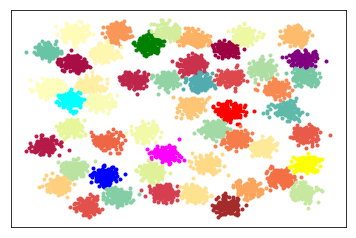

In [261]:
#clusters_labels, final_inside, final_outside, final_partial = getClustersIn_Out_Part(sampled_df, c_k_o_i, alpha, beta, not_outlier=True)

if select_df_test_flag:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df[sampled_df['Out'] == 1], c_k_o_i, alpha, beta, not_outlier=True)
else:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i, alpha, beta, not_outlier=True)

print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

final_list = final_inside + final_partial + final_outside
plot_custom_clusters(final_list, clusters_labels, 5, colors, "Result without Evaluation: ", folder_name + '/' + identity_name + '-hdbscan-without-outliers')

In [262]:
alpha = 1
beta = 0

In [263]:
import operator
import math

In [264]:
#Update Nearest Neighbor Evaluation Values By Applying Distance based on 3*Sigma + Mean
def getUpdatedEvaluation(dataset, clusters_labels, dataset_neighbors, clusters_centroids, c_k_o_i, features_set):
    
    clusters_labels = np.unique(dataset[label_col_name])        
    
    count_fringe = 0
    for index, o_c in dataset.iterrows():
        total_distance = 0
        for i in range(num_neighbors):
            distance = 0
            neighbor_index = dataset_neighbors[index][i]
            neighbor_obj = dataset.iloc[neighbor_index]

            for col in features_set:
                if col != label_col_name:
                    distance += (neighbor_obj[col] - o_c[col])**2

            distance = math.sqrt(distance)
            total_distance += distance 


        neighbor_average = total_distance/num_neighbors
        cluster_label = dataset.iloc[index]['L']
        cluster_average = clusters_centroids[cluster_label][1]
        cluster_average_average = clusters_centroids[cluster_label][2]
        cluster_average_std = clusters_centroids[cluster_label][3]
        
        #print("neighbor_average: ",neighbor_average)
        #print("cluster_average_average: ", cluster_average_average)
        #print("cluster_average: ", cluster_average)
        #if (sigma_multiples*neighbor_average) > cluster_average:
        #print("1: ", neighbor_average)
        #print(sigma_multiples*cluster_average_std + cluster_average_average)
        #print("cluster_average_std: ", cluster_average_std)
        if (neighbor_average) > (sigma_multiples*cluster_average_std + cluster_average_average):
            #print("sigma_multiples*cluster_average_std + cluster_average_average: ", sigma_multiples*cluster_average_std + cluster_average_average)
            count_fringe += 1
            cluster_label = dataset.iloc[index]['L']
            #c_k_o_i_min_inside[index][int(cluster_label)] = 0
            c_k_o_i[index][int(cluster_label)] = (sigma_multiples*cluster_average_std + cluster_average_average)/neighbor_average
    
    #print(count_fringe)
    return c_k_o_i


In [265]:
#print(c_k_o_i)

In [266]:
#c_k_o_i = getUpdatedEvaluation(sampled_df, clusters_labels, row_neighbors_list, clusters_centroids, c_k_o_i, features)
if select_df_test_flag:
    c_k_o_i = getUpdatedEvaluation(sampled_df[sampled_df['Out'] == 1], clusters_labels, row_neighbors_list, clusters_centroids, c_k_o_i, features)
else:
    c_k_o_i = getUpdatedEvaluation(sampled_df, clusters_labels, row_neighbors_list, clusters_centroids, c_k_o_i, features)


In [267]:
#print(c_k_o_i)

In [268]:
#Applying Spatial Filters to Get New Evalaution Values

def getUpdatedEvaluationValues(dataset, dataset_neighbors, label_col_name, c_k_o_i, features_set):
    import operator
    clusters_labels = np.unique(dataset[label_col_name])
    c_k_o_i_mean = np.zeros((len(dataset),len(clusters_labels)))
    c_k_o_i_min = np.zeros((len(dataset),len(clusters_labels)))
    c_k_o_i_max = np.zeros((len(dataset),len(clusters_labels)))
    c_k_o_i_median = np.zeros((len(dataset),len(clusters_labels)))
    c_k_o_i_laplacian = np.zeros((len(dataset),len(clusters_labels)))
    
    #Considering only neighbors of point
    #neighbor_c_k_o_i = np.zeros(num_neighbors)

    #Considering neighbors of point as well as point itself
    neighbor_c_k_o_i = np.zeros(num_neighbors+1)
    
    for cluster_label in clusters_labels:
        for index in row_neighbors_list:
            total_distance= 0
            for i in range(num_neighbors):
                neighbor_index = row_neighbors_list[index][i]
                
                ####################
                distance = 0
                neighbor_obj = dataset.iloc[neighbor_index]
                o_c = dataset.iloc[index]
                
                for col in features_set:
                    if col != label_col_name:
                        distance += (neighbor_obj[col] - o_c[col])**2

                distance = math.sqrt(distance)
                
                average_distance = clusters_centroids[cluster_label][1]
                centroid_distance_std = clusters_centroids[cluster_label][4]
                
                cluster_average_average = clusters_centroids[cluster_label][2]
                cluster_average_std = clusters_centroids[cluster_label][3]
                
                #Code to consider only those neighbors which are in specific radius
                '''
                if distance > (sigma_multiples*cluster_average_std + cluster_average_average):
                    #print("distance", distance)
                    #print("cluster_average_std", cluster_average_std)
                    #print("cluster_average_average", cluster_average_average)
                    #print("3*sigma + Mean", sigma_multiples*cluster_average_std + cluster_average_average)
                    
                    #neighbor_c_k_o_i[i] = c_k_o_i[index][int(cluster_label)] # Assign object evaluation value
                    #neighbor_c_k_o_i[i] = 0  # Assign 0 evaluation value
                    neighbor_c_k_o_i[i] = (sigma_multiples*cluster_average_std + cluster_average_average)/distance
                '''
                #Code to consider only those neighbors which are in specific radius based on centroid distance
                
                '''
                if distance > (sigma_multiples*centroid_distance_std + average_distance):
                    print("distance", distance)
                    print("centroid_distance_std", centroid_distance_std)
                    print("average_distance", average_distance)
                    print("3*sigma + Mean", sigma_multiples*centroid_distance_std + average_distance)
                    
                    #neighbor_c_k_o_i[i] = c_k_o_i[index][int(cluster_label)] # Assign object evaluation value
                    #neighbor_c_k_o_i[i] = 0  # Assign 0 evaluation value
                    neighbor_c_k_o_i[i] = (sigma_multiples*cluster_average_std + cluster_average_average)/distance
                else:
                    neighbor_c_k_o_i[i] = c_k_o_i[neighbor_index][int(cluster_label)]
                '''
                
                # Code not consider radius for neighbors
                neighbor_c_k_o_i[i] = c_k_o_i[neighbor_index][int(cluster_label)]
                
                total_distance += distance

            #Considering neighbors of point as well as point itself
            neighbor_c_k_o_i[i+1] = c_k_o_i[index][int(cluster_label)]
            
            #neighbor_c_k_o_i = np.sort(neighbor_c_k_o_i)
            
            c_k_o_i_mean[index][int(cluster_label)] =  np.mean(neighbor_c_k_o_i)
            c_k_o_i_min[index][int(cluster_label)] =  np.nanmin(neighbor_c_k_o_i)
            c_k_o_i_max[index][int(cluster_label)] =  np.nanmax(neighbor_c_k_o_i)
            c_k_o_i_median[index][int(cluster_label)] =  np.median(neighbor_c_k_o_i)
            
            laplacian_value = np.sum(neighbor_c_k_o_i[0:num_neighbors]) - neighbor_c_k_o_i[num_neighbors]*(num_neighbors)
            c_k_o_i_laplacian[index][int(cluster_label)] = (laplacian_value-(-num_neighbors))/(num_neighbors-(-num_neighbors))
            
            #print(neighbor_c_k_o_i)
            #print("Mean", np.mean(neighbor_c_k_o_i))
            #print("Min", np.nanmin(neighbor_c_k_o_i))
            #print("Max", np.nanmax(neighbor_c_k_o_i))
            #print("Median", np.median(neighbor_c_k_o_i))
            #print("Laplacian", c_k_o_i_laplacian[index][int(cluster_label)])
                
            
    
    return c_k_o_i_mean, c_k_o_i_min, c_k_o_i_max, c_k_o_i_median, c_k_o_i_laplacian

In [269]:
#c_k_o_i_mean, c_k_o_i_min, c_k_o_i_max, c_k_o_i_median, c_k_o_i_laplacian = getUpdatedEvaluationValues(sampled_df, row_neighbors_list, label_col_name, c_k_o_i, features)
if select_df_test_flag:
    c_k_o_i_mean, c_k_o_i_min, c_k_o_i_max, c_k_o_i_median, c_k_o_i_laplacian = getUpdatedEvaluationValues(sampled_df[sampled_df['Out'] == 1], row_neighbors_list, label_col_name, c_k_o_i, features)
else:
    c_k_o_i_mean, c_k_o_i_min, c_k_o_i_max, c_k_o_i_median, c_k_o_i_laplacian = getUpdatedEvaluationValues(sampled_df, row_neighbors_list, label_col_name, c_k_o_i, features)


In [270]:
write_to_file('../Files/sampled_df.csv', np.array(sampled_df))
write_to_file('../Files/c_k_o_i.csv', c_k_o_i)
write_to_file('../Files/c_k_o_i_mean.csv', c_k_o_i_mean)
write_to_file('../Files/c_k_o_i_min.csv', c_k_o_i_min)
write_to_file('../Files/c_k_o_i_max.csv', c_k_o_i_max)
write_to_file('../Files/c_k_o_i_median.csv', c_k_o_i_median)
write_to_file('../Files/c_k_o_i_laplacian.csv', c_k_o_i_laplacian)

In [271]:
#clusters_labels, final_inside, final_outside, final_partial = getClustersIn_Out_Part(sampled_df, c_k_o_i, alpha, beta)
if select_df_test_flag:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df[sampled_df['Out'] == 1], c_k_o_i, alpha, beta)
else:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i, alpha, beta)

print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

final_list = final_inside + final_partial + final_outside
#plot_custom_clusters(final_list, clusters_labels, 5, colors, "Normal Evaluation: ", folder_name + '/3-' + identity_name)

Total Inside:  7123
Total Outside:  0
Total Partial:  377


In [272]:
#clusters_labels, final_inside, final_outside, final_partial = getClustersIn_Out_Part(sampled_df, c_k_o_i_mean, alpha, beta)
if select_df_test_flag:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df[sampled_df['Out'] == 1], c_k_o_i_mean, alpha, beta)
else:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_mean, alpha, beta)

print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

final_list = final_inside + final_partial + final_outside
#plot_custom_clusters(final_list, clusters_labels, 5, colors, "Mean Evaluation: ", folder_name + '/4-' + identity_name)

Total Inside:  6740
Total Outside:  0
Total Partial:  760


Total Inside:  6740
Total Outside:  87
Total Partial:  673
(53920, 42968)
20
(52019, 42206)
20
(52570, 42476)
20
(54220, 42081)
20
(54268, 43420)
20
(52288, 42408)
20
(54436, 39727)
20
(52391, 44323)
20
(54995, 43655)
20
(53761, 43403)
20
(53769, 43786)
20
(52883, 41365)
20
(54448, 42846)
20
(53358, 40498)
20
(54626, 43461)
20
(53751, 42326)
20
(52714, 41735)
20
(53545, 43025)
20
(55281, 41180)
20
(52522, 42088)
20
(53825, 42358)
20
(54951, 43538)
20
(55113, 40262)
20
(53366, 41560)
20
(52425, 42226)
20
(53729, 43219)
20
(54658, 41295)
20
(53236, 44502)
20
(54569, 43519)
20
(55192, 40969)
20
(52661, 42382)
20
(54389, 41903)
20
(54931, 42810)
20
(55003, 43219)
20
(54258, 44302)
20
(53785, 43039)
20
(53844, 44271)
20
(53300, 41958)
20
(54307, 44020)
20
(52648, 43224)
20
(51953, 41115)
20
(53655, 41979)
20
(54146, 41202)
20
(52375, 41772)
20
(54484, 41591)
20
(51271, 41252)
20
(53894, 43780)
20
(51496, 42107)
20
(55580, 41750)
20
(52235, 43593)
20
(52895, 40396)
20
(52314, 40370)
20
(5352

(44436, 47374)
14
(43155, 45637)
14
(45590, 45829)
14
(44781, 45786)
14
(43601, 46919)
14
(46305, 45959)
14
(43346, 44722)
14
(42205, 44895)
14
(44128, 43566)
14
(42729, 46022)
14
(44993, 47285)
14
(43292, 46926)
14
(43911, 45724)
14
(43953, 45891)
14
(45779, 47297)
14
(42357, 44214)
14
(44328, 43843)
14
(42809, 47544)
14
(43157, 42754)
14
(43925, 45390)
14
(43115, 47237)
14
(43073, 45662)
14
(45030, 47358)
14
(44305, 47441)
14
(44191, 46111)
14
(45748, 45373)
14
(42350, 45677)
14
(44121, 45686)
14
(43537, 44164)
14
(45307, 46959)
14
(44906, 44367)
14
(46259, 47739)
14
(45462, 46015)
14
(44314, 46552)
14
(44773, 44472)
14
(44108, 47308)
14
(44630, 45910)
14
(44403, 45462)
14
(45455, 47051)
14
(44222, 47283)
14
(44720, 46277)
14
(44441, 44084)
14
(46080, 45581)
14
(44860, 45401)
14
(45467, 46484)
14
(43637, 47501)
14
(44730, 44597)
14
(45639, 46267)
14
(45155, 46300)
14
(42885, 43424)
14
(41809, 46177)
14
(44570, 47080)
14
(45621, 43643)
14
(43997, 43614)
14
(45602, 47699)
14
(45323, 45

(23262, 45277)
11
(24619, 43309)
11
(21823, 46630)
11
(23171, 43916)
11
(24986, 45528)
11
(21894, 45553)
11
(23642, 45424)
11
(24368, 44559)
11
(22821, 45763)
11
(20705, 45156)
11
(22593, 45289)
11
(23196, 42015)
11
(21889, 45210)
11
(23114, 43770)
11
(20960, 43907)
11
(22358, 44973)
11
(21348, 47547)
11
(20459, 45221)
11
(23395, 45244)
11
(23223, 45774)
11
(23398, 43760)
11
(24262, 42826)
11
(24041, 46280)
11
(22984, 45050)
11
(20993, 44150)
11
(22116, 47089)
11
(22296, 44995)
11
(23089, 45196)
11
(20887, 43671)
11
(22731, 44689)
11
(20848, 44658)
11
(22850, 45783)
11
(23292, 44226)
11
(24581, 42479)
11
(24431, 44071)
11
(23364, 44594)
11
(23560, 45345)
11
(22335, 44581)
11
(23525, 44402)
11
(23472, 42592)
11
(21585, 44932)
11
(20582, 45959)
11
(20910, 46307)
11
(23086, 44507)
11
(24480, 44200)
11
(24217, 45276)
11
(23661, 43901)
11
(23530, 46214)
11
(24222, 46031)
11
(23540, 46249)
11
(22653, 42993)
11
(21390, 45195)
11
(23972, 42333)
11
(23049, 46303)
11
(24173, 42512)
11
(24429, 44

(36360, 37624)
25
(34564, 38714)
25
(35715, 35049)
25
(36260, 35245)
25
(35993, 36755)
25
(34947, 37142)
25
(34177, 36131)
25
(34666, 35740)
25
(34429, 38562)
25
(35129, 38752)
25
(36452, 37390)
25
(35397, 38645)
25
(38050, 37010)
25
(34639, 35788)
25
(34595, 33970)
25
(35045, 35212)
25
(37004, 35221)
25
(35398, 34770)
25
(35668, 37707)
25
(35582, 36628)
25
(35758, 61383)
23
(37510, 58769)
23
(35937, 58405)
23
(37411, 59122)
23
(37356, 56126)
23
(36024, 58025)
23
(35873, 57697)
23
(35043, 57610)
23
(38898, 57418)
23
(35756, 56883)
23
(35770, 57807)
23
(35393, 59625)
23
(32705, 60775)
39
(36112, 57732)
23
(37949, 59005)
23
(35942, 60910)
23
(35962, 58314)
23
(34975, 56890)
23
(36383, 56022)
23
(33530, 56923)
23
(35784, 57029)
23
(37004, 59517)
23
(38885, 57734)
23
(34875, 58388)
23
(35249, 56647)
23
(35783, 56895)
23
(36231, 58437)
23
(34200, 56925)
23
(34007, 59541)
23
(36695, 57484)
23
(38784, 58347)
23
(35592, 58810)
23
(34117, 58619)
23
(34604, 59669)
23
(36244, 56138)
23
(36930, 55

(20009, 60409)
21
(19007, 61003)
21
(20612, 58724)
21
(19439, 61775)
21
(19685, 60178)
21
(18288, 60306)
21
(21349, 61968)
21
(21514, 61173)
21
(20433, 59887)
21
(18757, 59265)
21
(19628, 61511)
21
(17601, 61680)
21
(20274, 60701)
21
(20308, 60378)
21
(20970, 58660)
21
(18730, 60090)
21
(19963, 60202)
21
(21348, 60804)
21
(19728, 61905)
21
(19366, 62085)
21
(18830, 61493)
21
(19969, 62625)
21
(18909, 52601)
31
(17116, 51058)
31
(16100, 53394)
31
(16090, 53751)
31
(15917, 52931)
31
(15656, 55281)
31
(18871, 51566)
31
(19414, 54082)
31
(16437, 52739)
31
(16028, 55929)
31
(15972, 53146)
31
(16536, 53987)
31
(17538, 51935)
31
(18616, 53201)
31
(16174, 53398)
31
(19439, 53600)
31
(17104, 54251)
31
(19058, 51974)
31
(17090, 51246)
31
(13744, 52654)
31
(16054, 55988)
31
(16600, 53018)
31
(17561, 51049)
31
(17282, 55598)
31
(16817, 51881)
31
(18255, 53443)
31
(17770, 54173)
31
(16075, 54791)
31
(15392, 53579)
31
(17559, 55061)
31
(17360, 55652)
31
(14388, 53648)
31
(15825, 51910)
31
(17510, 52

(9242, 60721)
32
(8353, 59821)
32
(10603, 59956)
32
(10216, 60154)
32
(11096, 57117)
32
(12474, 57795)
32
(10812, 61715)
32
(11080, 57594)
32
(13095, 61223)
32
(12412, 59050)
32
(8809, 58271)
32
(12778, 62049)
32
(10449, 62189)
32
(8681, 62818)
32
(8149, 60049)
32
(10093, 57968)
32
(12202, 60952)
32
(10837, 57202)
32
(10700, 60580)
32
(9656, 58216)
32
(9326, 60606)
32
(11496, 58947)
32
(10599, 60752)
32
(10975, 59231)
32
(12278, 57902)
32
(11545, 59063)
32
(12886, 61092)
32
(9819, 58554)
32
(10728, 62127)
32
(9858, 59272)
32
(11481, 59797)
32
(10315, 60301)
32
(10866, 59140)
32
(9427, 60973)
32
(12008, 58420)
32
(9820, 58508)
32
(13050, 61662)
32
(7736, 60919)
32
(10720, 62473)
32
(12942, 61313)
32
(12029, 60342)
32
(12909, 58933)
32
(9916, 60240)
32
(12191, 57368)
32
(11740, 59652)
32
(10271, 60510)
32
(10218, 60133)
32
(8147, 57929)
32
(13190, 59501)
32
(11815, 58248)
32
(8577, 61455)
32
(12671, 61339)
32
(8378, 60945)
32
(9841, 59925)
32
(11304, 58688)
32
(12285, 61395)
32
(10338, 6

(15826, 42516)
30
(13990, 42565)
30
(14823, 42317)
30
(13562, 41690)
30
(14782, 44208)
30
(15069, 44471)
30
(12556, 43853)
30
(12893, 43813)
30
(13707, 42127)
30
(14655, 43612)
30
(14991, 42009)
30
(13431, 43471)
30
(12924, 43633)
30
(11343, 41951)
30
(13674, 42904)
30
(17293, 42226)
30
(11039, 38831)
4
(16236, 41968)
30
(13824, 37378)
34
(17516, 39586)
34
(16923, 36809)
34
(14683, 36805)
34
(17578, 37686)
34
(18855, 38176)
34
(15721, 38939)
34
(16293, 36422)
34
(15663, 39807)
34
(14193, 37146)
34
(15903, 39953)
34
(17830, 37298)
34
(17794, 37799)
34
(15970, 35907)
34
(17010, 38367)
34
(15778, 37432)
34
(16515, 35083)
34
(16414, 36076)
34
(14535, 38111)
34
(18387, 37949)
34
(19215, 36537)
34
(14089, 36807)
34
(15643, 37071)
34
(16539, 36513)
34
(17000, 36353)
34
(17057, 37353)
34
(16056, 37834)
34
(16086, 38113)
34
(16962, 38535)
34
(14022, 38099)
34
(16676, 38732)
34
(16495, 36750)
34
(14777, 36426)
34
(15634, 37284)
34
(14782, 38036)
34
(15693, 39198)
34
(17384, 37851)
34
(14906, 384

(43595, 35490)
0
(44554, 36035)
0
(41496, 34384)
0
(43718, 35031)
0
(42266, 34561)
0
(43146, 37431)
0
(43328, 32882)
0
(43965, 33758)
0
(42847, 34244)
0
(42968, 34995)
0
(41888, 34501)
0
(43648, 35505)
0
(42037, 35794)
0
(45463, 34483)
0
(44280, 33867)
0
(43393, 34827)
0
(42378, 35745)
0
(41273, 35067)
0
(43796, 32311)
0
(45364, 33095)
0
(40993, 35533)
0
(43294, 37614)
0
(42785, 33228)
0
(45483, 36519)
0
(43260, 34943)
0
(41312, 35601)
0
(44959, 35167)
0
(44263, 33651)
0
(43367, 35070)
0
(44552, 34771)
0
(44984, 37272)
0
(43811, 33789)
0
(46134, 35217)
0
(43261, 38108)
0
(42011, 35696)
0
(43737, 32817)
0
(45384, 36530)
0
(42862, 34504)
0
(43216, 34939)
0
(42237, 34262)
0
(42249, 35113)
0
(42602, 35679)
0
(44769, 34535)
0
(41384, 37669)
0
(45010, 33501)
0
(44089, 34530)
0
(43518, 34479)
0
(45407, 34472)
0
(42705, 33706)
0
(42377, 34121)
0
(46879, 36101)
0
(41922, 36116)
0
(41955, 35508)
0
(42406, 35998)
0
(44401, 33646)
0
(42558, 33844)
0
(45411, 33445)
0
(45644, 35586)
0
(42617, 35670)

(58646, 27186)
16
(58462, 28535)
16
(59878, 26706)
16
(58614, 28773)
16
(61099, 29083)
16
(60160, 29029)
16
(60182, 27285)
16
(61712, 27968)
16
(60523, 27329)
16
(62157, 29329)
16
(59697, 27485)
16
(61553, 26657)
16
(59155, 27035)
16
(59949, 26516)
16
(61436, 30223)
16
(60156, 25507)
16
(58304, 25665)
16
(62019, 27673)
16
(62431, 27902)
16
(60226, 25204)
16
(60502, 25482)
16
(60779, 27398)
16
(61484, 26946)
16
(60373, 28807)
16
(60069, 28119)
16
(61695, 27685)
16
(58176, 26916)
16
(59876, 27838)
16
(60167, 27920)
16
(60221, 27253)
16
(60260, 29732)
16
(60650, 28202)
16
(60210, 27232)
16
(59684, 25949)
16
(59677, 25725)
16
(62692, 29282)
16
(60654, 28987)
16
(60524, 26488)
16
(59615, 26767)
16
(60288, 26488)
16
(60073, 25250)
16
(61444, 25396)
16
(60989, 28086)
16
(60159, 29394)
16
(59172, 28367)
16
(59748, 29320)
16
(62217, 28104)
16
(59427, 28300)
16
(62151, 28398)
16
(62188, 26031)
16
(62833, 25956)
16
(59809, 27410)
16
(60397, 28213)
16
(58534, 26184)
16
(59301, 26122)
16
(56808, 26

(14423, 25801)
17
(16161, 25461)
17
(19151, 23781)
17
(17294, 24801)
17
(19172, 25370)
17
(17672, 28124)
17
(18649, 25043)
17
(18240, 26864)
17
(16846, 26128)
17
(15718, 25497)
17
(16056, 24384)
17
(16766, 25036)
17
(17488, 25743)
17
(17343, 27032)
17
(16669, 24102)
17
(18144, 26739)
17
(18249, 24324)
17
(16889, 25891)
17
(14743, 24907)
17
(17790, 23197)
17
(20360, 23621)
17
(17582, 24517)
17
(16781, 25568)
17
(18430, 25763)
17
(15085, 26535)
17
(16500, 22665)
17
(17531, 25805)
17
(16134, 24570)
17
(17636, 23726)
17
(19271, 25591)
17
(17367, 24594)
17
(17680, 26246)
17
(17360, 25859)
17
(19237, 25170)
17
(18354, 24744)
17
(17646, 24411)
17
(19545, 25494)
17
(15182, 26610)
17
(17218, 25332)
17
(17914, 24885)
17
(16974, 24082)
17
(17269, 25349)
17
(18398, 25148)
17
(19493, 24887)
17
(17987, 26518)
17
(16893, 25122)
17
(18763, 24448)
17
(16837, 26072)
17
(17430, 24985)
17
(17456, 26189)
17
(18407, 26152)
17
(17030, 24430)
17
(16053, 26575)
17
(25017, 26287)
35
(27476, 28969)
35
(25713, 26

(30281, 8342)
13
(30164, 5730)
13
(28136, 7193)
13
(28215, 8099)
13
(31694, 7373)
13
(29339, 7695)
13
(30275, 9875)
13
(27614, 7578)
13
(31572, 7874)
13
(31208, 6021)
13
(29418, 11129)
13
(28378, 10490)
13
(27384, 8465)
13
(30937, 10662)
13
(29647, 7660)
13
(29224, 10665)
13
(30516, 6785)
13
(28779, 10525)
13
(28664, 10813)
13
(26661, 9145)
13
(30083, 7705)
13
(27682, 6080)
13
(30365, 7152)
13
(30310, 7993)
13
(30321, 11406)
13
(30279, 6937)
13
(31254, 9060)
13
(28044, 10189)
13
(28185, 8205)
13
(29113, 10618)
13
(29138, 8224)
13
(29870, 6702)
13
(29197, 8709)
13
(29014, 9481)
13
(30474, 9926)
13
(28263, 8739)
13
(31125, 9363)
13
(31273, 8566)
13
(30804, 8896)
13
(30228, 9782)
13
(30840, 11648)
13
(29800, 9556)
13
(29011, 9376)
13
(30534, 8536)
13
(29470, 7394)
13
(28338, 7453)
13
(29435, 8754)
13
(27826, 7387)
13
(31107, 8230)
13
(30942, 7732)
13
(31595, 8842)
13
(30242, 11736)
13
(29985, 8060)
13
(28666, 7851)
13
(31361, 9580)
13
(30800, 10133)
13
(30426, 7059)
13
(31232, 8733)
13
(2

(49940, 8230)
22
(46978, 10228)
22
(46142, 10610)
22
(48191, 10300)
22
(45867, 11016)
22
(46975, 9596)
22
(47294, 11334)
22
(47321, 9587)
22
(49028, 11576)
22
(48528, 11443)
22
(48982, 11032)
22
(45447, 11232)
22
(48337, 9535)
22
(48314, 8457)
22
(48984, 9767)
22
(50322, 9080)
22
(49076, 11434)
22
(47687, 12024)
22
(49921, 9013)
22
(45280, 12421)
22
(48995, 10453)
22
(47101, 9176)
22
(45362, 10802)
22
(47610, 10773)
22
(50455, 8512)
22
(48071, 9922)
22
(49035, 10565)
22
(48327, 10072)
22
(48143, 10229)
22
(47132, 9681)
22
(46130, 10988)
22
(46041, 9147)
22
(46753, 9639)
22
(48146, 9754)
22
(45693, 9727)
22
(48471, 9734)
22
(50801, 9706)
22
(48981, 11865)
22
(46956, 10132)
22
(50893, 9594)
22
(48318, 10591)
22
(47967, 9582)
22
(48576, 7577)
22
(45772, 12677)
22
(48812, 11913)
22
(48000, 13097)
22
(47318, 8022)
22
(46643, 9287)
22
(46618, 9038)
22
(49152, 9366)
22
(48628, 11359)
22
(48353, 9749)
22
(48792, 10876)
22
(46025, 12678)
22
(44541, 11276)
22
(45447, 11326)
22
(50260, 8448)
22
(

(9501, 17761)
41
(7857, 16315)
41
(8981, 16839)
41
(10707, 14634)
41
(11506, 15093)
41
(12480, 16628)
41
(10013, 16365)
41
(10382, 17903)
41
(12208, 14118)
41
(9646, 17300)
41
(8942, 17250)
41
(10886, 18305)
41
(11121, 14882)
41
(10987, 15971)
41
(11729, 16923)
41
(11482, 15693)
41
(7531, 17371)
41
(11380, 15128)
41
(11326, 18212)
41
(12125, 15118)
41
(11366, 15613)
41
(10280, 16219)
41
(9835, 16145)
41
(11543, 15293)
41
(10391, 15835)
41
(8731, 18826)
41
(12718, 17004)
41
(12297, 16956)
41
(9739, 18265)
41
(11941, 14286)
41
(8887, 18368)
41
(11854, 18070)
41
(9658, 18401)
41
(11060, 16860)
41
(9563, 18296)
41
(9471, 16963)
41
(10007, 18295)
41
(12140, 18586)
41
(9697, 16161)
41
(9333, 15419)
41
(12498, 16738)
41
(9638, 17772)
41
(9232, 17925)
41
(10552, 15709)
41
(11343, 16582)
41
(9753, 16309)
41
(10245, 16233)
41
(9418, 17739)
41
(9693, 15344)
41
(8952, 16592)
41
(9125, 17357)
41
(10320, 15616)
41
(10834, 15624)
41
(10118, 16260)
41
(7520, 15784)
41
(9957, 17421)
41
(13091, 15709)
4

(21814, 6940)
45
(20094, 7787)
45
(20518, 8194)
45
(18240, 6222)
45
(22293, 7235)
45
(22130, 8771)
45
(19736, 8109)
45
(20307, 8293)
45
(23051, 6647)
45
(19904, 7798)
45
(18639, 6748)
45
(20292, 7628)
45
(18009, 6182)
45
(20445, 6402)
45
(20248, 8964)
45
(20241, 9288)
45
(22057, 7875)
45
(20716, 5917)
45
(19793, 8542)
45
(17769, 8115)
45
(21976, 7957)
45
(20288, 7843)
45
(19558, 6565)
45
(19421, 6789)
45
(20028, 6571)
45
(19502, 8707)
45
(19036, 6574)
45
(19540, 9945)
45
(19612, 8354)
45
(19868, 7695)
45
(19560, 7414)
45
(18583, 7679)
45
(20496, 10188)
45
(18422, 5535)
45
(20754, 6717)
45
(22154, 8142)
45
(18598, 9301)
45
(20647, 8891)
45
(21654, 6857)
45
(21245, 6601)
45
(20739, 8502)
45
(12036, 4941)
15
(12537, 5249)
15
(13535, 3598)
15
(14355, 4747)
15
(13521, 4097)
15
(12814, 3051)
15
(13452, 4268)
15
(12695, 5971)
15
(13557, 5655)
15
(12492, 5827)
15
(12276, 4839)
15
(11694, 3692)
15
(13055, 4992)
15
(10914, 4315)
15
(12388, 5675)
15
(11782, 6710)
15
(16470, 3784)
15
(10336, 5273)

(51985, 34337)
-1
(58641, 32430)
-1
(57936, 38129)
-1
(56861, 38405)
-1
(56704, 37607)
-1
(60540, 34103)
-1
(52366, 33053)
-1
(59438, 56138)
-1
(57806, 56025)
-1
(60022, 56705)
-1
(59556, 56505)
-1
(56965, 55756)
-1
(54495, 56286)
-1
(57858, 56213)
-1
(61702, 59116)
-1
(58683, 56655)
-1
(54651, 60660)
-1
(58911, 56004)
-1
(38896, 38874)
-1
(32527, 34568)
-1
(33189, 39289)
-1
(33419, 32877)
-1
(32388, 32912)
-1
(33096, 58751)
-1
(39624, 59103)
-1
(33206, 57563)
-1
(37832, 60136)
-1
(38898, 59326)
-1
(33558, 57552)
-1
(33063, 56115)
-1
(32799, 57530)
-1
(34913, 61426)
-1
(33395, 58278)
-1
(37013, 61138)
-1
(33199, 57554)
-1
(35014, 60821)
-1
(39365, 57730)
-1
(32599, 57242)
-1
(33182, 58518)
-1
(38215, 56305)
-1
(29428, 57368)
-1
(28683, 57407)
-1
(27876, 58342)
-1
(33271, 57782)
-1
(28715, 59480)
-1
(28632, 58133)
-1
(28905, 58423)
-1
(28036, 60557)
-1
(29076, 64142)
-1
(27161, 58169)
-1
(32238, 58780)
-1
(27350, 59069)
-1
(28257, 58652)
-1
(28721, 59763)
-1
(33108, 58316)
-1
(30924, 57

(6887, 18728)
-1
(9765, 13710)
-1
(8514, 15182)
-1
(9101, 14933)
-1
(10187, 13720)
-1
(10123, 19775)
-1
(8157, 15237)
-1
(5158, 13217)
-1
(2919, 10604)
-1
(7957, 13693)
-1
(6617, 14231)
-1
(8805, 7538)
-1
(4354, 14565)
-1
(3553, 11008)
-1
(7252, 13570)
-1
(8346, 13669)
-1
(3794, 13270)
-1
(7927, 13995)
-1
(16849, 10680)
-1
(13923, 12326)
-1
(21234, 14810)
-1
(16541, 11085)
-1
(17304, 11229)
-1
(15006, 12501)
-1
(15645, 11125)
-1
(24312, 8318)
-1
(17395, 8832)
-1
(22355, 10331)
-1
(22397, 9201)
-1
(18600, 10312)
-1
(17751, 9146)
-1
(14629, 7497)
-1
(10420, 3945)
-1
(14194, 7945)
-1
(13700, 8485)
-1
(15113, 6697)
-1
(16557, 8813)
-1
(9529, 4149)
-1
(14535, 6683)
-1
(36591, 19056)
-1
(35179, 19128)
-1
(35792, 21525)
-1
(36434, 20314)
-1
(35501, 18606)
-1
(35265, 17459)
-1
(56020, 44948)
-1
(52344, 45540)
-1
(51681, 45290)
-1
(49901, 43636)
-1
(61121, 48956)
-1
(55896, 47225)
-1
(58018, 42944)
-1
(59163, 55436)
-1
(59334, 48886)
-1
(57964, 48880)
-1
(40567, 45043)
-1
(47649, 44608)
-1
(339

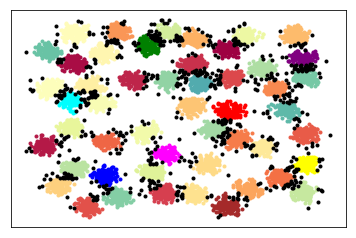

In [284]:
alpha = 1
beta = 0
#colors = ['red', 'green', 'blue', 'brown', 'cyan', 'purple', 'magenta', 'yellow']

#clusters_labels, final_inside, final_outside, final_partial = getClustersIn_Out_Part(sampled_df, c_k_o_i_min, alpha, beta)
if select_df_test_flag:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df[sampled_df['Out'] == 1], c_k_o_i_min, alpha, beta)
else:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_min, alpha, beta)

print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

final_list = final_inside + final_partial + final_outside
plot_custom_clusters(final_list, clusters_labels, 5, colors, "Minimum Evaluation: ", folder_name + '/' + identity_name + '-minimum-result_1')

Total Inside:  7062
Total Outside:  153
Total Partial:  285


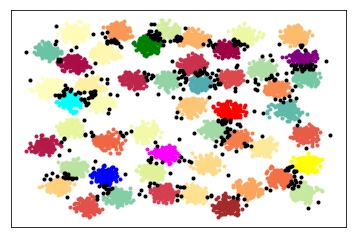

In [287]:
alpha = 0.8
beta = 0.2

#clusters_labels, final_inside, final_outside, final_partial = getClustersIn_Out_Part(sampled_df, c_k_o_i_min, alpha, beta)
if select_df_test_flag:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df[sampled_df['Out'] == 1], c_k_o_i_min, alpha, beta)
else:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_min, alpha, beta)

print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

final_list = final_inside + final_partial + final_outside
plot_custom_clusters(final_list, clusters_labels, 5, colors, "Minimum Evaluation: ", folder_name + '/' + identity_name + '-minimum-result_2')

Total Inside:  7174
Total Outside:  259
Total Partial:  67


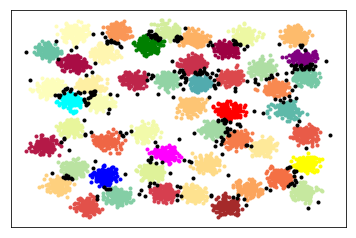

In [288]:
alpha = 0.7
beta = 0.45

#clusters_labels, final_inside, final_outside, final_partial = getClustersIn_Out_Part(sampled_df, c_k_o_i_min, alpha, beta)
if select_df_test_flag:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df[sampled_df['Out'] == 1], c_k_o_i_min, alpha, beta)
else:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_min, alpha, beta)

print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

final_list = final_inside + final_partial + final_outside
plot_custom_clusters(final_list, clusters_labels, 5, colors, "Minimum Evaluation: ", folder_name + '/' + identity_name + '-minimum-result_3')

Total Inside:  7290
Total Outside:  153
Total Partial:  57


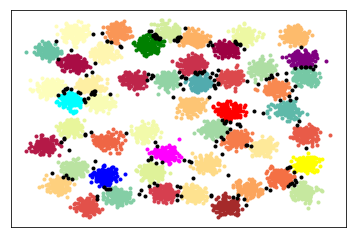

In [289]:
alpha = 0.3
beta = 0.15

#clusters_labels, final_inside, final_outside, final_partial = getClustersIn_Out_Part(sampled_df, c_k_o_i_min, alpha, beta)
if select_df_test_flag:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df[sampled_df['Out'] == 1], c_k_o_i_min, alpha, beta)
else:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_min, alpha, beta)

print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

final_list = final_inside + final_partial + final_outside
plot_custom_clusters(final_list, clusters_labels, 5, colors, "Minimum Evaluation: ", folder_name + '/' + identity_name + '-minimum-result_4')

In [290]:
if select_df_test_flag:
    print(select_df_test_out.shape)
print(select_df.shape)
print(sampled_df.shape)

(7500, 2)
(7500, 3)


In [291]:
# Run this Code only if we have Test data in dataset i.e. sampled_df['Out']
def euclidean_distance(row1, row2, features_set):
    distance = 0.0
    for col in features_set:
        if col != label_col_name:
            distance += (row1[col] - row2[col])**2
    return sqrt(distance)

# Locate the most similar neighbors
def get_neighbors(dataset_train, row, row_index, num_neighbors,final_inside):
    distances = list()
    neighbors = list()

    #Code used to count object itself as neighbour of its own
    #distances.append((row_index, row, 0))

    for index, row_dataset_train in dataset_train.iterrows():
        if tuple(row_dataset_train) in final_list:
            dist = euclidean_distance(row, row_dataset_train, features)
            #print(dist)
            distances.append((index, row_dataset_train, dist))

    distances.sort(key=lambda tup: tup[2])
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])        
    return neighbors


def get_testdata_neighbors_list(num_neighbors, final_inside):
    row_neighbors_list_test = {}
    # calculate the Euclidean distance between two vectors
    for index, row in select_df_test.iterrows():
        neighbors = get_neighbors(select_df, row, index, num_neighbors,final_inside)
        row_neighbors_list_test[index] = neighbors
    
    return row_neighbors_list_test


In [292]:
if select_df_test_flag:
    row_neighbors_list_test = get_testdata_neighbors_list(num_neighbors, final_inside)

In [293]:
# Neighborhood based Evaluation Function Score Calculations
if select_df_test_flag:
    c_k_o_i_test = getEvaluationValues(sampled_df, row_neighbors_list_test, label_col_name)
    

In [294]:
# Here we consider all outliers are at the end of the records,
# c_k_o_i_test size include train and test both evaluation, however, train evalation (c_k_o_i) 
# has only not-outliers dataset, so we want the to updated test evaluation c_k_o_i_test, where
# initial records shows normal records while last records shows outliers records.

if select_df_test_flag:
    for i in range(c_k_o_i.shape[0]):
        for j in range(c_k_o_i_test.shape[1]):
            c_k_o_i_test[i][j] = c_k_o_i[i][j]
        

In [295]:
c_k_o_i.shape[0]

7500

In [296]:
if select_df_test_flag:
    c_k_o_i_test.shape[0]

In [297]:
# Evaluation Function Score Updation based based on "Mean +/- Sigma * 3"
if select_df_test_flag:
    c_k_o_i_test = getUpdatedEvaluation(sampled_df, clusters_labels, row_neighbors_list_test, clusters_centroids, c_k_o_i_test, features, True)
    

In [298]:
if select_df_test_flag:
    print(c_k_o_i_test.shape)
#print(c_k_o_i_test[c_k_o_i_test > 0])

In [299]:
# Evaluation Function Score Updation based based on spatial Filtering

if select_df_test_flag:
    c_k_o_i_mean_test, c_k_o_i_min_test, c_k_o_i_max_test, c_k_o_i_median_test, c_k_o_i_laplacian_test = getUpdatedEvaluationValues(sampled_df, row_neighbors_list_test, label_col_name, c_k_o_i_test, features)
    

In [300]:
if select_df_test_flag:
    print(c_k_o_i_min_test.shape)
#print(c_k_o_i_min_test[c_k_o_i_min_test != 1])


In [301]:
if select_df_test_flag:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_min_test, alpha, beta)
    

In [302]:
if select_df_test_flag:        
    print("Reduction Elevation based three-way Clustering (RE3WC): ")
    n_count = 0
    outliers_count = 0

    test_range = sampled_df.shape[0] - select_df_test.shape[0]
    test_range_out = sampled_df.shape[0] - select_df_test_out.shape[0]
    n_count = select_df_test_out.shape[0]

    TP = 0 
    FP = 0
    FN = 0
    TN = 0

    for i in range(test_range, sampled_df.shape[0]):
        if i in outliers_indices and i >= test_range_out:
            TP += 1
        elif i not in outliers_indices and i >= test_range_out:
            FN += 1
        elif i in outliers_indices and i < test_range_out:
            FP += 1
        elif i not in outliers_indices and i < test_range_out:
            TN += 1

    print("TP    |    FP    |    FN    |    TN")
    print(TP, ",      ", FP, ",     ", FN, ",      ", TN)

In [303]:
write_outliers_detected(final_inside,final_partial,final_outside, file_measures, 'Minimum')

In [304]:
#calculate_db_index(final_inside, clusters_labels, file_measures, 'Minimum')

In [305]:
#calculate_silhouette_score(final_inside, clusters_labels, file_measures, 'Minimum')

In [306]:
calculate_accuracy(final_inside, clusters_labels, sampled_df, file_measures, 'Minimum')

Accuracy Score (Minimum): 97.1733


In [307]:
calculate_confusion_matrix(final_inside, clusters_labels, sampled_df, file_measures, 'Minimum')

length:  7290
Confusion Matrices (Minimum): {0: [143, 0, 212, 7145], 1: [155, 2, 210, 7133], 2: [146, 0, 212, 7142], 3: [148, 0, 212, 7140], 4: [145, 0, 212, 7143], 5: [143, 0, 212, 7145], 6: [149, 0, 212, 7139], 7: [146, 0, 212, 7142], 8: [140, 0, 212, 7148], 9: [151, 0, 212, 7137], 10: [149, 0, 212, 7139], 11: [146, 0, 212, 7142], 12: [148, 0, 212, 7140], 13: [142, 0, 212, 7146], 14: [148, 0, 212, 7140], 15: [147, 0, 212, 7141], 16: [148, 0, 212, 7140], 17: [149, 0, 212, 7139], 18: [141, 0, 212, 7147], 19: [144, 0, 212, 7144], 20: [143, 0, 212, 7145], 21: [149, 0, 212, 7139], 22: [146, 0, 212, 7142], 23: [142, 0, 212, 7146], 24: [150, 0, 212, 7138], 25: [148, 0, 212, 7140], 26: [147, 0, 212, 7141], 27: [146, 0, 212, 7142], 28: [145, 0, 212, 7143], 29: [147, 0, 212, 7141], 30: [144, 0, 212, 7144], 31: [144, 0, 212, 7144], 32: [149, 0, 212, 7139], 33: [144, 0, 212, 7144], 34: [145, 0, 212, 7143], 35: [148, 0, 212, 7140], 36: [152, 0, 212, 7136], 37: [145, 0, 212, 7143], 38: [147, 0, 21

In [308]:
#clusters_labels, final_inside, final_outside, final_partial = getClustersIn_Out_Part(sampled_df, c_k_o_i_max, alpha, beta)
if select_df_test_flag:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df[sampled_df['Out'] == 1], c_k_o_i_max, alpha, beta)
else:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_max, alpha, beta)

print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

final_list = final_inside + final_partial + final_outside
#plot_custom_clusters(final_list, clusters_labels, 5, colors, "Maximum Evaluation: ", folder_name + '/' + identity_name + '-maximum-result')

Total Inside:  7500
Total Outside:  0
Total Partial:  0


Total Inside:  7500
Total Outside:  0
Total Partial:  0


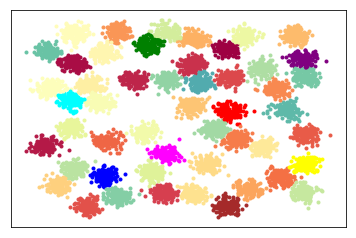

In [309]:
#clusters_labels, final_inside, final_outside, final_partial = getClustersIn_Out_Part(sampled_df, c_k_o_i_median, alpha, beta)
if select_df_test_flag:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df[sampled_df['Out'] == 1], c_k_o_i_median, alpha, beta)
else:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_median, alpha, beta)

print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

final_list = final_inside + final_partial + final_outside
plot_custom_clusters(final_list, clusters_labels, 5, colors, "Median Evaluation: ", folder_name + '/' + identity_name + '-median-result')


Total Inside:  7254


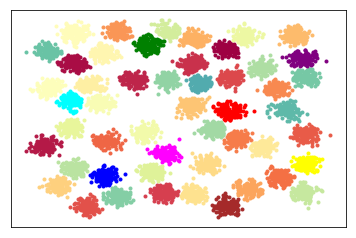

In [310]:
c_k_o_i_inside = np.zeros((c_k_o_i.shape[0],c_k_o_i.shape[1]))
for i in range(c_k_o_i.shape[0]):
    for j in range(c_k_o_i.shape[1]):
        if c_k_o_i_median[i][j] == 1:
            c_k_o_i_inside[i][j] = 1

alpha = 1
clusters_labels, final_inside, cluster_inside, my_dict = getClustersInside(sampled_df, c_k_o_i_inside, alpha)
print("Total Inside: ",  len(c_k_o_i_inside[c_k_o_i_inside == 1]))

#final_inside.append((4,6))
#clusters_labels[(4,6)] = 1

plot_custom_clusters(final_inside, clusters_labels, 5, colors, "Median (Inside) Plot: ", folder_name + '/' + identity_name + '-median-3wc-inside')
#write_to_file('Files/sampled_df2.csv', np.array(final_inside))

Total Inside:  6740
Total Outside:  0
Total Partial:  760


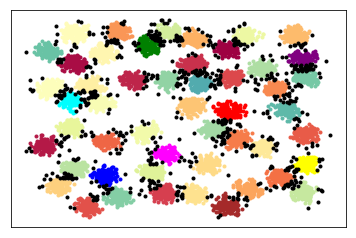

In [311]:
#clusters_labels, final_inside, final_outside, final_partial = getClustersIn_Out_Part(sampled_df, c_k_o_i_mean, alpha, beta)
if select_df_test_flag:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df[sampled_df['Out'] == 1], c_k_o_i_mean, alpha, beta)
else:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_mean, alpha, beta)

print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

final_list = final_inside + final_partial + final_outside
plot_custom_clusters(final_list, clusters_labels, 5, colors, "Mean Evaluation: ", folder_name + '/' + identity_name + '-mean-result')


Total Inside:  6740


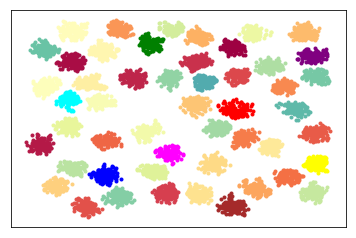

In [312]:
c_k_o_i_inside = np.zeros((c_k_o_i.shape[0],c_k_o_i.shape[1]))
for i in range(c_k_o_i.shape[0]):
    for j in range(c_k_o_i.shape[1]):
        if c_k_o_i_mean[i][j] == 1:
            c_k_o_i_inside[i][j] = 1

alpha = 1
clusters_labels, final_inside, cluster_inside, my_dict = getClustersInside(sampled_df, c_k_o_i_inside, alpha)
print("Total Inside: ",  len(c_k_o_i_inside[c_k_o_i_inside == 1]))

#final_inside.append((4,6))
#clusters_labels[(4,6)] = 1

plot_custom_clusters(final_inside, clusters_labels, 5, colors, "Mean (Inside) Plot: ", folder_name + '/' + identity_name + '-mean-3wc-inside')
#write_to_file('Files/sampled_df2.csv', np.array(final_inside))

Total Inside:  7500
Total Outside:  0
Total Partial:  0


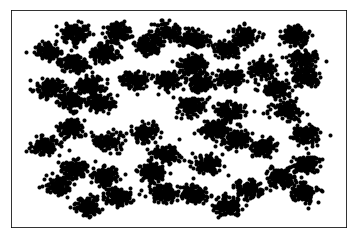

In [313]:
###### Here According to 3WC
#Inside = Partial (X < alpha && X > beta)
#Partial = Inside + Outside (X>= alpha) && (X<=beta)

#clusters_labels, final_inside, final_outside, final_partial = getClustersIn_Out_Part(sampled_df, c_k_o_i_laplacian, 0.51, 0.49)
if select_df_test_flag:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df[sampled_df['Out'] == 1], c_k_o_i_laplacian, alpha, beta)
else:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_laplacian, alpha, beta)

print("Total Inside: ", len(final_partial))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_inside) + len(final_outside))

final_list = final_inside + final_partial + final_outside
plot_custom_clusters(final_list, clusters_labels, 5, colors, "Laplacian Evaluation: ", folder_name + '/' + identity_name + '-laplacian-result', 0.51, 0.49)


In [314]:
c_k_o_i_inside = np.zeros((c_k_o_i.shape[0],c_k_o_i.shape[1]))
for i in range(c_k_o_i.shape[0]):
    for j in range(c_k_o_i.shape[1]):
        if c_k_o_i_laplacian[i][j] == 1:
            c_k_o_i_inside[i][j] = 1

alpha = 1
clusters_labels, final_inside, cluster_inside, my_dict = getClustersInside(sampled_df, c_k_o_i_inside, alpha)
print("Total Inside: ",  len(c_k_o_i_inside[c_k_o_i_inside == 1]))

#final_inside.append((4,6))
#clusters_labels[(4,6)] = 1

plot_custom_clusters(final_inside, clusters_labels, 5, colors, "Laplacian (Inside) Plot: ", folder_name + '/' + identity_name + '-laplacian-3wc-inside')
#write_to_file('Files/sampled_df2.csv', np.array(final_inside))

Total Inside:  0


Total Inside:  6740
Total Outside:  0
Total Partial:  760


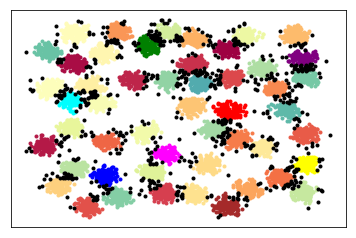

In [315]:
#Blurring = Mean
#clusters_labels, final_inside, final_outside, final_partial = getClustersIn_Out_Part(sampled_df, c_k_o_i_mean, alpha, beta)
if select_df_test_flag:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df[sampled_df['Out'] == 1], c_k_o_i_mean, alpha, beta)
else:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_mean, alpha, beta)

print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

final_list = final_inside + final_partial + final_outside
plot_custom_clusters(final_list, clusters_labels, 5, colors, "Blurred Evaluation: ", folder_name + '/' + identity_name + '-blurred-result')


In [316]:
if select_df_test_flag:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_mean_test, alpha, beta)


In [317]:
if select_df_test_flag:        
    print("Blurring and Sharpening based three-way Clustering (BS3WC): ")
    n_count = 0
    outliers_count = 0

    test_range = sampled_df.shape[0] - select_df_test.shape[0]
    test_range_out = sampled_df.shape[0] - select_df_test_out.shape[0]
    n_count = select_df_test_out.shape[0]

    TP = 0 
    FP = 0
    FN = 0
    TN = 0

    for i in range(test_range, sampled_df.shape[0]):
        if i in outliers_indices and i >= test_range_out:
            TP += 1
        elif i not in outliers_indices and i >= test_range_out:
            FN += 1
        elif i in outliers_indices and i < test_range_out:
            FP += 1
        elif i not in outliers_indices and i < test_range_out:
            TN += 1

    print("TP    |    FP    |    FN    |    TN")
    print(TP, ",      ", FP, ",     ", FN, ",      ", TN)

In [318]:
write_outliers_detected(final_inside,final_partial,final_outside, file_measures, 'Blurring')

Total Inside:  6740


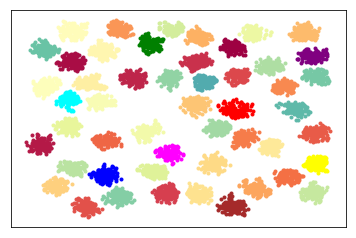

In [319]:
c_k_o_i_inside = np.zeros((c_k_o_i.shape[0],c_k_o_i.shape[1]))
for i in range(c_k_o_i.shape[0]):
    for j in range(c_k_o_i.shape[1]):
        if c_k_o_i_mean[i][j] == 1:
            c_k_o_i_inside[i][j] = 1

alpha = 1
clusters_labels, final_inside, cluster_inside, my_dict = getClustersInside(sampled_df, c_k_o_i_inside, alpha)
print("Total Inside: ",  len(c_k_o_i_inside[c_k_o_i_inside == 1]))

#final_inside.append((4,6))
#clusters_labels[(4,6)] = 1

plot_custom_clusters(final_inside, clusters_labels, 5, colors, "Blurr (Inside) Plot: ", folder_name + '/' + identity_name + '-blurred-3wc-inside')
#write_to_file('Files/sampled_df2.csv', np.array(final_inside))

Total Inside:  0
Total Outside:  7478
Total Partial:  22


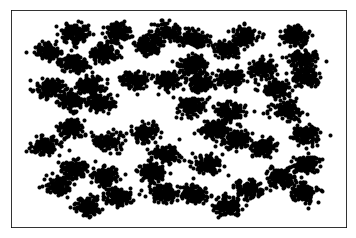

In [320]:
#Difference = Original - Blurred Image
c_k_o_i_diff = np.zeros((c_k_o_i.shape[0],c_k_o_i.shape[1]))
for i in range(c_k_o_i.shape[0]):
    for j in range(c_k_o_i.shape[1]):
        c_k_o_i_diff[i][j] = c_k_o_i[i][j] - c_k_o_i_mean[i][j]

#clusters_labels, final_inside, final_outside, final_partial = getClustersIn_Out_Part(sampled_df, c_k_o_i_diff, alpha, beta)
if select_df_test_flag:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df[sampled_df['Out'] == 1], c_k_o_i_diff, alpha, beta)
else:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_diff, alpha, beta)

print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

final_list = final_inside + final_partial + final_outside
plot_custom_clusters(final_list, clusters_labels, 5, colors, "Difference Evaluation: ", folder_name + '/' + identity_name + '-difference-result')


Total Inside:  7153
Total Outside:  3
Total Partial:  344


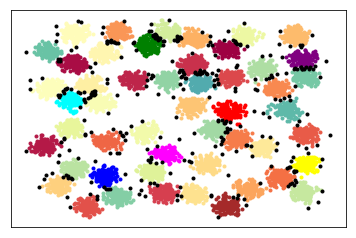

In [321]:
#Sharp Image = Original + Difference
c_k_o_i_sharp = np.zeros((c_k_o_i.shape[0],c_k_o_i.shape[1]))
for i in range(c_k_o_i.shape[0]):
    for j in range(c_k_o_i.shape[1]):
        c_k_o_i_sharp[i][j] = c_k_o_i[i][j] + c_k_o_i_diff[i][j]

#clusters_labels, final_inside, final_outside, final_partial = getClustersIn_Out_Part(sampled_df, c_k_o_i_sharp, alpha, beta)
if select_df_test_flag:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df[sampled_df['Out'] == 1], c_k_o_i_sharp, alpha, beta)
else:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_sharp, alpha, beta)

print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

final_list = final_inside + final_partial + final_outside
plot_custom_clusters(final_list, clusters_labels, 5, colors, "Sharpe Evaluation: ", folder_name + '/' + identity_name + '-sharpe-result')


Total Inside:  7153


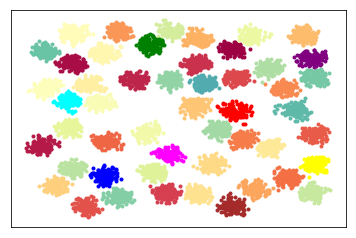

In [322]:
c_k_o_i_inside = np.zeros((c_k_o_i.shape[0],c_k_o_i.shape[1]))
for i in range(c_k_o_i.shape[0]):
    for j in range(c_k_o_i.shape[1]):
        if c_k_o_i_sharp[i][j] >= 1:
            c_k_o_i_inside[i][j] = 1

alpha = 1
clusters_labels, final_inside, cluster_inside, my_dict = getClustersInside(sampled_df, c_k_o_i_inside, alpha)
print("Total Inside: ",  len(c_k_o_i_inside[c_k_o_i_inside == 1]))

#final_inside.append((4,6))
#clusters_labels[(4,6)] = 1

plot_custom_clusters(final_inside, clusters_labels, 5, colors, "Sharpe (Inside) Plot: ", folder_name + '/' + identity_name + '-sharpe-3wc-inside')
#write_to_file('Files/sampled_df2.csv', np.array(final_inside))

In [323]:
if select_df_test_flag:        
    c_k_o_i_diff_test = np.zeros((sampled_df.shape[0],sampled_df.shape[1]))
    for i in range(c_k_o_i_test.shape[0]):
        for j in range(c_k_o_i_test.shape[1]):
            if c_k_o_i_test < c_k_o_i.shape[0]:
                c_k_o_i_diff_test[i][j] = c_k_o_i[i][j] - c_k_o_i_mean[i][j]
            else:
                c_k_o_i_diff_test[i][j] = c_k_o_i_test[i][j] - c_k_o_i_mean_test[i][j]

    c_k_o_i_sharp_test = np.zeros((sampled_df.shape[0],sampled_df.shape[1]))
    for i in range(c_k_o_i_test.shape[0]):
        for j in range(c_k_o_i_test.shape[1]):
            if c_k_o_i_test < c_k_o_i.shape[0]:
                c_k_o_i_sharp_test[i][j] = c_k_o_i[i][j] + c_k_o_i_diff[i][j]
            else:
                 c_k_o_i_sharp_test[i][j] = c_k_o_i_test[i][j] + c_k_o_i_diff_test[i][j]   

    if select_df_test_flag:
        clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_sharp_test, alpha, beta)



In [324]:
if select_df_test_flag:        
    print("Blurring and Sharpening based three-way Clustering (BS3WC): ")
    n_count = 0
    outliers_count = 0

    test_range = sampled_df.shape[0] - select_df_test.shape[0]
    test_range_out = sampled_df.shape[0] - select_df_test_out.shape[0]
    n_count = select_df_test_out.shape[0]

    TP = 0 
    FP = 0
    FN = 0
    TN = 0

    for i in range(test_range, sampled_df.shape[0]):
        if i in outliers_indices and i >= test_range_out:
            TP += 1
        elif i not in outliers_indices and i >= test_range_out:
            FN += 1
        elif i in outliers_indices and i < test_range_out:
            FP += 1
        elif i not in outliers_indices and i < test_range_out:
            TN += 1

    print("TP    |    FP    |    FN    |    TN")
    print(TP, ",      ", FP, ",     ", FN, ",      ", TN)

In [325]:
write_outliers_detected(final_inside,final_partial,final_outside, file_measures, 'Blurring')